# Conclusion

Dataset contains stats accumulated for team vs. a unique team.

Decision tree classification with kfolds=5, and pruned parameter values found with `RandomizedSearchCV`.

Performed significantly worse than the non-sample-balanced models.

## HOME_TEAM_WINS

Target to beat - 59.1% home winrate

Achieved - **58% accuracy**

|Pruning|Max Accuracy|Mean Accuracy|Min Accuracy|
|-|-|-|-|
|None|53%|52%|52%|
|max_depth|53%|52%|50%|
|~~min_impurity_decrease~~|58%|54%|52%|
|max_leaf_nodes|58%|50%|42%|
|max_features|53%|52%|51%|

## HOME_HIGHER_FG_PCT

Target to beat - 55.0% rate of home having higher FGP

Achieved - **53% accuracy**

|Pruning|Max Accuracy|Mean Accuracy|Min Accuracy|
|-|-|-|-|
|None|51%|51%|50%|
|max_depth|53%|51%|50%|
|~~min_impurity_decrease~~|50%|46%|44%|
|max_leaf_nodes|53%|51%|46%|
|max_features|51%|50%|50%|

## HOME_HIGHER_FG3_PCT

Target to beat - 50.8% rate of home having higher FG3

Achieved - **51% accuracy**

|Pruning|Max Accuracy|Mean Accuracy|Min Accuracy|
|-|-|-|-|
|None|50%|50%|48%|
|max_depth|51%|50%|48%|
|~~min_impurity_decrease~~|50%|49%|48%|
|max_leaf_nodes|51%|50%|50%|
|max_features|50%|49%|48%|

## HOME_HIGHER_FT_PCT

Target to beat - 49.5% rate of home having higher FTP

Achieved - **52% accuracy**

|Pruning|Max Accuracy|Mean Accuracy|Min Accuracy|
|-|-|-|-|
|None|52%|50%|49%|
|max_depth|51%|50%|49%|
|~~min_impurity_decrease~~|51%|49%|49%|
|max_leaf_nodes|51%|51%|50%|
|max_features|50%|50%|49%|

## HOME_HIGHER_AST

Target to beat - 55.0% rate of home having higher AST

Achieved - **53% accuracy**

|Pruning|Max Accuracy|Mean Accuracy|Min Accuracy|
|-|-|-|-|
|None|51%|50%|49%|
|max_depth|51%|49%|47%|
|~~min_impurity_decrease~~|55%|52%|45%|
|max_leaf_nodes|53%|51%|49%|
|max_features|51%|50%|50%|

## HOME_HIGHER_REB

Target to beat - 53.4% rate of home having higher REB

Achieved - **52% accuracy**

|Pruning|Max Accuracy|Mean Accuracy|Min Accuracy|
|-|-|-|-|
|None|50%|50%|49%|
|max_depth|50%|49%|49%|
|~~min_impurity_decrease~~|55%|50%|46%|
|max_leaf_nodes|52%|48%|46%|
|max_features|52%|51%|50%|


In [1]:
## Make width of notebook 100%
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false; // disable scrollable frames
}

<IPython.core.display.Javascript object>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../../')
from datasets import data as Local ## Local module to get dataframes

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split

In [4]:
games_df, winners_df, greater_fgp_df, greater_fg3_df, greater_ft_df, greater_ast_df, greater_reb_df, cumulative_stats_df, games_details_df, teams_df, players_df, ranking_df = \
    Local.get_all_dataset_dataframes('../../datasets/')

In [5]:
team_v_team_stats_df = Local.get_team_v_team_stats_dataframe('../../datasets/')

# Target datasets

- Home has:
    - 59.1% Winrate
    - 55.0% Rate of Higher FGP
    - 50.8% Rate of Higher FG3
    - 49.5% Rate of Higher FTP
    - 55.0% Rate of Higher AST
    - 53.4% Rate of Higher REB

In [6]:
winners_df # Whether the home team won in a game in each row of `games_df`

16157    1
16156    1
16155    1
16154    1
16153    1
        ..
4        0
3        0
2        0
1        1
0        1
Name: HOME_TEAM_WINS, Length: 23520, dtype: int64

In [7]:
winners_df.describe()

count    23520.000000
mean         0.591029
std          0.491654
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_TEAM_WINS, dtype: float64

In [8]:
greater_fgp_df.describe()

count    23520.000000
mean         0.550468
std          0.497457
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_FG_PCT, dtype: float64

In [9]:
greater_fg3_df.describe()

count    23520.000000
mean         0.507993
std          0.499947
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_FG3_PCT, dtype: float64

In [10]:
greater_ft_df.describe()

count    23520.000000
mean         0.494855
std          0.499984
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_FT_PCT, dtype: float64

In [11]:
greater_ast_df.describe()

count    23520.000000
mean         0.550128
std          0.497491
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_AST, dtype: float64

In [12]:
greater_reb_df.describe()

count    23520.000000
mean         0.533886
std          0.498861
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_REB, dtype: float64

# Datasets

In [13]:
games_df

GAME_DATE_EST   GAME_ID  HOME_TEAM_ID  VISITOR_TEAM_ID  SEASON  \
16157    2003-10-05  10300001    1610612762       1610612742    2003   
16156    2003-10-06  10300002    1610612763       1610612749    2003   
16155    2003-10-07  10300009    1610612758       1610612746    2003   
16154    2003-10-07  10300005    1610612757       1610612745    2003   
16153    2003-10-07  10300007    1610612748       1610612755    2003   
...             ...       ...           ...              ...     ...   
4        2020-12-18  12000040    1610612761       1610612748    2020   
3        2020-12-18  12000039    1610612754       1610612755    2020   
2        2020-12-19  12000049    1610612763       1610612737    2020   
1        2020-12-19  12000048    1610612764       1610612765    2020   
0        2020-12-19  12000047    1610612753       1610612766    2020   

       PTS_home  FG_PCT_home  FT_PCT_home  FG3_PCT_home  AST_home  REB_home  \
16157      90.0        0.457        0.735         0.143      23.0      41.0   
16156     105.0        0.494        0.618         0.267      25.0      48.0   
16155     101.0        0.467        0.871         0.444      19.0      39.0   
16154     104.0        0.527        0.657         0.429      22.0      33.0   
16153      86.0        0.352        0.647         0.222      15.0      55.0   
...         ...          ...          ...           ...       ...       ...   
4         105.0        0.380        0.737         0.356      27.0      37.0   
3         107.0        0.371        0.692         0.262      19.0      45.0   
2         116.0        0.400        0.744         0.396      21.0      43.0   
1          99.0        0.427        0.625         0.295      24.0      45.0   
0         120.0        0.433        0.792         0.425      23.0      50.0   

       PTS_away  FG_PCT_away  FT_PCT_away  FG3_PCT_away  AST_away  REB_away  
16157      85.0        0.447        0.500         0.250      20.0      38.0  
16156      94.0        0.427        0.700         0.154      20.0      43.0  
16155      82.0        0.368        0.609         0.364      13.0      50.0  
16154      80.0        0.470        0.667         0.333      10.0      37.0  
16153      79.0        0.329        0.897         0.143       7.0      44.0  
...         ...          ...          ...           ...       ...       ...  
4         117.0        0.534        0.741         0.514      30.0      51.0  
3         113.0        0.533        0.629         0.355      23.0      48.0  
2         117.0        0.422        0.837         0.297      24.0      47.0  
1          96.0        0.402        0.647         0.326      18.0      51.0  
0         117.0        0.444        0.864         0.439      21.0      52.0  

[23520 rows x 17 columns]

In [14]:
cumulative_stats_df

DATE   GAME_ID  SEASON_TYPE  SEASON  GAMES_PLAYED_home  \
0      2003-10-05  10300001            1    2003                  0   
1      2003-10-06  10300002            1    2003                  0   
2      2003-10-07  10300009            1    2003                  0   
3      2003-10-07  10300005            1    2003                  0   
4      2003-10-07  10300007            1    2003                  0   
...           ...       ...          ...     ...                ...   
23515  2020-12-18  12000040            1    2020                  2   
23516  2020-12-18  12000039            1    2020                  2   
23517  2020-12-19  12000049            1    2020                  3   
23518  2020-12-19  12000048            1    2020                  2   
23519  2020-12-19  12000047            1    2020                  3   

       GAMES_PLAYED_away  PPG_total_home  FG_PCT_total_home  \
0                      0        0.000000           0.000000   
1                      0        0.000000           0.000000   
2                      0        0.000000           0.000000   
3                      0        0.000000           0.000000   
4                      0        0.000000           0.000000   
...                  ...             ...                ...   
23515                  1      111.500000           0.443500   
23516                  1      105.000000           0.438000   
23517                  3      119.333333           0.466667   
23518                  3      100.000000           0.415000   
23519                  3      112.666667           0.444333   

       FG3_PCT_total_home  FT_PCT_total_home  ...  PPG_total_away  \
0                0.000000           0.000000  ...        0.000000   
1                0.000000           0.000000  ...        0.000000   
2                0.000000           0.000000  ...        0.000000   
3                0.000000           0.000000  ...        0.000000   
4                0.000000           0.000000  ...        0.000000   
...                   ...                ...  ...             ...   
23515            0.353000           0.691000  ...       92.000000   
23516            0.383000           0.619000  ...      108.000000   
23517            0.329333           0.704667  ...      111.333333   
23518            0.321500           0.704500  ...       93.333333   
23519            0.305333           0.758000  ...      110.666667   

       FG_PCT_total_away  FG3_PCT_total_away  FT_PCT_total_away  \
0               0.000000            0.000000           0.000000   
1               0.000000            0.000000           0.000000   
2               0.000000            0.000000           0.000000   
3               0.000000            0.000000           0.000000   
4               0.000000            0.000000           0.000000   
...                  ...                 ...                ...   
23515           0.427000            0.283000           0.818000   
23516           0.471000            0.241000           0.750000   
23517           0.392667            0.332333           0.789667   
23518           0.413333            0.333000           0.713000   
23519           0.442333            0.372333           0.751000   

       APG_total_away  RPG_total_away  TEAM_ID_away  TEAM_ID_home  W_PCT_away  \
0            0.000000        0.000000  1.610613e+09  1.610613e+09    0.000000   
1            0.000000        0.000000  1.610613e+09  1.610613e+09    0.000000   
2            0.000000        0.000000  1.610613e+09  1.610613e+09    0.000000   
3            0.000000        0.000000  1.610613e+09  1.610613e+09    0.000000   
4            0.000000        0.000000  1.610613e+09  1.610613e+09    0.000000   
...               ...             ...           ...           ...         ...   
23515       26.000000       35.000000  1.610613e+09  1.610613e+09    0.000000   
23516       23.000000       42.000000  1.610613e+09  1.610613e+09    1.000000   
23517       24.000000       56.000000  1

In [15]:
team_v_team_stats_df

DATE   GAME_ID  SEASON_TYPE  SEASON  GAMES_PLAYED_home  \
0      2003-10-05  10300001            1    2003                  0   
1      2003-10-06  10300002            1    2003                  0   
2      2003-10-07  10300009            1    2003                  0   
3      2003-10-07  10300005            1    2003                  0   
4      2003-10-07  10300007            1    2003                  0   
...           ...       ...          ...     ...                ...   
23511  2020-12-18  12000044            1    2020                  1   
23516  2020-12-18  12000039            1    2020                  0   
23518  2020-12-19  12000048            1    2020                  1   
23517  2020-12-19  12000049            1    2020                  1   
23519  2020-12-19  12000047            1    2020                  1   

       GAMES_PLAYED_away  FG3_PCT_total_home  PPG_total_home  \
0                      0               0.000             0.0   
1                      0               0.000             0.0   
2                      0               0.000             0.0   
3                      0               0.000             0.0   
4                      0               0.000             0.0   
...                  ...                 ...             ...   
23511                  1               0.324           103.0   
23516                  0               0.000             0.0   
23518                  1               0.265            86.0   
23517                  1               0.380           128.0   
23519                  1               0.324           115.0   

       FG_PCT_total_home  RPG_total_home  ...  FG3_PCT_total_away  \
0                  0.000             0.0  ...               0.000   
1                  0.000             0.0  ...               0.000   
2                  0.000             0.0  ...               0.000   
3                  0.000             0.0  ...               0.000   
4                  0.000             0.0  ...               0.000   
...                  ...             ...  ...                 ...   
23511              0.381            46.0  ...               0.333   
23516              0.000             0.0  ...               0.000   
23518              0.397            42.0  ...               0.400   
23517              0.474            58.0  ...               0.289   
23519              0.474            53.0  ...               0.439   

       PPG_total_away  FG_PCT_total_away  RPG_total_away  FT_PCT_total_away  \
0                 0.0              0.000             0.0              0.000   
1                 0.0              0.000             0.0              0.000   
2                 0.0              0.000             0.0              0.000   
3                 0.0              0.000             0.0              0.000   
4                 0.0              0.000             0.0              0.000   
...               ...                ...             ...                ...   
23511           124.0              0.542            61.0              0.643   
23516             0.0              0.000             0.0              0.000   
23518            97.0              0.494            42.0              0.583   
23517           106.0              0.381            46.0              0.864   
23519           123.0              0.475            43.0              0.900   

       APG_total_away  TEAM_ID_away  TEAM_ID_home  W_PCT_away  W_PCT_home  
0                 0.0  1.610613e+09  1.610613e+09         0.0         0.0  
1                 0.0  1.610613e+09  1.610613e+09         0.0         0.0  
2                 0.0  1.610613e+09  1.610613e+09         0.0         0.0  
3                 0.0  1.610613e+09  1.610613e+09         0.0         0.0  
4                 0.0  1.610613e+09  1.610613e+09         0.0         0.0  
...               ...           ...           ...         ...         ...  
23511            26.0  1.610613e+09  1.610613e+09         1.0         0.0  
23516

## Attach target columns to dataset

In [16]:
team_v_team_stats_copy_df = team_v_team_stats_df.copy()
team_v_team_stats_copy_df['home_win'] = winners_df
team_v_team_stats_copy_df['greater_fgp'] = greater_fgp_df
team_v_team_stats_copy_df['greater_fg3'] = greater_fg3_df
team_v_team_stats_copy_df['greater_ft'] = greater_ft_df
team_v_team_stats_copy_df['greater_ast'] = greater_ast_df
team_v_team_stats_copy_df['greater_reb'] = greater_reb_df

## Remove rows w/o data

In [17]:
team_v_team_stats_copy_df = team_v_team_stats_copy_df[(team_v_team_stats_copy_df['GAMES_PLAYED_home']>0) & (team_v_team_stats_copy_df['GAMES_PLAYED_away']>0)]

# Get new target datasets after row removal
winners_df = team_v_team_stats_copy_df['home_win']
greater_fgp_df = team_v_team_stats_copy_df['greater_fgp']
greater_fg3_df = team_v_team_stats_copy_df['greater_fg3']
greater_ft_df = team_v_team_stats_copy_df['greater_ft']
greater_ast_df = team_v_team_stats_copy_df['greater_ast']
greater_reb_df = team_v_team_stats_copy_df['greater_reb']

## Remove non-data

In [18]:
# Delete non-data
for key in [
    'DATE','GAME_ID','TEAM_ID_home','TEAM_ID_away','SEASON_TYPE','SEASON','GAMES_PLAYED_home','GAMES_PLAYED_away',
    'home_win','greater_fgp','greater_fg3','greater_ft','greater_ast','greater_reb'
]:
    del team_v_team_stats_copy_df[key]

team_v_team_stats_copy_df

FG3_PCT_total_home  PPG_total_home  FG_PCT_total_home  RPG_total_home  \
26                  0.211            78.0              0.329            38.0   
49                  0.000            98.0              0.500            37.0   
44                  0.667            58.0              0.457            31.0   
53                  0.286           104.0              0.493            40.0   
87                  0.250            85.0              0.447            38.0   
...                   ...             ...                ...             ...   
23509               0.310           107.0              0.407            45.0   
23511               0.324           103.0              0.381            46.0   
23518               0.265            86.0              0.397            42.0   
23517               0.380           128.0              0.474            58.0   
23519               0.324           115.0              0.474            53.0   

       FT_PCT_total_home  APG_total_home  FG3_PCT_total_away  PPG_total_away  \
26                 0.737             8.0               0.370            98.0   
49                 0.800            17.0               0.700           105.0   
44                 0.700            10.0               0.300            62.0   
53                 0.700            22.0               0.214            89.0   
87                 0.500            20.0               0.143            90.0   
...                  ...             ...                 ...             ...   
23509              0.800            26.0               0.400           112.0   
23511              0.680            22.0               0.333           124.0   
23518              0.682            18.0               0.400            97.0   
23517              0.773            33.0               0.289           106.0   
23519              0.917            26.0               0.439           123.0   

       FG_PCT_total_away  RPG_total_away  FT_PCT_total_away  APG_total_away  \
26                 0.413            42.0              0.703            22.0   
49                 0.527            39.0              0.714            27.0   
44                 0.385            30.0              0.576            11.0   
53                 0.462            36.0              0.538            21.0   
87                 0.457            41.0              0.735            23.0   
...                  ...             ...                ...             ...   
23509              0.476            47.0              0.750            20.0   
23511              0.542            61.0              0.643            26.0   
23518              0.494            42.0              0.583            20.0   
23517              0.381            46.0              0.864            25.0   
23519              0.475            43.0              0.900            32.0   

       W_PCT_away  W_PCT_home  
26            1.0         0.0  
49            1.0         0.0  
44            1.0         0.0  
53            0.0         1.0  
87            1.0         0.0  
...           ...         ...  
23509         1.0         0.0  
23511         1.0         0.0  
23518         1.0         0.0  
23517         0.0         1.0  
23519         1.0         0.0  

[16034 rows x 14 columns]

## Do hyperparameters searches

In [19]:
from sklearn.metrics import classification_report

In [20]:
from sklearn.tree import plot_tree
from yellowbrick.model_selection import FeatureImportances

In [21]:
from sklearn.utils.class_weight import compute_sample_weight

In [22]:
# Get best params based from CV function
def do_cv(classifier, cv_fun, params, x, y, **kwargs):
    clf = cv_fun(
        classifier,
        params,
        scoring='accuracy', # Optimize for the 'accuracy' score of the model.
        **kwargs,
    )
    clf.fit(x, y, sample_weight=compute_sample_weight('balanced',y))
#     clf.fit(x, y)
    return clf

## Plot feature importances

In [23]:
def plot_feature_importances(clf, X, y):
    viz = FeatureImportances(clf, labels=X.columns)
    viz.fit(X, y)
    viz.show()

In [24]:
def print_all_metrics_and_plot(clf, X_train_dict, X_test_dict, y_train_dict, y_test_dict, grid_cv_params):
    scores = []
    for key in X_train_dict.keys():
        cv_clf = do_cv(
            clf,
#             GridSearchCV,
            RandomizedSearchCV,
            grid_cv_params,
            X_train_dict[key],
            y_train_dict[key],
        )
        print(key.upper()+':\n')
        score = cv_clf.best_estimator_.score(X_test_dict[key], y_test_dict[key])
        scores.append(score)
        print('Best decision tree accuracy (%s): %.2f' % (str(cv_clf.best_params_), score))
        print(classification_report(y_test_dict[key], cv_clf.best_estimator_.predict(X_test_dict[key])))
        plot_feature_importances(cv_clf.best_estimator_, X_train_dict[key], y_train_dict[key])
        print('---------------------------------------------')
    return scores

## Build K-folds datasets

In [25]:
from sklearn.model_selection import cross_validate

In [26]:
from sklearn.model_selection import KFold
kf = KFold(shuffle=True, random_state=123)

X_train_dicts = []
X_test_dicts = []
y_train_dicts = []
y_test_dicts = []

for target, key in [(winners_df, 'winner'), (greater_fgp_df, 'fgp'), (greater_fg3_df, 'fg3'), (greater_ft_df, 'ft'), (greater_ast_df, 'ast'), (greater_reb_df, 'reb')]:
    for train, test in kf.split(team_v_team_stats_copy_df, target):
        X_train_dict = {}
        X_test_dict = {}
        y_train_dict = {}
        y_test_dict = {}
        
        X_train_dict[key], X_test_dict[key] = team_v_team_stats_copy_df.iloc[train], team_v_team_stats_copy_df.iloc[test]
        y_train_dict[key], y_test_dict[key] = target.iloc[train], target.iloc[test]
        
        X_train_dicts.append(X_train_dict)
        X_test_dicts.append(X_test_dict)
        y_train_dicts.append(y_train_dict)
        y_test_dicts.append(y_test_dict)

assert len(X_train_dicts)==len(X_test_dicts)==len(y_train_dicts)==len(y_test_dicts)
print(len(X_train_dicts))

30


In [27]:
def print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, params):
    scores=[]
    for i in range(len(X_train_dicts)):
        print(f'i={i}')
        score = print_all_metrics_and_plot(
            DecisionTreeClassifier(random_state=0),
            X_train_dicts[i],
            X_test_dicts[i],
            y_train_dicts[i],
            y_test_dicts[i],
            params,
        )
        if (i+1)%5==0:
            scores = pd.DataFrame(np.array(scores))
            print(f'Mean accuracy: {scores.mean()[0]}')
            print(f'Max accuracy: {scores.max()[0]}')
            print(f'Min accuracy: {scores.min()[0]}')
            print('=========================================')
            scores=[]
        else:
            scores += score

## Train decision tree w/o pruning

i=0


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best decision tree accuracy ({'criterion': 'gini'}): 0.53
              precision    recall  f1-score   support

           0       0.41      0.41      0.41      1295
           1       0.60      0.61      0.60      1912

    accuracy                           0.53      3207
   macro avg       0.51      0.51      0.51      3207
weighted avg       0.53      0.53      0.53      3207



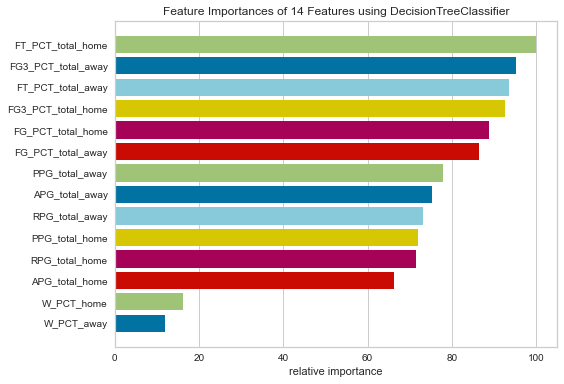

---------------------------------------------
i=1


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.52
              precision    recall  f1-score   support

           0       0.42      0.39      0.40      1336
           1       0.58      0.61      0.59      1871

    accuracy                           0.52      3207
   macro avg       0.50      0.50      0.50      3207
weighted avg       0.51      0.52      0.52      3207



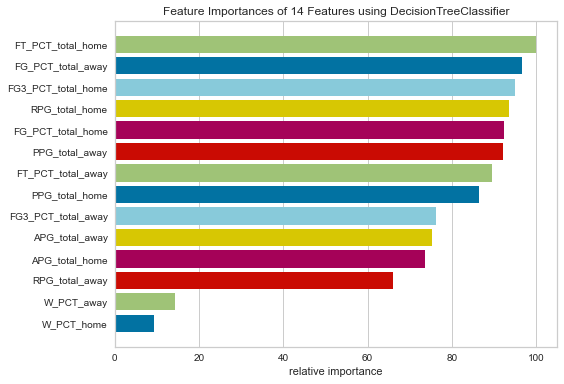

---------------------------------------------
i=2


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best decision tree accuracy ({'criterion': 'gini'}): 0.53
              precision    recall  f1-score   support

           0       0.41      0.44      0.43      1284
           1       0.61      0.59      0.60      1923

    accuracy                           0.53      3207
   macro avg       0.51      0.51      0.51      3207
weighted avg       0.53      0.53      0.53      3207



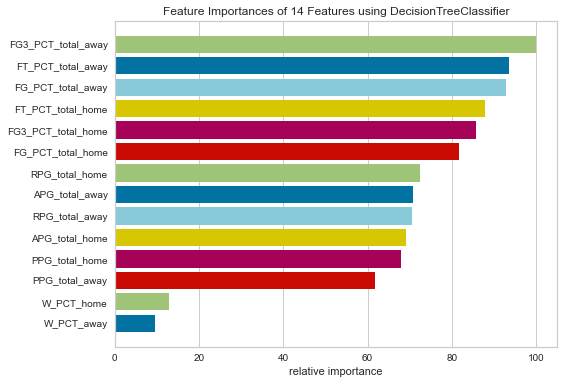

---------------------------------------------
i=3


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.52
              precision    recall  f1-score   support

           0       0.40      0.41      0.41      1293
           1       0.60      0.59      0.60      1914

    accuracy                           0.52      3207
   macro avg       0.50      0.50      0.50      3207
weighted avg       0.52      0.52      0.52      3207



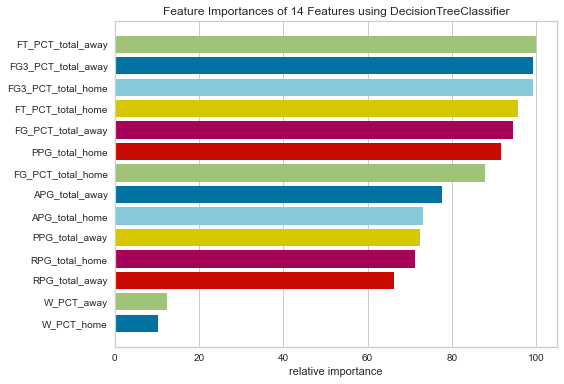

---------------------------------------------
i=4


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.51
              precision    recall  f1-score   support

           0       0.40      0.41      0.40      1302
           1       0.59      0.57      0.58      1904

    accuracy                           0.51      3206
   macro avg       0.49      0.49      0.49      3206
weighted avg       0.51      0.51      0.51      3206



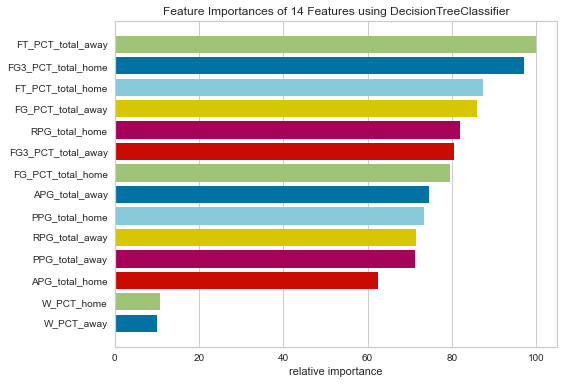

---------------------------------------------
Mean accuracy: 0.5226847521047708
Max accuracy: 0.5272840661053945
Min accuracy: 0.5176177112566261
i=5


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best decision tree accuracy ({'criterion': 'gini'}): 0.50
              precision    recall  f1-score   support

           0       0.44      0.46      0.45      1418
           1       0.56      0.54      0.55      1789

    accuracy                           0.50      3207
   macro avg       0.50      0.50      0.50      3207
weighted avg       0.51      0.50      0.50      3207



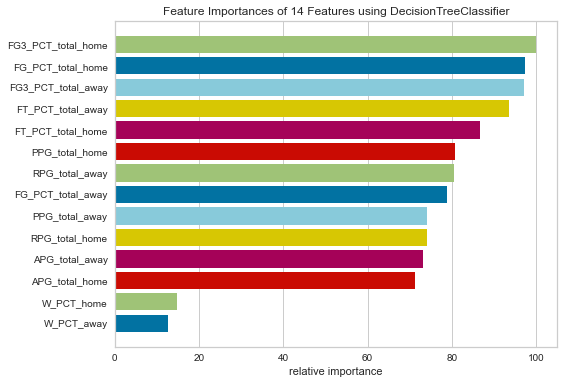

---------------------------------------------
i=6


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.51
              precision    recall  f1-score   support

           0       0.47      0.47      0.47      1461
           1       0.55      0.55      0.55      1746

    accuracy                           0.51      3207
   macro avg       0.51      0.51      0.51      3207
weighted avg       0.51      0.51      0.51      3207



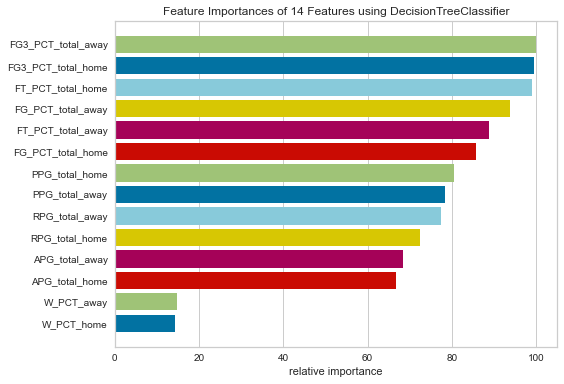

---------------------------------------------
i=7


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.51
              precision    recall  f1-score   support

           0       0.46      0.45      0.45      1461
           1       0.55      0.55      0.55      1746

    accuracy                           0.51      3207
   macro avg       0.50      0.50      0.50      3207
weighted avg       0.51      0.51      0.51      3207



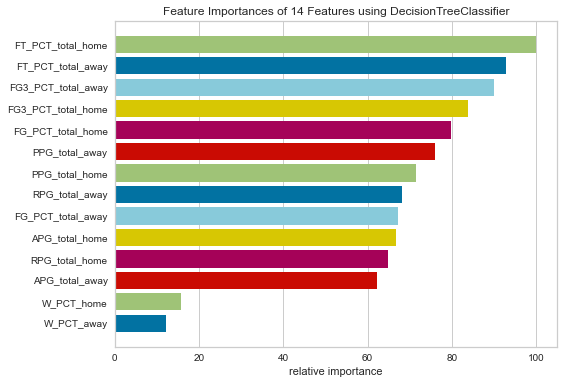

---------------------------------------------
i=8


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best decision tree accuracy ({'criterion': 'gini'}): 0.50
              precision    recall  f1-score   support

           0       0.44      0.46      0.45      1408
           1       0.56      0.54      0.55      1799

    accuracy                           0.50      3207
   macro avg       0.50      0.50      0.50      3207
weighted avg       0.51      0.50      0.51      3207



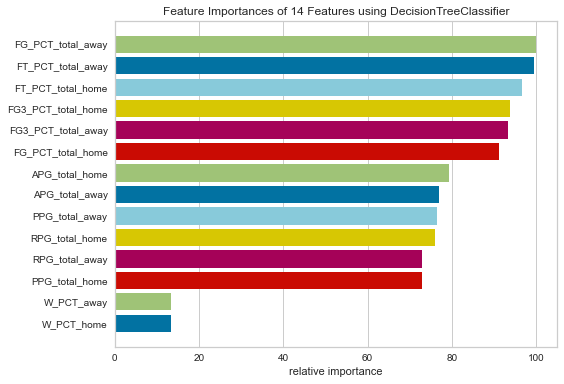

---------------------------------------------
i=9


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best decision tree accuracy ({'criterion': 'gini'}): 0.50
              precision    recall  f1-score   support

           0       0.43      0.44      0.44      1402
           1       0.56      0.54      0.55      1804

    accuracy                           0.50      3206
   macro avg       0.49      0.49      0.49      3206
weighted avg       0.50      0.50      0.50      3206



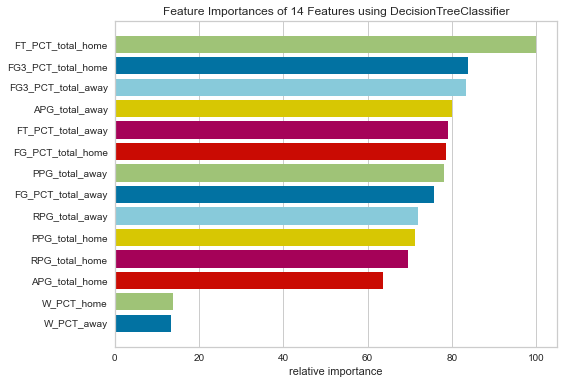

---------------------------------------------
Mean accuracy: 0.5070938571874025
Max accuracy: 0.5129404427814157
Min accuracy: 0.503897723729342
i=10


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.48
              precision    recall  f1-score   support

           0       0.47      0.48      0.48      1563
           1       0.50      0.48      0.49      1644

    accuracy                           0.48      3207
   macro avg       0.48      0.48      0.48      3207
weighted avg       0.48      0.48      0.48      3207



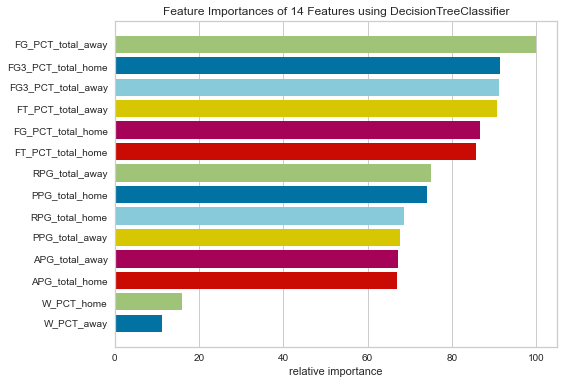

---------------------------------------------
i=11


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best decision tree accuracy ({'criterion': 'gini'}): 0.51
              precision    recall  f1-score   support

           0       0.51      0.48      0.49      1595
           1       0.51      0.54      0.52      1612

    accuracy                           0.51      3207
   macro avg       0.51      0.51      0.51      3207
weighted avg       0.51      0.51      0.51      3207



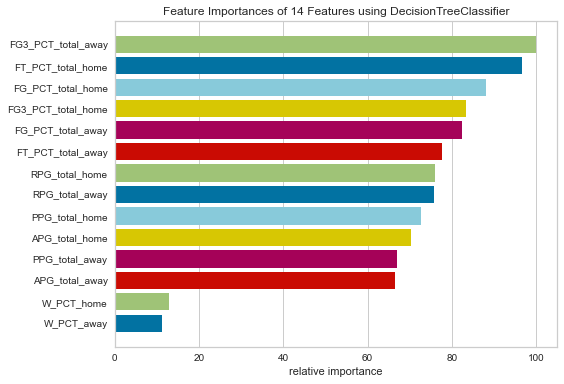

---------------------------------------------
i=12


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best decision tree accuracy ({'criterion': 'gini'}): 0.51
              precision    recall  f1-score   support

           0       0.51      0.50      0.51      1616
           1       0.51      0.52      0.51      1591

    accuracy                           0.51      3207
   macro avg       0.51      0.51      0.51      3207
weighted avg       0.51      0.51      0.51      3207



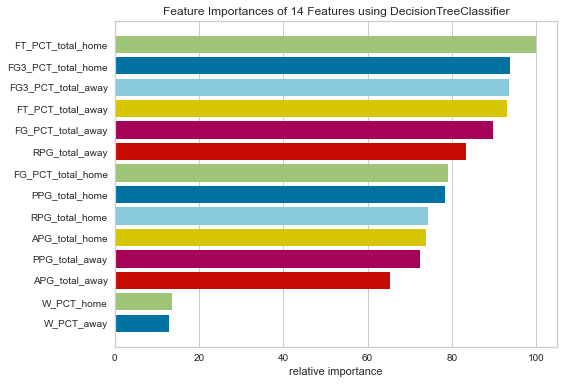

---------------------------------------------
i=13


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.49
              precision    recall  f1-score   support

           0       0.48      0.49      0.48      1558
           1       0.51      0.50      0.50      1649

    accuracy                           0.49      3207
   macro avg       0.49      0.49      0.49      3207
weighted avg       0.49      0.49      0.49      3207



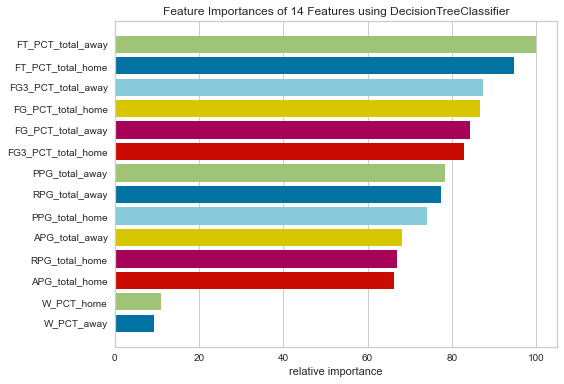

---------------------------------------------
i=14


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.48
              precision    recall  f1-score   support

           0       0.47      0.49      0.48      1554
           1       0.50      0.48      0.49      1652

    accuracy                           0.48      3206
   macro avg       0.48      0.48      0.48      3206
weighted avg       0.48      0.48      0.48      3206



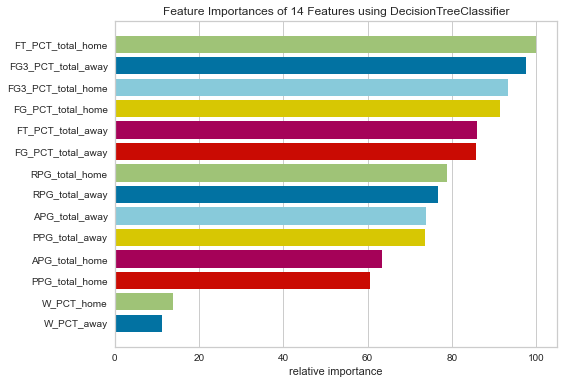

---------------------------------------------
Mean accuracy: 0.49867477393202364
Max accuracy: 0.5091986280012473
Min accuracy: 0.4839413782351107
i=15


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best decision tree accuracy ({'criterion': 'gini'}): 0.49
              precision    recall  f1-score   support

           0       0.51      0.50      0.51      1647
           1       0.48      0.48      0.48      1560

    accuracy                           0.49      3207
   macro avg       0.49      0.49      0.49      3207
weighted avg       0.49      0.49      0.49      3207



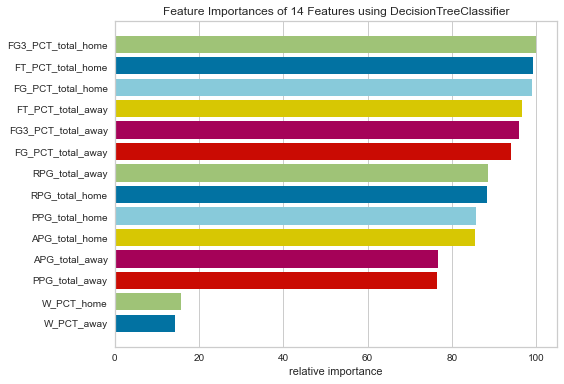

---------------------------------------------
i=16


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.50
              precision    recall  f1-score   support

           0       0.51      0.50      0.51      1618
           1       0.50      0.50      0.50      1589

    accuracy                           0.50      3207
   macro avg       0.50      0.50      0.50      3207
weighted avg       0.50      0.50      0.50      3207



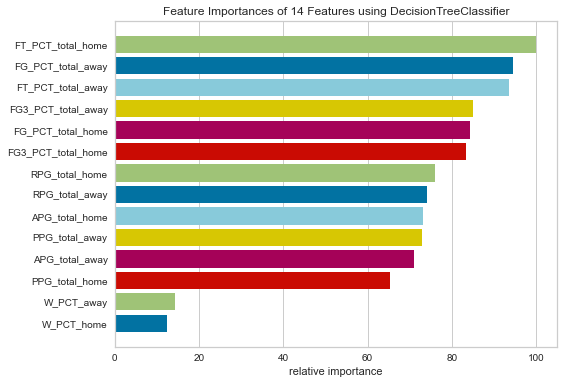

---------------------------------------------
i=17


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best decision tree accuracy ({'criterion': 'gini'}): 0.52
              precision    recall  f1-score   support

           0       0.52      0.52      0.52      1629
           1       0.51      0.52      0.51      1578

    accuracy                           0.52      3207
   macro avg       0.52      0.52      0.52      3207
weighted avg       0.52      0.52      0.52      3207



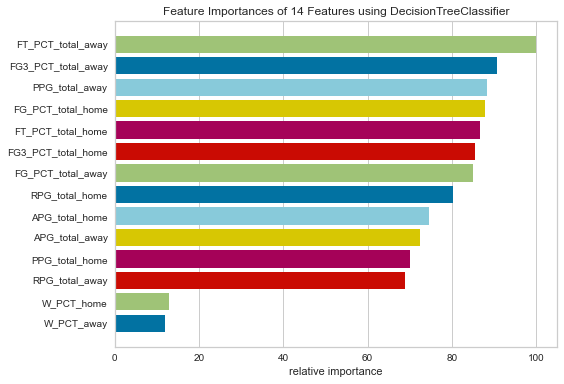

---------------------------------------------
i=18


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best decision tree accuracy ({'criterion': 'gini'}): 0.51
              precision    recall  f1-score   support

           0       0.51      0.50      0.50      1614
           1       0.50      0.51      0.51      1593

    accuracy                           0.51      3207
   macro avg       0.51      0.51      0.51      3207
weighted avg       0.51      0.51      0.51      3207



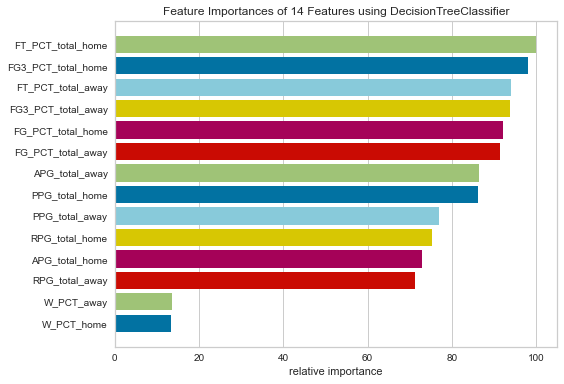

---------------------------------------------
i=19


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.50
              precision    recall  f1-score   support

           0       0.50      0.49      0.49      1588
           1       0.50      0.51      0.51      1618

    accuracy                           0.50      3206
   macro avg       0.50      0.50      0.50      3206
weighted avg       0.50      0.50      0.50      3206



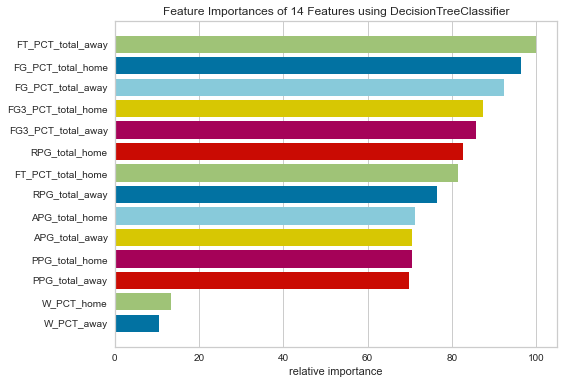

---------------------------------------------
Mean accuracy: 0.5040536326785157
Max accuracy: 0.5169940754599314
Min accuracy: 0.4920486435921422
i=20


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.50
              precision    recall  f1-score   support

           0       0.46      0.45      0.45      1491
           1       0.53      0.55      0.54      1716

    accuracy                           0.50      3207
   macro avg       0.50      0.50      0.50      3207
weighted avg       0.50      0.50      0.50      3207



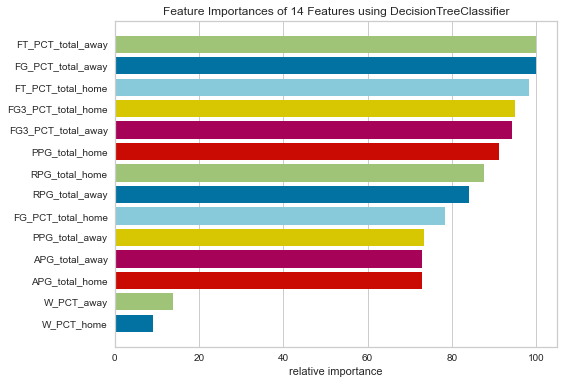

---------------------------------------------
i=21


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best decision tree accuracy ({'criterion': 'gini'}): 0.51
              precision    recall  f1-score   support

           0       0.45      0.46      0.46      1442
           1       0.55      0.55      0.55      1765

    accuracy                           0.51      3207
   macro avg       0.50      0.50      0.50      3207
weighted avg       0.51      0.51      0.51      3207



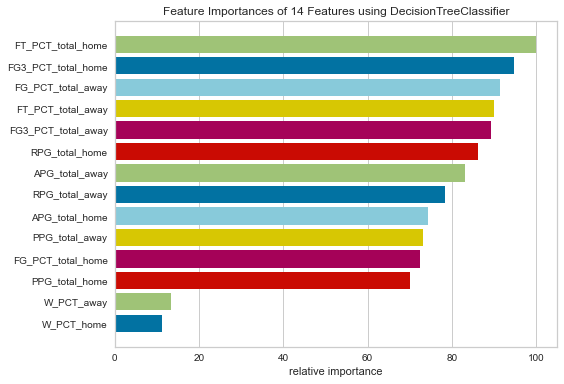

---------------------------------------------
i=22


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best decision tree accuracy ({'criterion': 'gini'}): 0.49
              precision    recall  f1-score   support

           0       0.44      0.44      0.44      1459
           1       0.53      0.53      0.53      1748

    accuracy                           0.49      3207
   macro avg       0.48      0.48      0.48      3207
weighted avg       0.49      0.49      0.49      3207



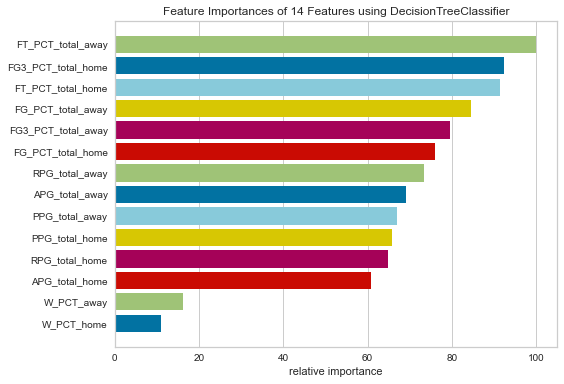

---------------------------------------------
i=23


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.50
              precision    recall  f1-score   support

           0       0.44      0.47      0.45      1429
           1       0.55      0.52      0.53      1778

    accuracy                           0.50      3207
   macro avg       0.49      0.49      0.49      3207
weighted avg       0.50      0.50      0.50      3207



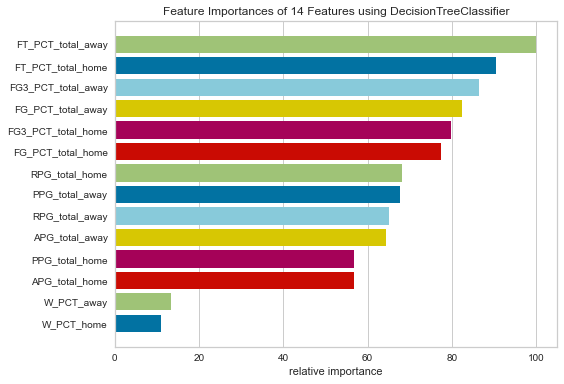

---------------------------------------------
i=24


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best decision tree accuracy ({'criterion': 'gini'}): 0.50
              precision    recall  f1-score   support

           0       0.44      0.46      0.45      1425
           1       0.55      0.53      0.54      1781

    accuracy                           0.50      3206
   macro avg       0.50      0.50      0.50      3206
weighted avg       0.50      0.50      0.50      3206



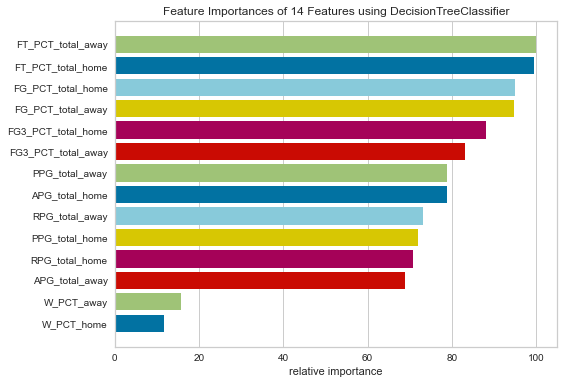

---------------------------------------------
Mean accuracy: 0.49844091050826317
Max accuracy: 0.5082631743062052
Min accuracy: 0.48799501091362646
i=25


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best decision tree accuracy ({'criterion': 'gini'}): 0.50
              precision    recall  f1-score   support

           0       0.46      0.48      0.47      1487
           1       0.53      0.51      0.52      1720

    accuracy                           0.50      3207
   macro avg       0.50      0.50      0.50      3207
weighted avg       0.50      0.50      0.50      3207



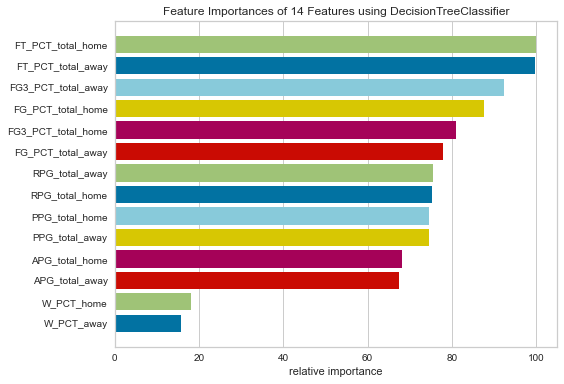

---------------------------------------------
i=26


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best decision tree accuracy ({'criterion': 'gini'}): 0.49
              precision    recall  f1-score   support

           0       0.47      0.46      0.46      1546
           1       0.51      0.52      0.51      1661

    accuracy                           0.49      3207
   macro avg       0.49      0.49      0.49      3207
weighted avg       0.49      0.49      0.49      3207



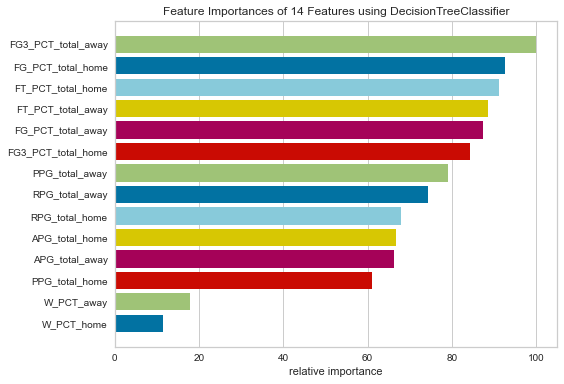

---------------------------------------------
i=27


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.49
              precision    recall  f1-score   support

           0       0.46      0.46      0.46      1501
           1       0.52      0.52      0.52      1706

    accuracy                           0.49      3207
   macro avg       0.49      0.49      0.49      3207
weighted avg       0.49      0.49      0.49      3207



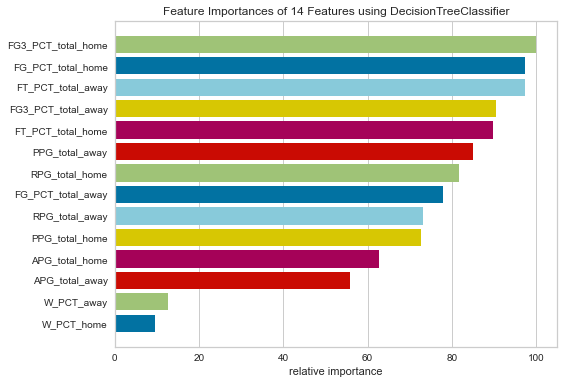

---------------------------------------------
i=28


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best decision tree accuracy ({'criterion': 'gini'}): 0.50
              precision    recall  f1-score   support

           0       0.45      0.47      0.46      1453
           1       0.54      0.52      0.53      1754

    accuracy                           0.50      3207
   macro avg       0.49      0.49      0.49      3207
weighted avg       0.50      0.50      0.50      3207



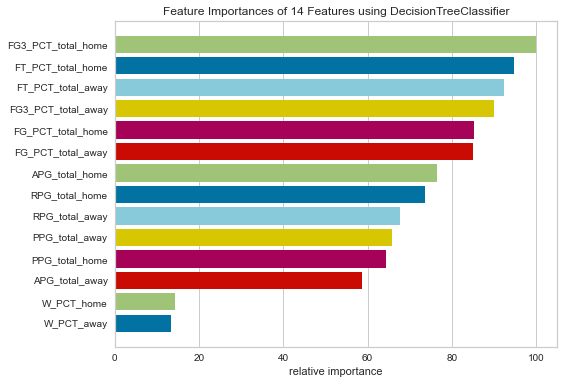

---------------------------------------------
i=29


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.49
              precision    recall  f1-score   support

           0       0.46      0.44      0.45      1495
           1       0.53      0.54      0.53      1711

    accuracy                           0.49      3206
   macro avg       0.49      0.49      0.49      3206
weighted avg       0.49      0.49      0.49      3206



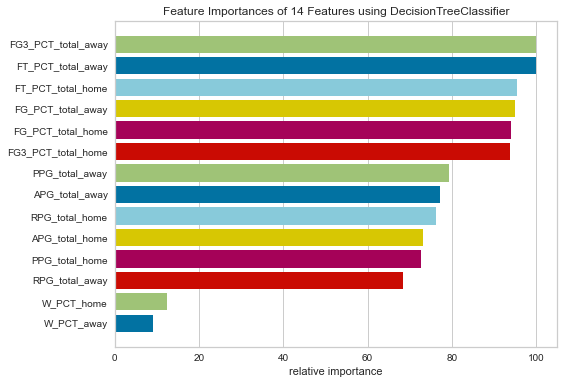

---------------------------------------------
Mean accuracy: 0.494621141253508
Max accuracy: 0.4989086373557842
Min accuracy: 0.4898659183037106


In [28]:
print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {'criterion':['gini','entropy']})

In [29]:
# plt.figure(figsize=(15,10))
# t = plot_tree(decision_tree_clf)

## Try prune max depth

i=0
WINNER:

Best decision tree accuracy ({'max_depth': 41, 'criterion': 'gini'}): 0.53
              precision    recall  f1-score   support

           0       0.42      0.43      0.42      1295
           1       0.60      0.59      0.60      1912

    accuracy                           0.53      3207
   macro avg       0.51      0.51      0.51      3207
weighted avg       0.53      0.53      0.53      3207



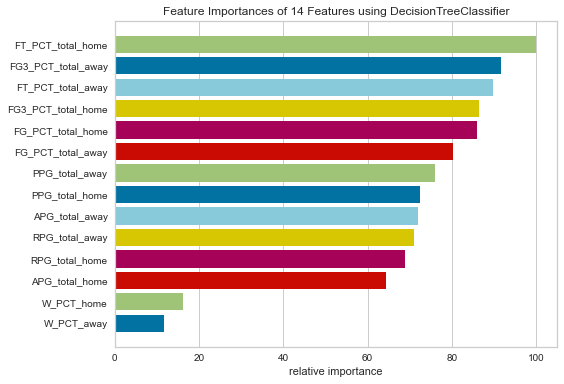

---------------------------------------------
i=1
WINNER:

Best decision tree accuracy ({'max_depth': 51, 'criterion': 'entropy'}): 0.51
              precision    recall  f1-score   support

           0       0.41      0.41      0.41      1336
           1       0.58      0.58      0.58      1871

    accuracy                           0.51      3207
   macro avg       0.50      0.50      0.50      3207
weighted avg       0.51      0.51      0.51      3207



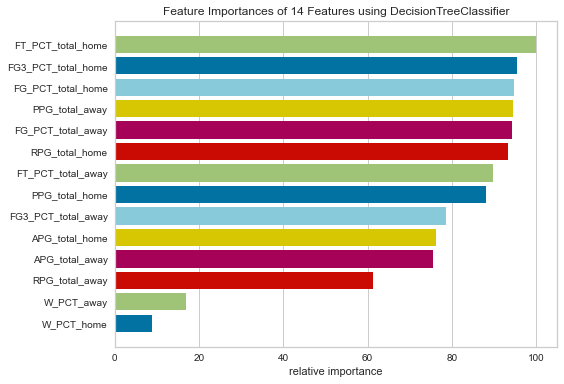

---------------------------------------------
i=2
WINNER:

Best decision tree accuracy ({'max_depth': 51, 'criterion': 'gini'}): 0.53
              precision    recall  f1-score   support

           0       0.41      0.44      0.43      1284
           1       0.61      0.59      0.60      1923

    accuracy                           0.53      3207
   macro avg       0.51      0.51      0.51      3207
weighted avg       0.53      0.53      0.53      3207



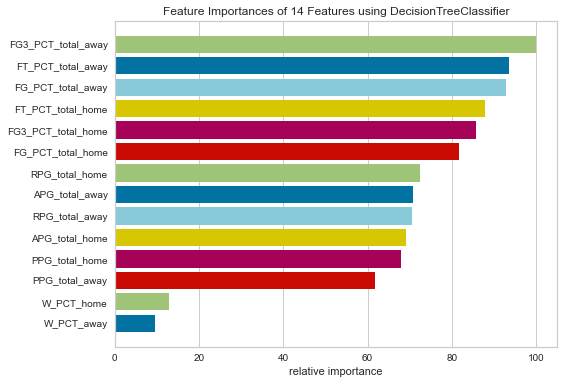

---------------------------------------------
i=3
WINNER:

Best decision tree accuracy ({'max_depth': 33, 'criterion': 'entropy'}): 0.50
              precision    recall  f1-score   support

           0       0.38      0.39      0.38      1293
           1       0.58      0.58      0.58      1914

    accuracy                           0.50      3207
   macro avg       0.48      0.48      0.48      3207
weighted avg       0.50      0.50      0.50      3207



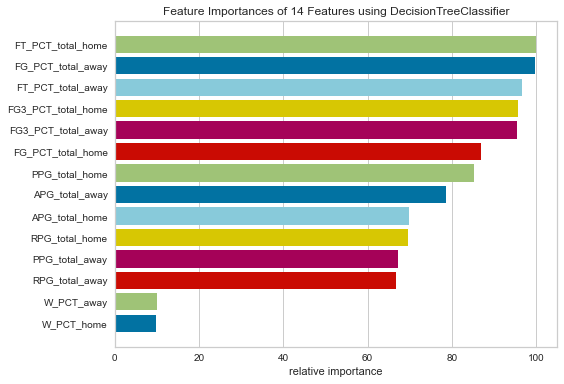

---------------------------------------------
i=4
WINNER:

Best decision tree accuracy ({'max_depth': 5, 'criterion': 'entropy'}): 0.43
              precision    recall  f1-score   support

           0       0.40      0.76      0.52      1302
           1       0.56      0.21      0.31      1904

    accuracy                           0.43      3206
   macro avg       0.48      0.48      0.41      3206
weighted avg       0.49      0.43      0.39      3206



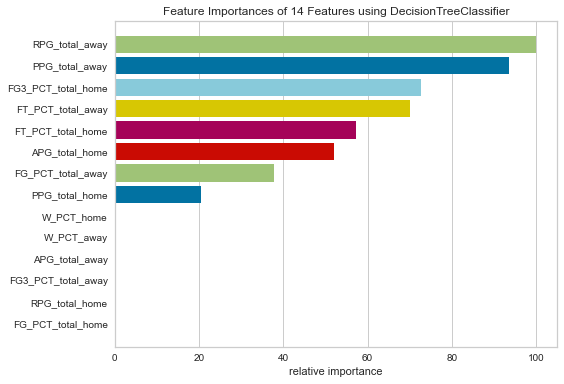

---------------------------------------------
Mean accuracy: 0.5164483941378235
Max accuracy: 0.5272840661053945
Min accuracy: 0.5023386342376053
i=5
FGP:

Best decision tree accuracy ({'max_depth': 10, 'criterion': 'gini'}): 0.50
              precision    recall  f1-score   support

           0       0.44      0.43      0.43      1418
           1       0.55      0.56      0.56      1789

    accuracy                           0.50      3207
   macro avg       0.49      0.49      0.49      3207
weighted avg       0.50      0.50      0.50      3207



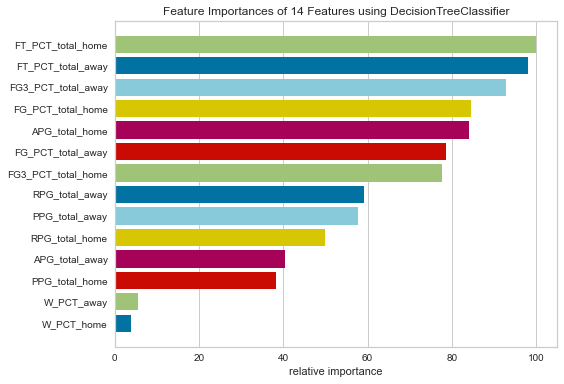

---------------------------------------------
i=6
FGP:

Best decision tree accuracy ({'max_depth': 4, 'criterion': 'gini'}): 0.53
              precision    recall  f1-score   support

           0       0.45      0.15      0.22      1461
           1       0.54      0.85      0.66      1746

    accuracy                           0.53      3207
   macro avg       0.50      0.50      0.44      3207
weighted avg       0.50      0.53      0.46      3207



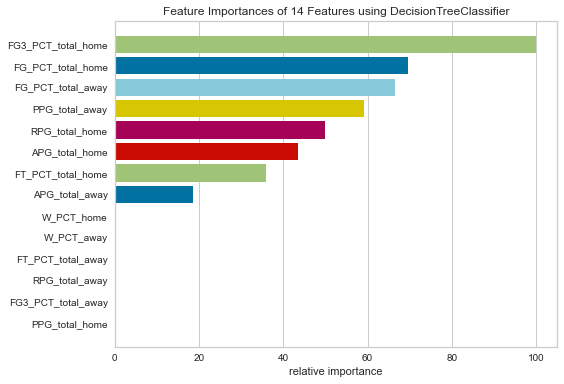

---------------------------------------------
i=7
FGP:

Best decision tree accuracy ({'max_depth': 27, 'criterion': 'entropy'}): 0.50
              precision    recall  f1-score   support

           0       0.46      0.51      0.48      1461
           1       0.55      0.49      0.52      1746

    accuracy                           0.50      3207
   macro avg       0.50      0.50      0.50      3207
weighted avg       0.50      0.50      0.50      3207



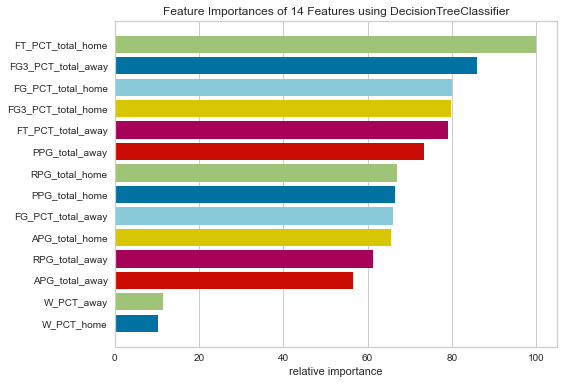

---------------------------------------------
i=8
FGP:

Best decision tree accuracy ({'max_depth': 8, 'criterion': 'gini'}): 0.53
              precision    recall  f1-score   support

           0       0.44      0.28      0.35      1408
           1       0.56      0.72      0.63      1799

    accuracy                           0.53      3207
   macro avg       0.50      0.50      0.49      3207
weighted avg       0.51      0.53      0.51      3207



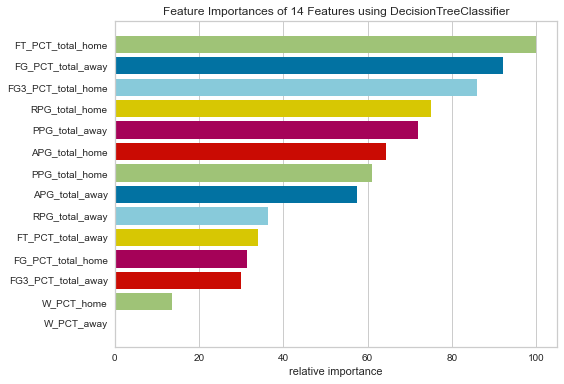

---------------------------------------------
i=9
FGP:

Best decision tree accuracy ({'max_depth': 8, 'criterion': 'entropy'}): 0.54
              precision    recall  f1-score   support

           0       0.37      0.09      0.14      1402
           1       0.56      0.89      0.68      1804

    accuracy                           0.54      3206
   macro avg       0.46      0.49      0.41      3206
weighted avg       0.48      0.54      0.45      3206



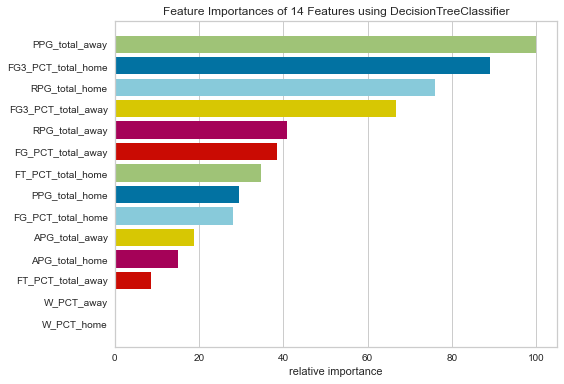

---------------------------------------------
Mean accuracy: 0.5148893046460867
Max accuracy: 0.529466791393826
Min accuracy: 0.49984409105082633
i=10
FG3:

Best decision tree accuracy ({'max_depth': 35, 'criterion': 'entropy'}): 0.48
              precision    recall  f1-score   support

           0       0.47      0.54      0.51      1563
           1       0.50      0.43      0.46      1644

    accuracy                           0.48      3207
   macro avg       0.48      0.49      0.48      3207
weighted avg       0.49      0.48      0.48      3207



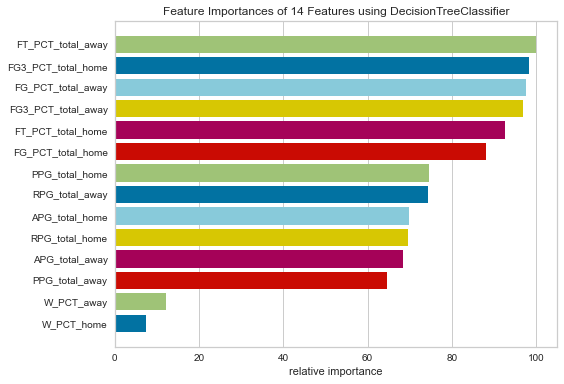

---------------------------------------------
i=11
FG3:

Best decision tree accuracy ({'max_depth': 22, 'criterion': 'gini'}): 0.50
              precision    recall  f1-score   support

           0       0.50      0.64      0.56      1595
           1       0.50      0.36      0.42      1612

    accuracy                           0.50      3207
   macro avg       0.50      0.50      0.49      3207
weighted avg       0.50      0.50      0.49      3207



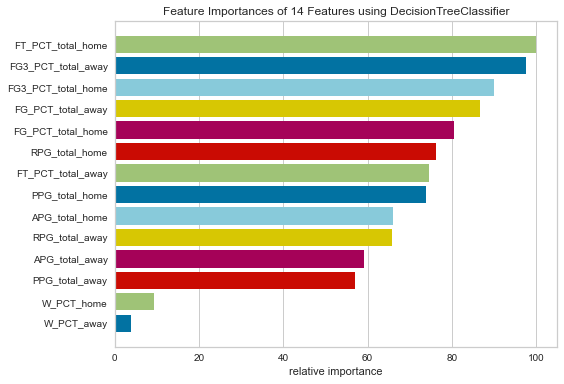

---------------------------------------------
i=12
FG3:

Best decision tree accuracy ({'max_depth': 31, 'criterion': 'entropy'}): 0.51
              precision    recall  f1-score   support

           0       0.52      0.39      0.45      1616
           1       0.51      0.64      0.57      1591

    accuracy                           0.51      3207
   macro avg       0.52      0.51      0.51      3207
weighted avg       0.52      0.51      0.51      3207



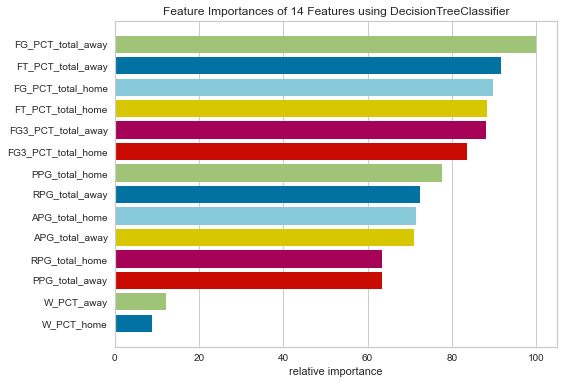

---------------------------------------------
i=13
FG3:

Best decision tree accuracy ({'max_depth': 45, 'criterion': 'entropy'}): 0.49
              precision    recall  f1-score   support

           0       0.47      0.49      0.48      1558
           1       0.50      0.49      0.49      1649

    accuracy                           0.49      3207
   macro avg       0.49      0.49      0.49      3207
weighted avg       0.49      0.49      0.49      3207



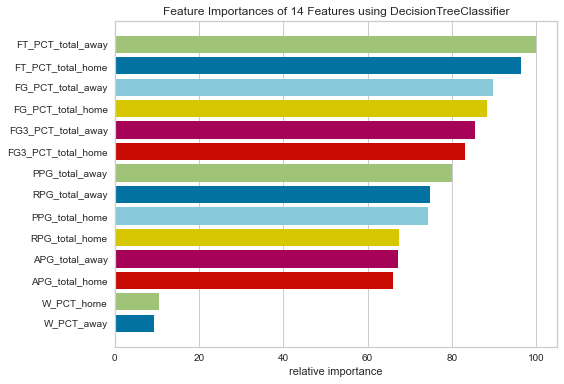

---------------------------------------------
i=14
FG3:

Best decision tree accuracy ({'max_depth': 12, 'criterion': 'entropy'}): 0.48
              precision    recall  f1-score   support

           0       0.48      0.78      0.59      1554
           1       0.49      0.20      0.29      1652

    accuracy                           0.48      3206
   macro avg       0.49      0.49      0.44      3206
weighted avg       0.49      0.48      0.43      3206



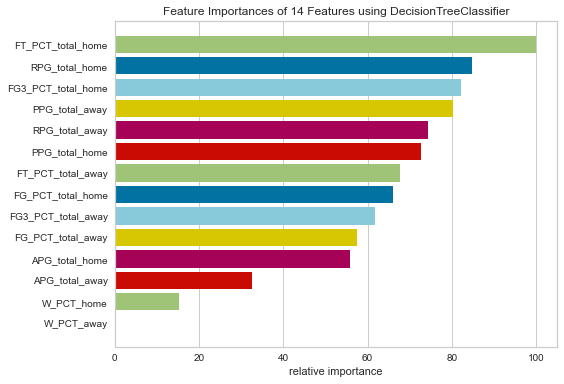

---------------------------------------------
Mean accuracy: 0.49532273152478956
Max accuracy: 0.513252260679763
Min accuracy: 0.48362956033676335
i=15
FT:

Best decision tree accuracy ({'max_depth': 21, 'criterion': 'gini'}): 0.49
              precision    recall  f1-score   support

           0       0.51      0.56      0.53      1647
           1       0.48      0.43      0.45      1560

    accuracy                           0.49      3207
   macro avg       0.49      0.49      0.49      3207
weighted avg       0.49      0.49      0.49      3207



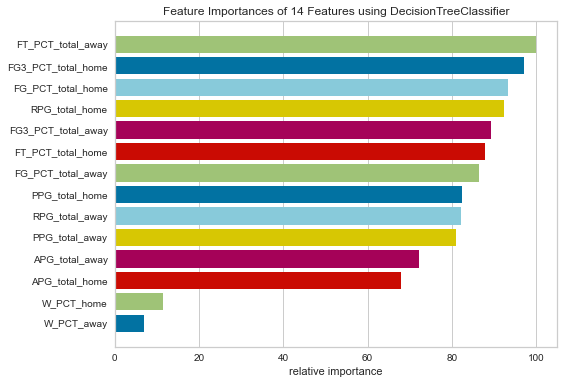

---------------------------------------------
i=16
FT:

Best decision tree accuracy ({'max_depth': 54, 'criterion': 'entropy'}): 0.50
              precision    recall  f1-score   support

           0       0.50      0.50      0.50      1618
           1       0.49      0.50      0.49      1589

    accuracy                           0.50      3207
   macro avg       0.50      0.50      0.50      3207
weighted avg       0.50      0.50      0.50      3207



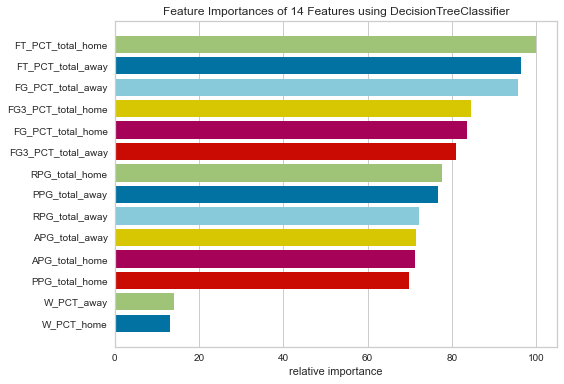

---------------------------------------------
i=17
FT:

Best decision tree accuracy ({'max_depth': 18, 'criterion': 'entropy'}): 0.51
              precision    recall  f1-score   support

           0       0.52      0.53      0.53      1629
           1       0.50      0.49      0.49      1578

    accuracy                           0.51      3207
   macro avg       0.51      0.51      0.51      3207
weighted avg       0.51      0.51      0.51      3207



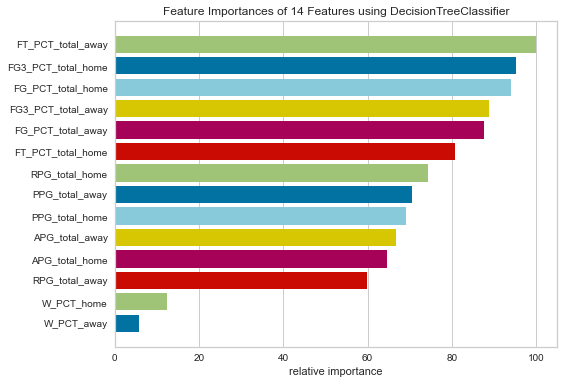

---------------------------------------------
i=18
FT:

Best decision tree accuracy ({'max_depth': 29, 'criterion': 'gini'}): 0.50
              precision    recall  f1-score   support

           0       0.50      0.48      0.49      1614
           1       0.50      0.52      0.51      1593

    accuracy                           0.50      3207
   macro avg       0.50      0.50      0.50      3207
weighted avg       0.50      0.50      0.50      3207



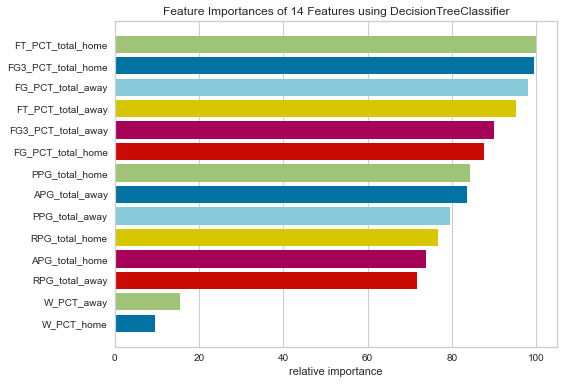

---------------------------------------------
i=19
FT:

Best decision tree accuracy ({'max_depth': 47, 'criterion': 'entropy'}): 0.50
              precision    recall  f1-score   support

           0       0.49      0.51      0.50      1588
           1       0.50      0.48      0.49      1618

    accuracy                           0.50      3206
   macro avg       0.50      0.50      0.50      3206
weighted avg       0.50      0.50      0.50      3206



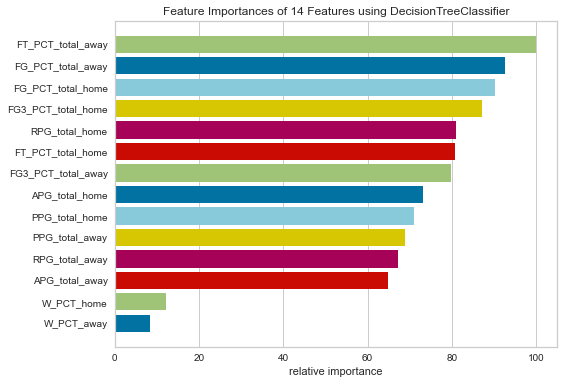

---------------------------------------------
Mean accuracy: 0.5
Max accuracy: 0.509822263797942
Min accuracy: 0.49485500467726845
i=20
AST:

Best decision tree accuracy ({'max_depth': 24, 'criterion': 'gini'}): 0.51
              precision    recall  f1-score   support

           0       0.47      0.45      0.46      1491
           1       0.54      0.56      0.55      1716

    accuracy                           0.51      3207
   macro avg       0.50      0.50      0.50      3207
weighted avg       0.51      0.51      0.51      3207



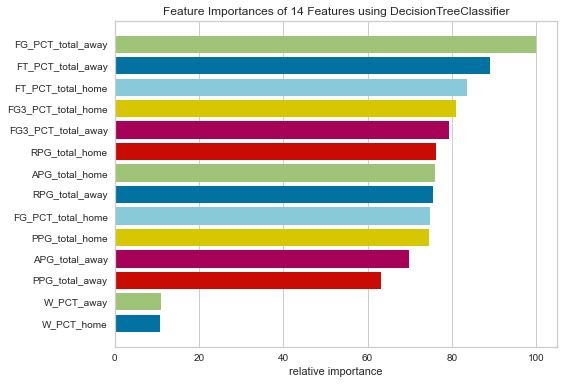

---------------------------------------------
i=21
AST:

Best decision tree accuracy ({'max_depth': 6, 'criterion': 'gini'}): 0.47
              precision    recall  f1-score   support

           0       0.45      0.75      0.56      1442
           1       0.55      0.25      0.34      1765

    accuracy                           0.47      3207
   macro avg       0.50      0.50      0.45      3207
weighted avg       0.50      0.47      0.44      3207



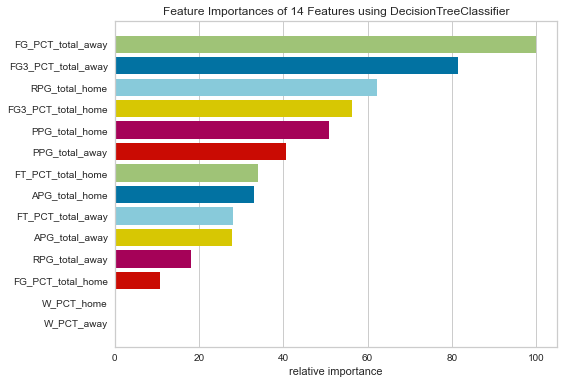

---------------------------------------------
i=22
AST:

Best decision tree accuracy ({'max_depth': 35, 'criterion': 'entropy'}): 0.50
              precision    recall  f1-score   support

           0       0.45      0.44      0.45      1459
           1       0.54      0.55      0.54      1748

    accuracy                           0.50      3207
   macro avg       0.50      0.50      0.50      3207
weighted avg       0.50      0.50      0.50      3207



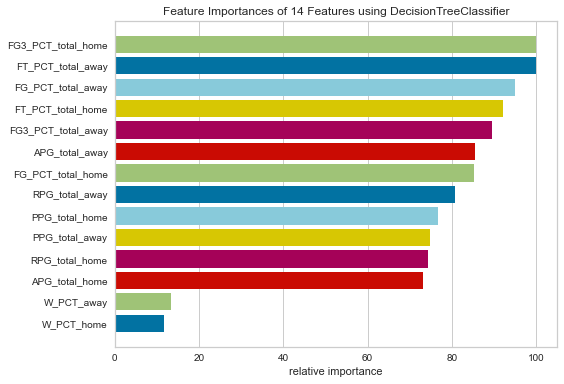

---------------------------------------------
i=23
AST:

Best decision tree accuracy ({'max_depth': 27, 'criterion': 'entropy'}): 0.48
              precision    recall  f1-score   support

           0       0.43      0.51      0.47      1429
           1       0.54      0.46      0.50      1778

    accuracy                           0.48      3207
   macro avg       0.49      0.49      0.48      3207
weighted avg       0.49      0.48      0.49      3207



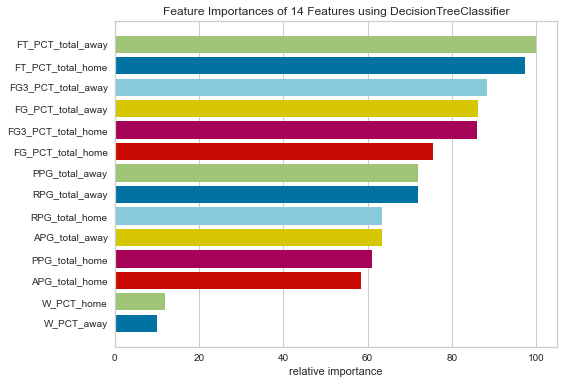

---------------------------------------------
i=24
AST:

Best decision tree accuracy ({'max_depth': 25, 'criterion': 'gini'}): 0.50
              precision    recall  f1-score   support

           0       0.44      0.47      0.46      1425
           1       0.55      0.53      0.54      1781

    accuracy                           0.50      3206
   macro avg       0.50      0.50      0.50      3206
weighted avg       0.50      0.50      0.50      3206



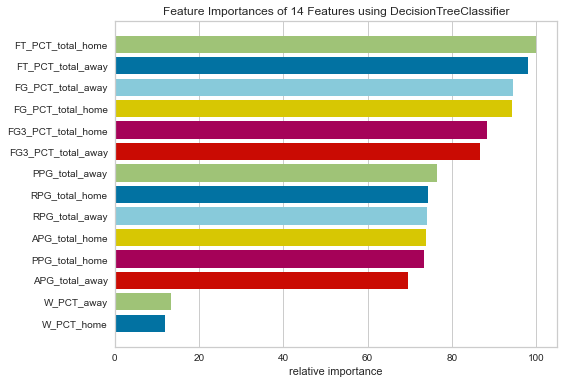

---------------------------------------------
Mean accuracy: 0.49103523542251326
Max accuracy: 0.5063922669161209
Min accuracy: 0.4730277517929529
i=25
REB:

Best decision tree accuracy ({'max_depth': 30, 'criterion': 'gini'}): 0.49
              precision    recall  f1-score   support

           0       0.46      0.54      0.50      1487
           1       0.53      0.45      0.49      1720

    accuracy                           0.49      3207
   macro avg       0.50      0.50      0.49      3207
weighted avg       0.50      0.49      0.49      3207



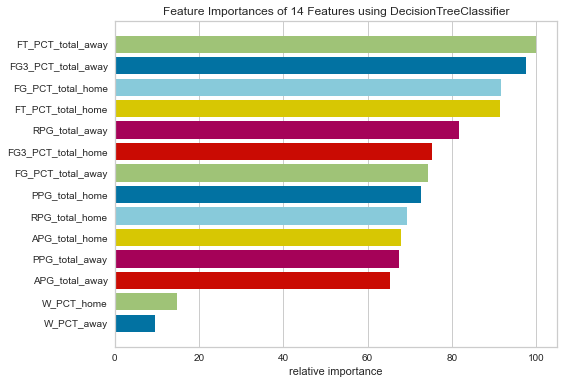

---------------------------------------------
i=26
REB:

Best decision tree accuracy ({'max_depth': 24, 'criterion': 'gini'}): 0.50
              precision    recall  f1-score   support

           0       0.48      0.39      0.43      1546
           1       0.51      0.59      0.55      1661

    accuracy                           0.50      3207
   macro avg       0.49      0.49      0.49      3207
weighted avg       0.49      0.50      0.49      3207



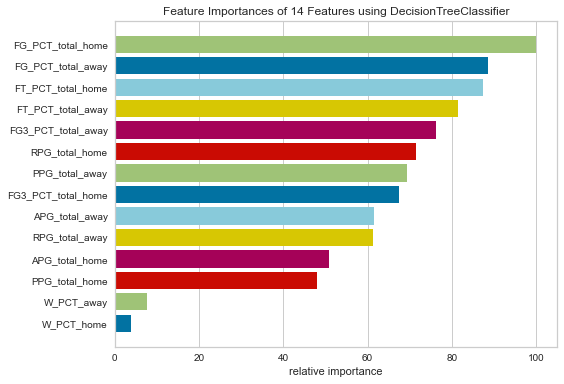

---------------------------------------------
i=27
REB:

Best decision tree accuracy ({'max_depth': 59, 'criterion': 'entropy'}): 0.49
              precision    recall  f1-score   support

           0       0.46      0.46      0.46      1501
           1       0.52      0.52      0.52      1706

    accuracy                           0.49      3207
   macro avg       0.49      0.49      0.49      3207
weighted avg       0.49      0.49      0.49      3207



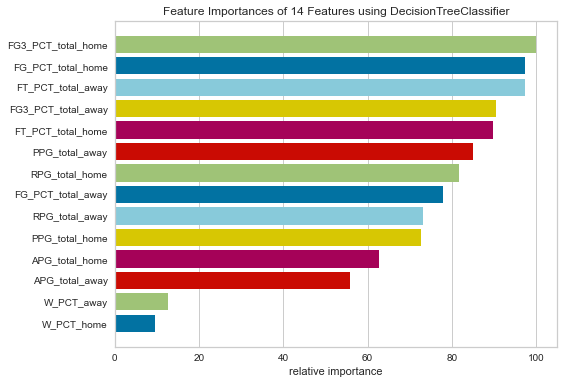

---------------------------------------------
i=28
REB:

Best decision tree accuracy ({'max_depth': 31, 'criterion': 'gini'}): 0.49
              precision    recall  f1-score   support

           0       0.44      0.51      0.48      1453
           1       0.54      0.47      0.50      1754

    accuracy                           0.49      3207
   macro avg       0.49      0.49      0.49      3207
weighted avg       0.49      0.49      0.49      3207



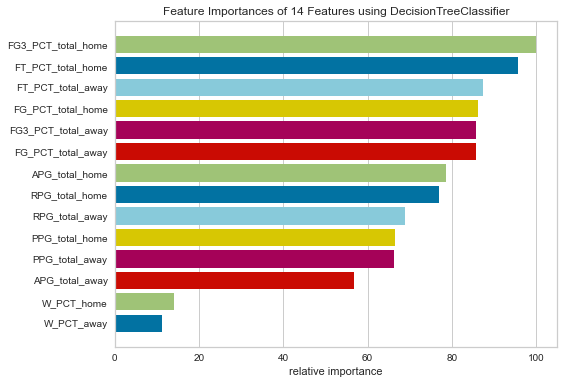

---------------------------------------------
i=29
REB:

Best decision tree accuracy ({'max_depth': 11, 'criterion': 'gini'}): 0.49
              precision    recall  f1-score   support

           0       0.47      0.75      0.58      1495
           1       0.54      0.25      0.34      1711

    accuracy                           0.49      3206
   macro avg       0.50      0.50      0.46      3206
weighted avg       0.50      0.49      0.45      3206



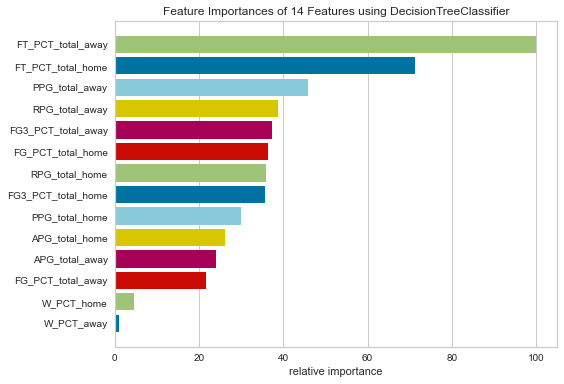

---------------------------------------------
Mean accuracy: 0.4929061428125974
Max accuracy: 0.4979731836607421
Min accuracy: 0.4883068288119738


In [30]:
print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {
    'max_depth': [*range(4,60)],
    'criterion': ['gini', 'entropy'],
})

## Try prune impurity decrease

i=0
WINNER:

Best decision tree accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'gini'}): 0.53
              precision    recall  f1-score   support

           0       0.41      0.41      0.41      1295
           1       0.60      0.61      0.60      1912

    accuracy                           0.53      3207
   macro avg       0.51      0.51      0.51      3207
weighted avg       0.53      0.53      0.53      3207



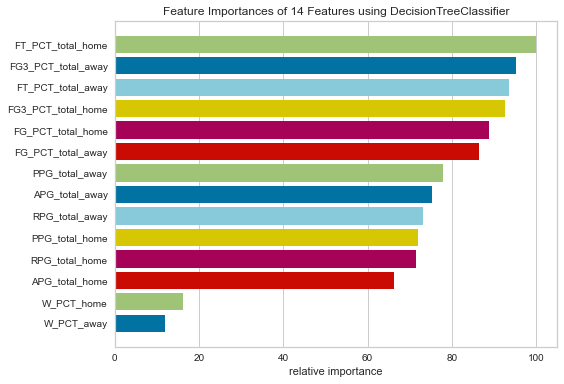

---------------------------------------------
i=1
WINNER:

Best decision tree accuracy ({'min_impurity_decrease': 0.1, 'criterion': 'entropy'}): 0.58
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1336
           1       0.58      1.00      0.74      1871

    accuracy                           0.58      3207
   macro avg       0.29      0.50      0.37      3207
weighted avg       0.34      0.58      0.43      3207



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

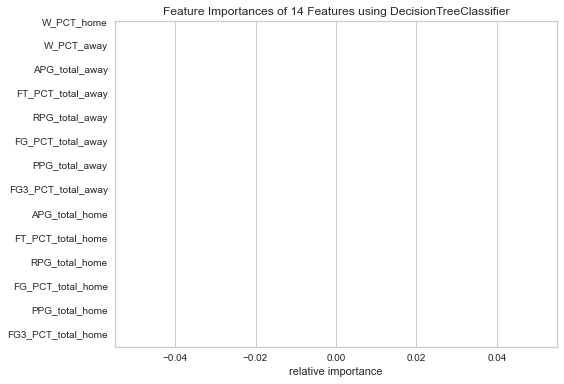

---------------------------------------------
i=2
WINNER:

Best decision tree accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'entropy'}): 0.52
              precision    recall  f1-score   support

           0       0.40      0.42      0.41      1284
           1       0.60      0.58      0.59      1923

    accuracy                           0.52      3207
   macro avg       0.50      0.50      0.50      3207
weighted avg       0.52      0.52      0.52      3207



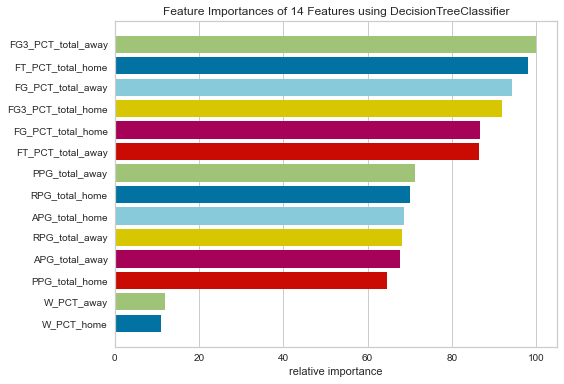

---------------------------------------------
i=3
WINNER:

Best decision tree accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'entropy'}): 0.52
              precision    recall  f1-score   support

           0       0.40      0.41      0.41      1293
           1       0.60      0.59      0.60      1914

    accuracy                           0.52      3207
   macro avg       0.50      0.50      0.50      3207
weighted avg       0.52      0.52      0.52      3207



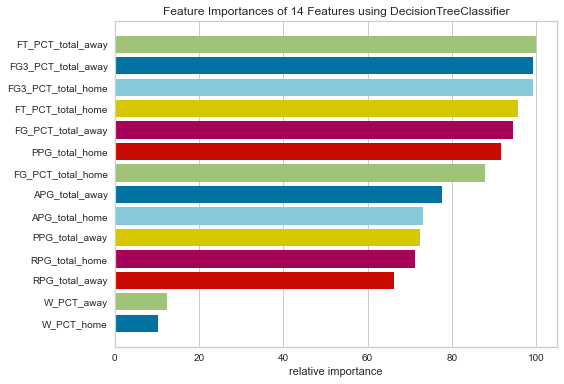

---------------------------------------------
i=4
WINNER:

Best decision tree accuracy ({'min_impurity_decrease': 0.4, 'criterion': 'entropy'}): 0.59
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1302
           1       0.59      1.00      0.75      1904

    accuracy                           0.59      3206
   macro avg       0.30      0.50      0.37      3206
weighted avg       0.35      0.59      0.44      3206



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

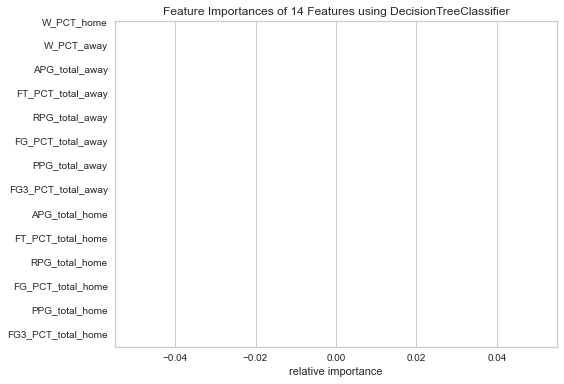

---------------------------------------------
Mean accuracy: 0.5364826941066417
Max accuracy: 0.5834112878079202
Min accuracy: 0.516682257561584
i=5
FGP:

Best decision tree accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'gini'}): 0.50
              precision    recall  f1-score   support

           0       0.44      0.46      0.45      1418
           1       0.56      0.54      0.55      1789

    accuracy                           0.50      3207
   macro avg       0.50      0.50      0.50      3207
weighted avg       0.51      0.50      0.50      3207



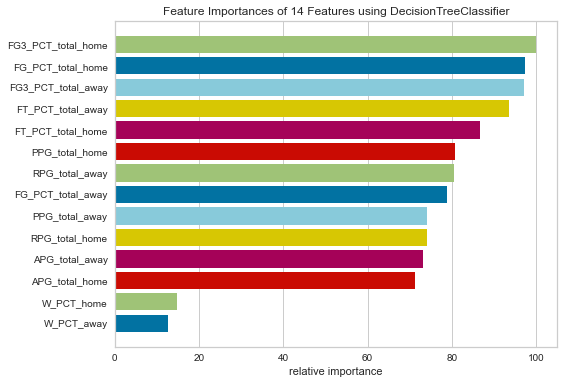

---------------------------------------------
i=6
FGP:

Best decision tree accuracy ({'min_impurity_decrease': 0.65, 'criterion': 'gini'}): 0.46
              precision    recall  f1-score   support

           0       0.46      1.00      0.63      1461
           1       0.00      0.00      0.00      1746

    accuracy                           0.46      3207
   macro avg       0.23      0.50      0.31      3207
weighted avg       0.21      0.46      0.29      3207



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

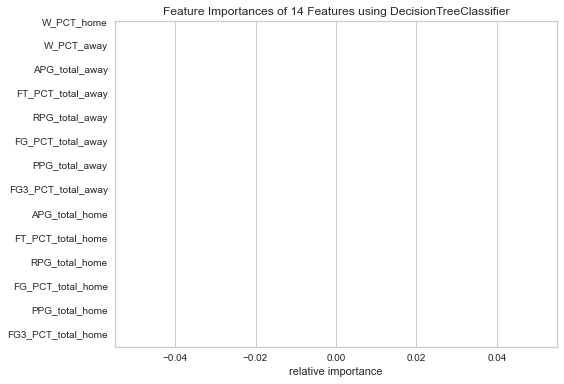

---------------------------------------------
i=7
FGP:

Best decision tree accuracy ({'min_impurity_decrease': 0.7, 'criterion': 'entropy'}): 0.46
              precision    recall  f1-score   support

           0       0.46      1.00      0.63      1461
           1       0.00      0.00      0.00      1746

    accuracy                           0.46      3207
   macro avg       0.23      0.50      0.31      3207
weighted avg       0.21      0.46      0.29      3207



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

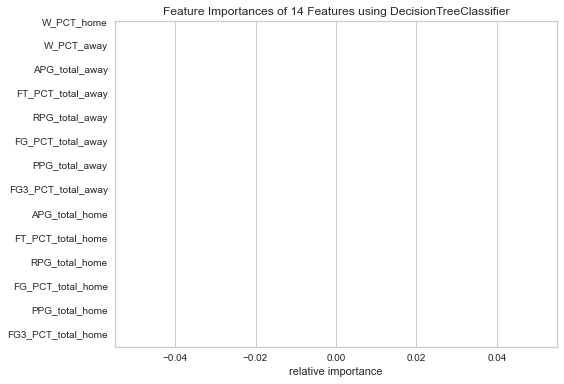

---------------------------------------------
i=8
FGP:

Best decision tree accuracy ({'min_impurity_decrease': 0.5, 'criterion': 'entropy'}): 0.44
              precision    recall  f1-score   support

           0       0.44      1.00      0.61      1408
           1       0.00      0.00      0.00      1799

    accuracy                           0.44      3207
   macro avg       0.22      0.50      0.31      3207
weighted avg       0.19      0.44      0.27      3207



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

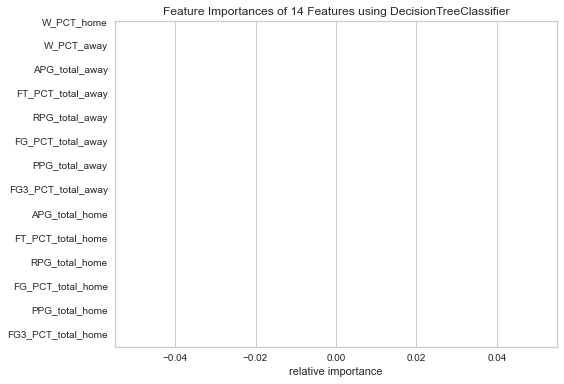

---------------------------------------------
i=9
FGP:

Best decision tree accuracy ({'min_impurity_decrease': 0.85, 'criterion': 'gini'}): 0.56
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1402
           1       0.56      1.00      0.72      1804

    accuracy                           0.56      3206
   macro avg       0.28      0.50      0.36      3206
weighted avg       0.32      0.56      0.41      3206



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

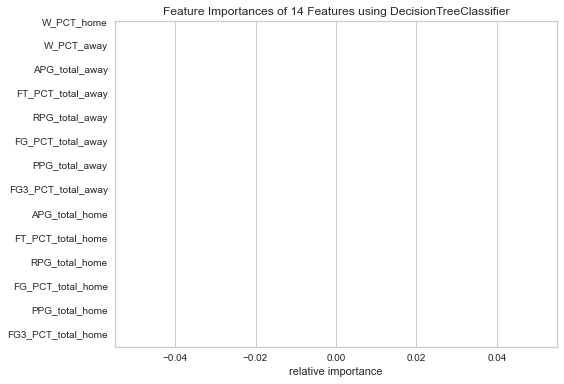

---------------------------------------------
Mean accuracy: 0.46351730589335827
Max accuracy: 0.503897723729342
Min accuracy: 0.43903960087309013
i=10
FG3:

Best decision tree accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'entropy'}): 0.48
              precision    recall  f1-score   support

           0       0.47      0.48      0.48      1563
           1       0.50      0.48      0.49      1644

    accuracy                           0.48      3207
   macro avg       0.48      0.48      0.48      3207
weighted avg       0.48      0.48      0.48      3207



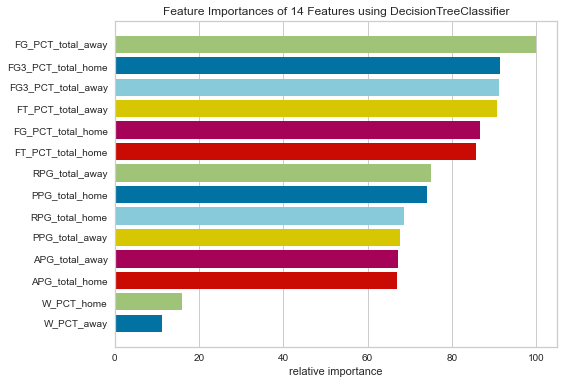

---------------------------------------------
i=11
FG3:

Best decision tree accuracy ({'min_impurity_decrease': 0.75, 'criterion': 'entropy'}): 0.50
              precision    recall  f1-score   support

           0       0.50      1.00      0.66      1595
           1       0.00      0.00      0.00      1612

    accuracy                           0.50      3207
   macro avg       0.25      0.50      0.33      3207
weighted avg       0.25      0.50      0.33      3207



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

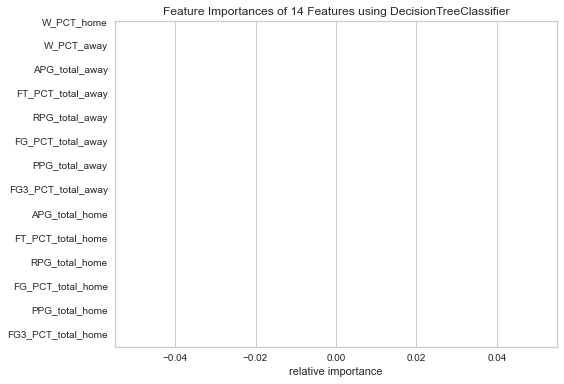

---------------------------------------------
i=12
FG3:

Best decision tree accuracy ({'min_impurity_decrease': 0.15, 'criterion': 'entropy'}): 0.50
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1616
           1       0.50      1.00      0.66      1591

    accuracy                           0.50      3207
   macro avg       0.25      0.50      0.33      3207
weighted avg       0.25      0.50      0.33      3207



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

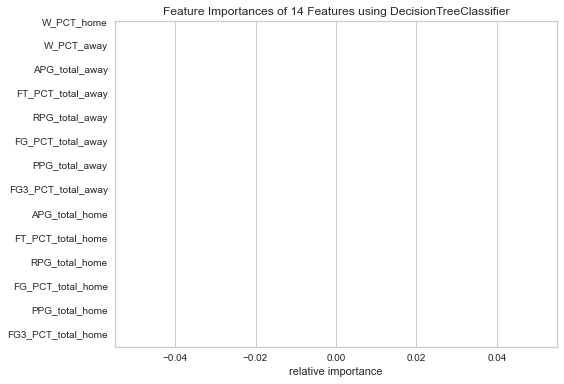

---------------------------------------------
i=13
FG3:

Best decision tree accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'entropy'}): 0.49
              precision    recall  f1-score   support

           0       0.48      0.49      0.48      1558
           1       0.51      0.50      0.50      1649

    accuracy                           0.49      3207
   macro avg       0.49      0.49      0.49      3207
weighted avg       0.49      0.49      0.49      3207



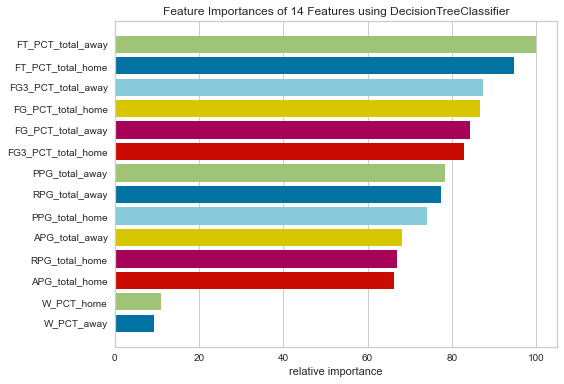

---------------------------------------------
i=14
FG3:

Best decision tree accuracy ({'min_impurity_decrease': 0.6, 'criterion': 'gini'}): 0.48
              precision    recall  f1-score   support

           0       0.48      1.00      0.65      1554
           1       0.00      0.00      0.00      1652

    accuracy                           0.48      3206
   macro avg       0.24      0.50      0.33      3206
weighted avg       0.23      0.48      0.32      3206



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

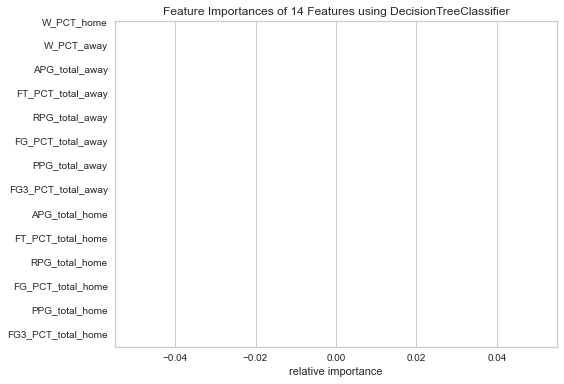

---------------------------------------------
Mean accuracy: 0.49259432491425004
Max accuracy: 0.4973495478640474
Min accuracy: 0.4839413782351107
i=15
FT:

Best decision tree accuracy ({'min_impurity_decrease': 0.95, 'criterion': 'gini'}): 0.49
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1647
           1       0.49      1.00      0.65      1560

    accuracy                           0.49      3207
   macro avg       0.24      0.50      0.33      3207
weighted avg       0.24      0.49      0.32      3207



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

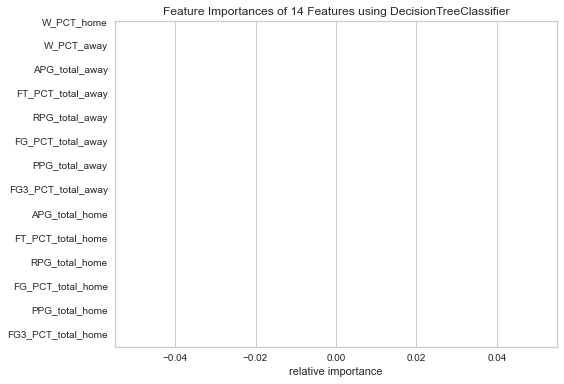

---------------------------------------------
i=16
FT:

Best decision tree accuracy ({'min_impurity_decrease': 0.2, 'criterion': 'entropy'}): 0.50
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1618
           1       0.50      1.00      0.66      1589

    accuracy                           0.50      3207
   macro avg       0.25      0.50      0.33      3207
weighted avg       0.25      0.50      0.33      3207



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

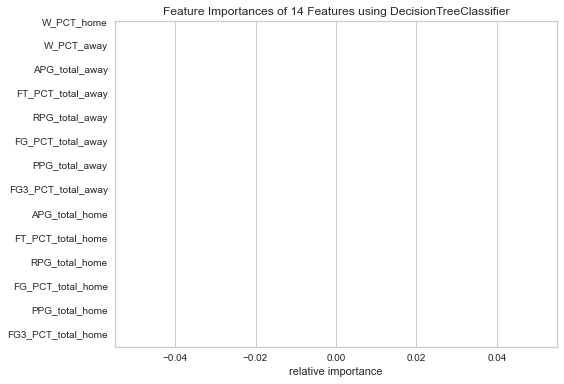

---------------------------------------------
i=17
FT:

Best decision tree accuracy ({'min_impurity_decrease': 0.95, 'criterion': 'gini'}): 0.49
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1629
           1       0.49      1.00      0.66      1578

    accuracy                           0.49      3207
   macro avg       0.25      0.50      0.33      3207
weighted avg       0.24      0.49      0.32      3207



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

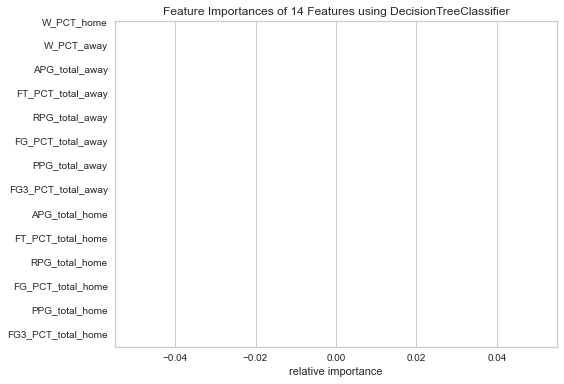

---------------------------------------------
i=18
FT:

Best decision tree accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'gini'}): 0.51
              precision    recall  f1-score   support

           0       0.51      0.50      0.50      1614
           1       0.50      0.51      0.51      1593

    accuracy                           0.51      3207
   macro avg       0.51      0.51      0.51      3207
weighted avg       0.51      0.51      0.51      3207



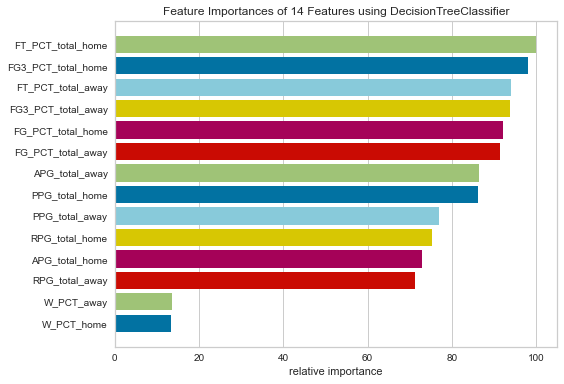

---------------------------------------------
i=19
FT:

Best decision tree accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'entropy'}): 0.50
              precision    recall  f1-score   support

           0       0.50      0.49      0.49      1588
           1       0.50      0.51      0.51      1618

    accuracy                           0.50      3206
   macro avg       0.50      0.50      0.50      3206
weighted avg       0.50      0.50      0.50      3206



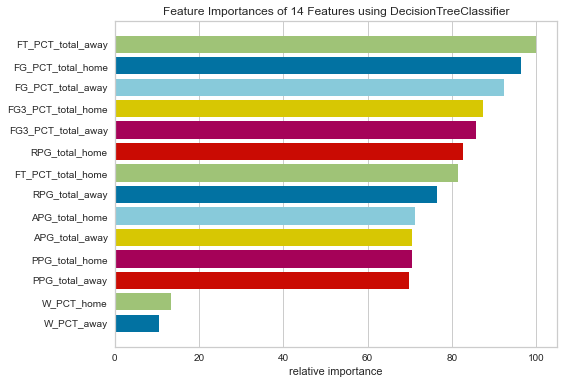

---------------------------------------------
Mean accuracy: 0.4947770502026816
Max accuracy: 0.5051449953227315
Min accuracy: 0.4864359214218896
i=20
AST:

Best decision tree accuracy ({'min_impurity_decrease': 0.85, 'criterion': 'entropy'}): 0.54
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1491
           1       0.54      1.00      0.70      1716

    accuracy                           0.54      3207
   macro avg       0.27      0.50      0.35      3207
weighted avg       0.29      0.54      0.37      3207



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

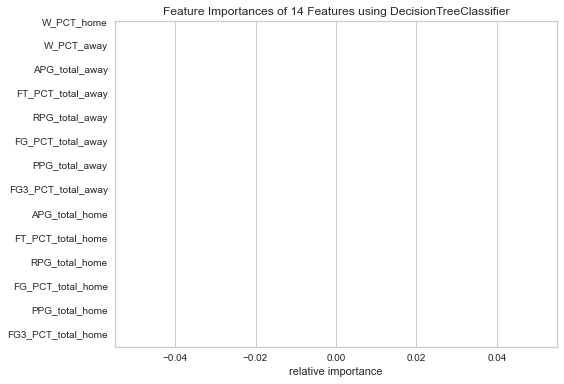

---------------------------------------------
i=21
AST:

Best decision tree accuracy ({'min_impurity_decrease': 0.65, 'criterion': 'gini'}): 0.55
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1442
           1       0.55      1.00      0.71      1765

    accuracy                           0.55      3207
   macro avg       0.28      0.50      0.35      3207
weighted avg       0.30      0.55      0.39      3207



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

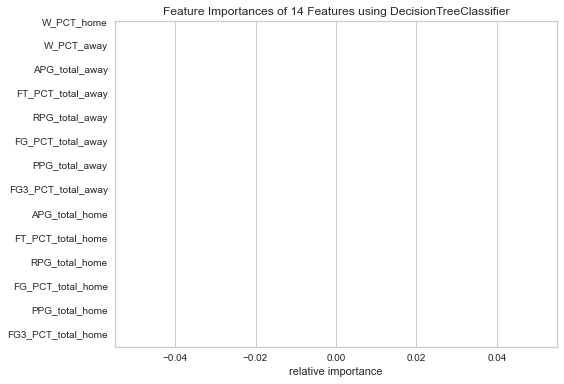

---------------------------------------------
i=22
AST:

Best decision tree accuracy ({'min_impurity_decrease': 0.15, 'criterion': 'entropy'}): 0.55
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1459
           1       0.55      1.00      0.71      1748

    accuracy                           0.55      3207
   macro avg       0.27      0.50      0.35      3207
weighted avg       0.30      0.55      0.38      3207



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

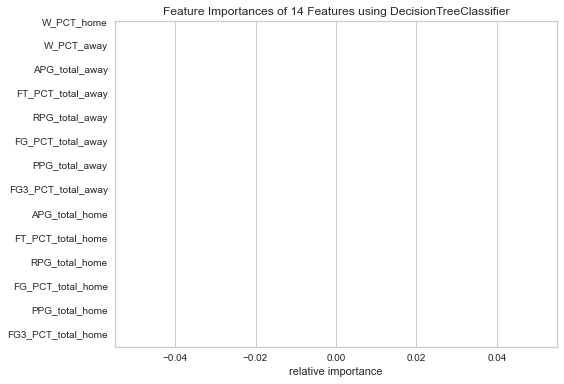

---------------------------------------------
i=23
AST:

Best decision tree accuracy ({'min_impurity_decrease': 0.35, 'criterion': 'gini'}): 0.45
              precision    recall  f1-score   support

           0       0.45      1.00      0.62      1429
           1       0.00      0.00      0.00      1778

    accuracy                           0.45      3207
   macro avg       0.22      0.50      0.31      3207
weighted avg       0.20      0.45      0.27      3207



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

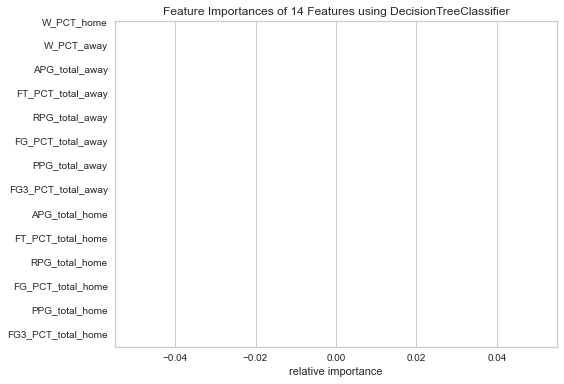

---------------------------------------------
i=24
AST:

Best decision tree accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'gini'}): 0.50
              precision    recall  f1-score   support

           0       0.44      0.46      0.45      1425
           1       0.55      0.53      0.54      1781

    accuracy                           0.50      3206
   macro avg       0.50      0.50      0.50      3206
weighted avg       0.50      0.50      0.50      3206



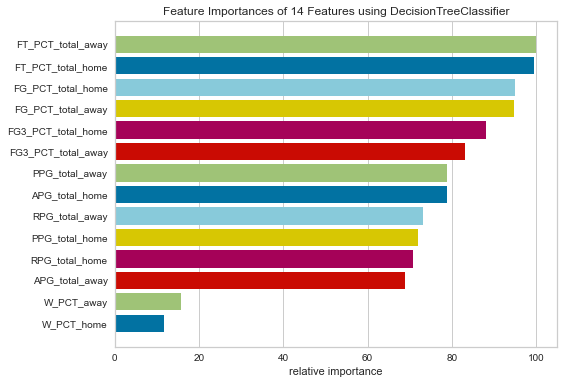

---------------------------------------------
Mean accuracy: 0.5190208917991892
Max accuracy: 0.5503585905830994
Min accuracy: 0.4455877767383848
i=25
REB:

Best decision tree accuracy ({'min_impurity_decrease': 0.55, 'criterion': 'entropy'}): 0.46
              precision    recall  f1-score   support

           0       0.46      1.00      0.63      1487
           1       0.00      0.00      0.00      1720

    accuracy                           0.46      3207
   macro avg       0.23      0.50      0.32      3207
weighted avg       0.21      0.46      0.29      3207



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

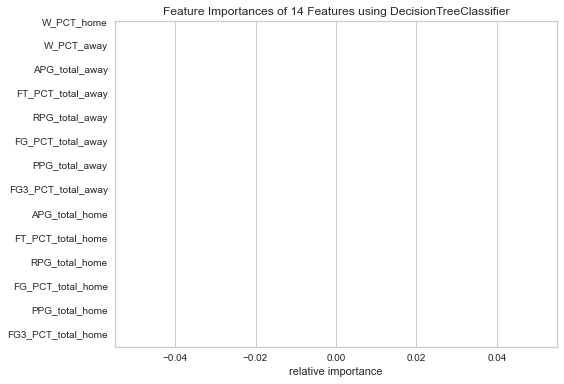

---------------------------------------------
i=26
REB:

Best decision tree accuracy ({'min_impurity_decrease': 0.7, 'criterion': 'gini'}): 0.48
              precision    recall  f1-score   support

           0       0.48      1.00      0.65      1546
           1       0.00      0.00      0.00      1661

    accuracy                           0.48      3207
   macro avg       0.24      0.50      0.33      3207
weighted avg       0.23      0.48      0.31      3207



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

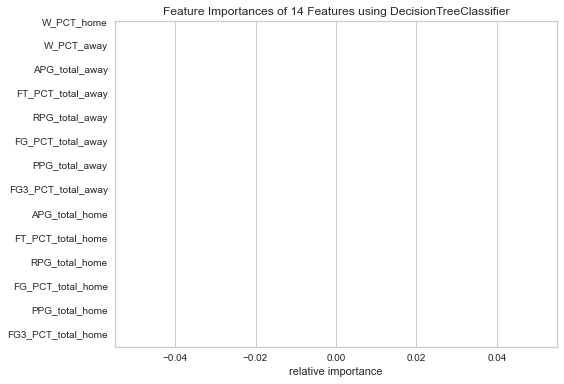

---------------------------------------------
i=27
REB:

Best decision tree accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'gini'}): 0.49
              precision    recall  f1-score   support

           0       0.46      0.47      0.46      1501
           1       0.52      0.51      0.52      1706

    accuracy                           0.49      3207
   macro avg       0.49      0.49      0.49      3207
weighted avg       0.49      0.49      0.49      3207



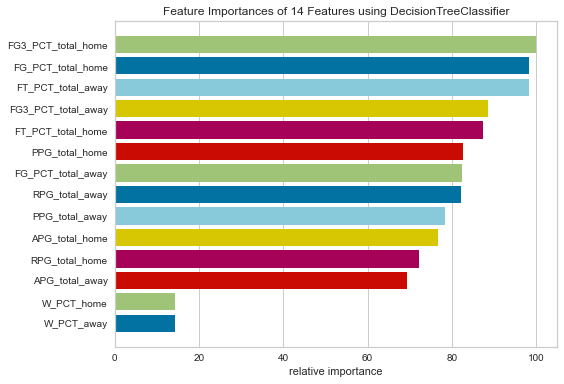

---------------------------------------------
i=28
REB:

Best decision tree accuracy ({'min_impurity_decrease': 0.5, 'criterion': 'entropy'}): 0.55
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1453
           1       0.55      1.00      0.71      1754

    accuracy                           0.55      3207
   macro avg       0.27      0.50      0.35      3207
weighted avg       0.30      0.55      0.39      3207



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

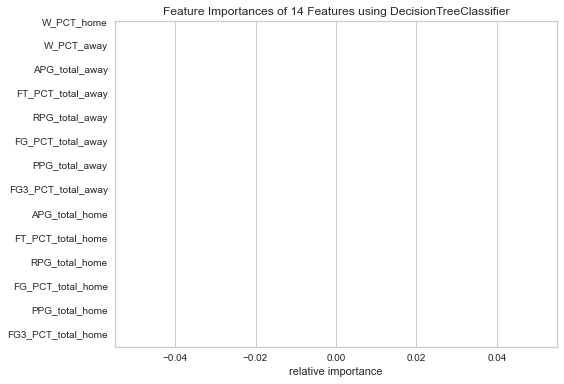

---------------------------------------------
i=29
REB:

Best decision tree accuracy ({'min_impurity_decrease': 0.65, 'criterion': 'entropy'}): 0.47
              precision    recall  f1-score   support

           0       0.47      1.00      0.64      1495
           1       0.00      0.00      0.00      1711

    accuracy                           0.47      3206
   macro avg       0.23      0.50      0.32      3206
weighted avg       0.22      0.47      0.30      3206



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

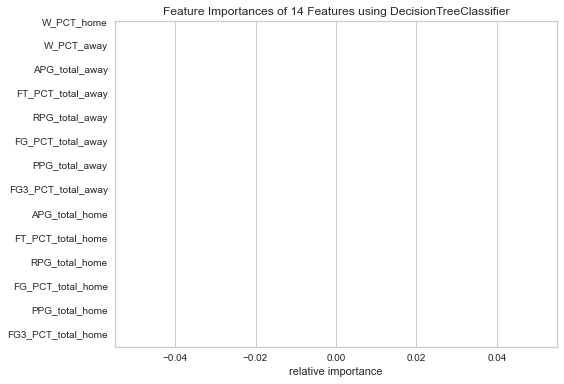

---------------------------------------------
Mean accuracy: 0.4962581852198316
Max accuracy: 0.5469285937012784
Min accuracy: 0.463673214842532


In [31]:
# print_all_metrics_and_plot(
#     DecisionTreeClassifier(random_state=0),
#     X_train_dict,
#     X_test_dict,
#     {
#         'min_impurity_decrease': [0.0,0.01],
#         'criterion': ['gini', 'entropy'],
#     },
# )
print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {
    'min_impurity_decrease': [0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95],
    'criterion': ['gini', 'entropy'],
})
# print('Any non-zero min_impurity_decrease causes all classifications to be 1')

## Try prune max leaves

i=0
WINNER:

Best decision tree accuracy ({'max_leaf_nodes': 18, 'criterion': 'entropy'}): 0.55
              precision    recall  f1-score   support

           0       0.41      0.25      0.31      1295
           1       0.60      0.76      0.67      1912

    accuracy                           0.55      3207
   macro avg       0.51      0.51      0.49      3207
weighted avg       0.52      0.55      0.53      3207



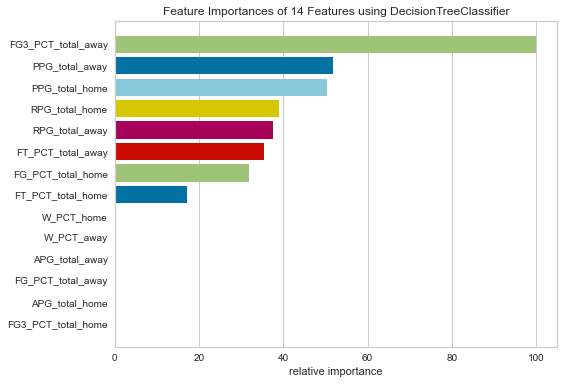

---------------------------------------------
i=1
WINNER:

Best decision tree accuracy ({'max_leaf_nodes': 9, 'criterion': 'gini'}): 0.58
              precision    recall  f1-score   support

           0       0.45      0.01      0.03      1336
           1       0.58      0.99      0.73      1871

    accuracy                           0.58      3207
   macro avg       0.52      0.50      0.38      3207
weighted avg       0.53      0.58      0.44      3207



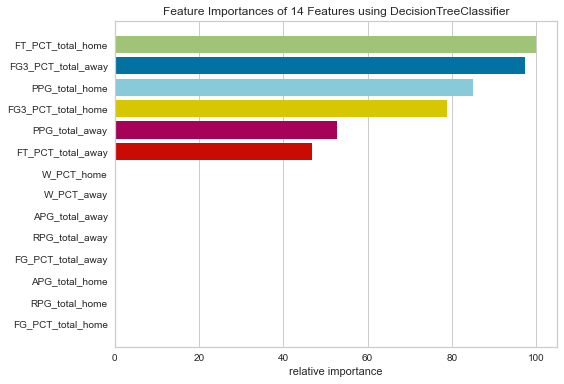

---------------------------------------------
i=2
WINNER:

Best decision tree accuracy ({'max_leaf_nodes': 12, 'criterion': 'entropy'}): 0.42
              precision    recall  f1-score   support

           0       0.40      0.87      0.55      1284
           1       0.60      0.12      0.21      1923

    accuracy                           0.42      3207
   macro avg       0.50      0.50      0.38      3207
weighted avg       0.52      0.42      0.34      3207



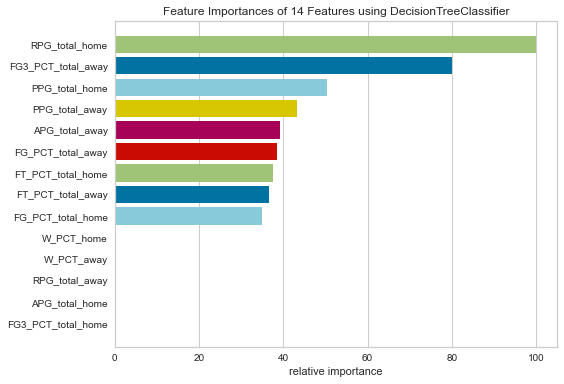

---------------------------------------------
i=3
WINNER:

Best decision tree accuracy ({'max_leaf_nodes': 14, 'criterion': 'gini'}): 0.44
              precision    recall  f1-score   support

           0       0.40      0.79      0.53      1293
           1       0.59      0.21      0.30      1914

    accuracy                           0.44      3207
   macro avg       0.49      0.50      0.42      3207
weighted avg       0.51      0.44      0.40      3207



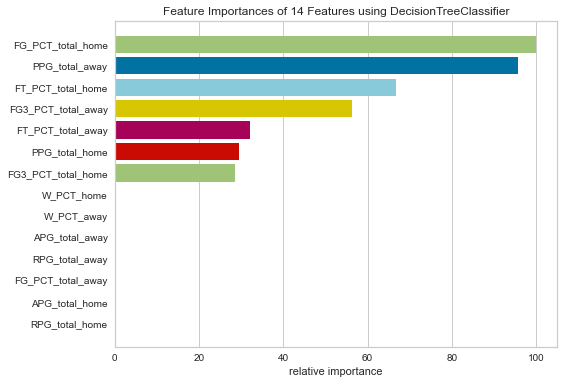

---------------------------------------------
i=4
WINNER:

Best decision tree accuracy ({'max_leaf_nodes': 25, 'criterion': 'entropy'}): 0.42
              precision    recall  f1-score   support

           0       0.40      0.87      0.55      1302
           1       0.56      0.12      0.19      1904

    accuracy                           0.42      3206
   macro avg       0.48      0.49      0.37      3206
weighted avg       0.50      0.42      0.34      3206



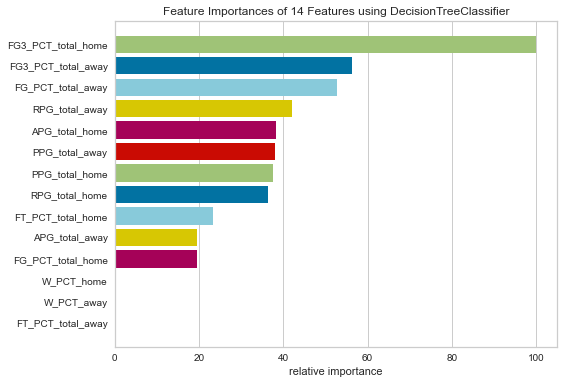

---------------------------------------------
Mean accuracy: 0.5003897723729341
Max accuracy: 0.5821640162145307
Min accuracy: 0.4246959775491113
i=5
FGP:

Best decision tree accuracy ({'max_leaf_nodes': 19, 'criterion': 'gini'}): 0.53
              precision    recall  f1-score   support

           0       0.43      0.16      0.24      1418
           1       0.56      0.83      0.67      1789

    accuracy                           0.53      3207
   macro avg       0.49      0.50      0.45      3207
weighted avg       0.50      0.53      0.48      3207



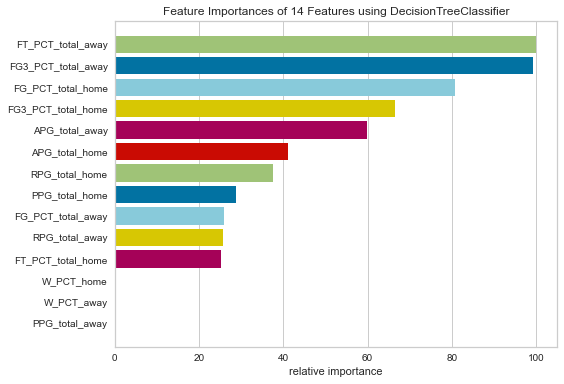

---------------------------------------------
i=6
FGP:

Best decision tree accuracy ({'max_leaf_nodes': 32, 'criterion': 'gini'}): 0.53
              precision    recall  f1-score   support

           0       0.46      0.21      0.29      1461
           1       0.55      0.80      0.65      1746

    accuracy                           0.53      3207
   macro avg       0.50      0.50      0.47      3207
weighted avg       0.51      0.53      0.48      3207



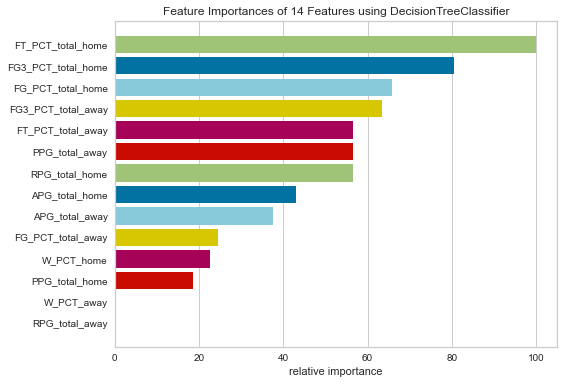

---------------------------------------------
i=7
FGP:

Best decision tree accuracy ({'max_leaf_nodes': 57, 'criterion': 'entropy'}): 0.46
              precision    recall  f1-score   support

           0       0.45      0.87      0.60      1461
           1       0.52      0.12      0.19      1746

    accuracy                           0.46      3207
   macro avg       0.49      0.50      0.39      3207
weighted avg       0.49      0.46      0.38      3207



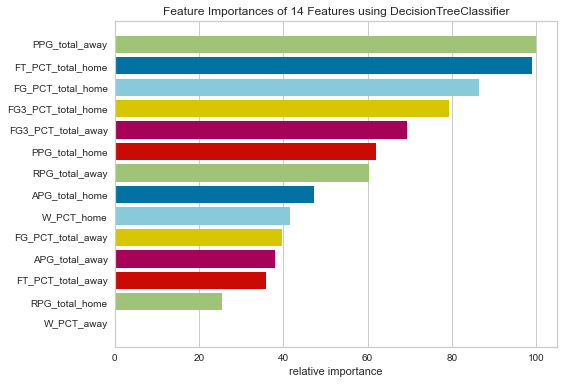

---------------------------------------------
i=8
FGP:

Best decision tree accuracy ({'max_leaf_nodes': 16, 'criterion': 'entropy'}): 0.50
              precision    recall  f1-score   support

           0       0.43      0.42      0.43      1408
           1       0.56      0.57      0.56      1799

    accuracy                           0.50      3207
   macro avg       0.49      0.49      0.49      3207
weighted avg       0.50      0.50      0.50      3207



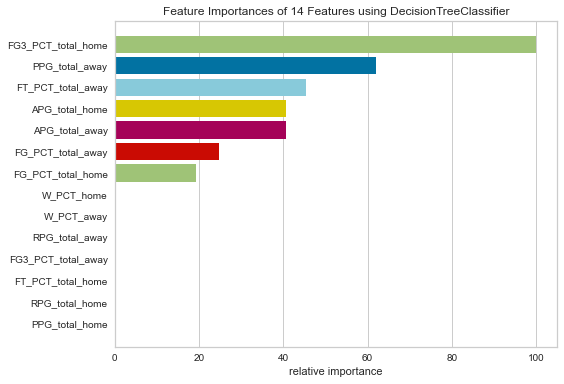

---------------------------------------------
i=9
FGP:

Best decision tree accuracy ({'max_leaf_nodes': 55, 'criterion': 'entropy'}): 0.55
              precision    recall  f1-score   support

           0       0.33      0.03      0.05      1402
           1       0.56      0.96      0.71      1804

    accuracy                           0.55      3206
   macro avg       0.45      0.49      0.38      3206
weighted avg       0.46      0.55      0.42      3206



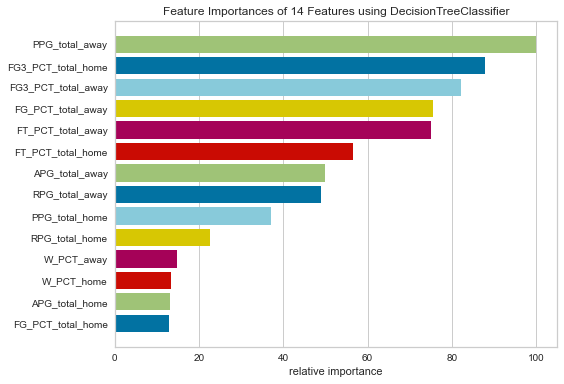

---------------------------------------------
Mean accuracy: 0.5069379482382288
Max accuracy: 0.5347676956657312
Min accuracy: 0.4614904895541004
i=10
FG3:

Best decision tree accuracy ({'max_leaf_nodes': 9, 'criterion': 'gini'}): 0.50
              precision    recall  f1-score   support

           0       0.49      0.84      0.62      1563
           1       0.55      0.19      0.28      1644

    accuracy                           0.50      3207
   macro avg       0.52      0.51      0.45      3207
weighted avg       0.52      0.50      0.45      3207



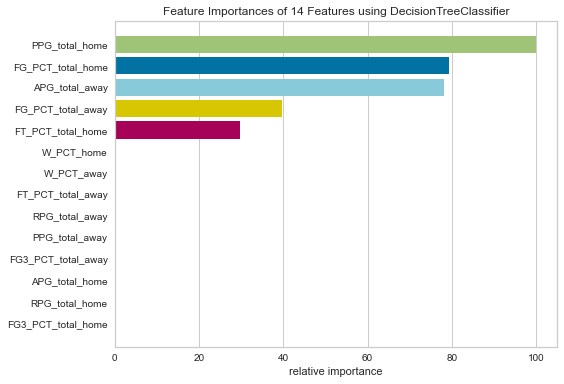

---------------------------------------------
i=11
FG3:

Best decision tree accuracy ({'max_leaf_nodes': 57, 'criterion': 'gini'}): 0.51
              precision    recall  f1-score   support

           0       0.50      0.88      0.64      1595
           1       0.54      0.14      0.23      1612

    accuracy                           0.51      3207
   macro avg       0.52      0.51      0.43      3207
weighted avg       0.52      0.51      0.43      3207



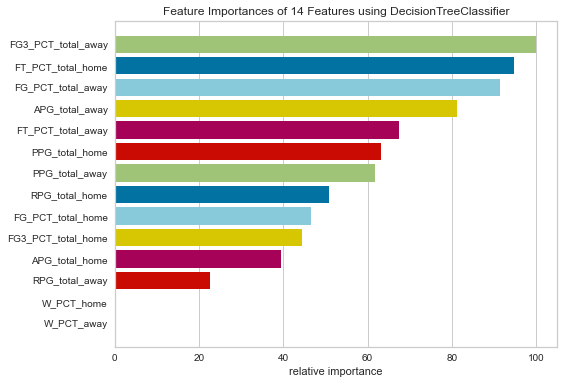

---------------------------------------------
i=12
FG3:

Best decision tree accuracy ({'max_leaf_nodes': 33, 'criterion': 'entropy'}): 0.50
              precision    recall  f1-score   support

           0       0.50      0.72      0.59      1616
           1       0.49      0.27      0.35      1591

    accuracy                           0.50      3207
   macro avg       0.49      0.50      0.47      3207
weighted avg       0.49      0.50      0.47      3207



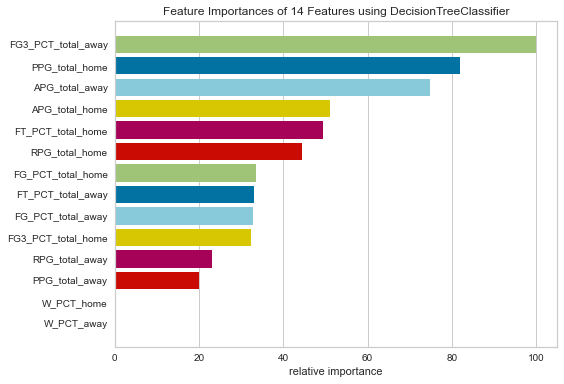

---------------------------------------------
i=13
FG3:

Best decision tree accuracy ({'max_leaf_nodes': 31, 'criterion': 'gini'}): 0.50
              precision    recall  f1-score   support

           0       0.47      0.29      0.36      1558
           1       0.51      0.70      0.59      1649

    accuracy                           0.50      3207
   macro avg       0.49      0.49      0.47      3207
weighted avg       0.49      0.50      0.48      3207



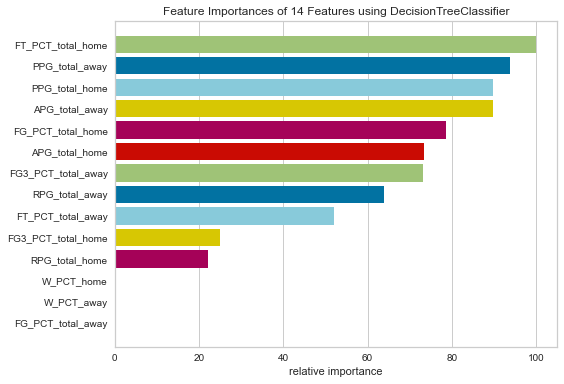

---------------------------------------------
i=14
FG3:

Best decision tree accuracy ({'max_leaf_nodes': 53, 'criterion': 'gini'}): 0.49
              precision    recall  f1-score   support

           0       0.48      0.79      0.60      1554
           1       0.50      0.20      0.29      1652

    accuracy                           0.49      3206
   macro avg       0.49      0.50      0.44      3206
weighted avg       0.49      0.49      0.44      3206



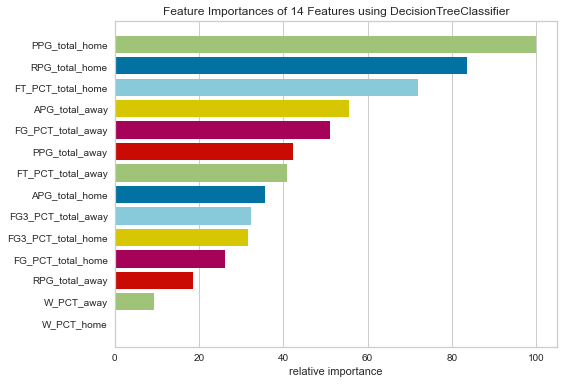

---------------------------------------------
Mean accuracy: 0.5018709073900841
Max accuracy: 0.5085749922045525
Min accuracy: 0.4976613657623948
i=15
FT:

Best decision tree accuracy ({'max_leaf_nodes': 54, 'criterion': 'gini'}): 0.50
              precision    recall  f1-score   support

           0       0.51      0.59      0.55      1647
           1       0.48      0.40      0.44      1560

    accuracy                           0.50      3207
   macro avg       0.50      0.50      0.50      3207
weighted avg       0.50      0.50      0.50      3207



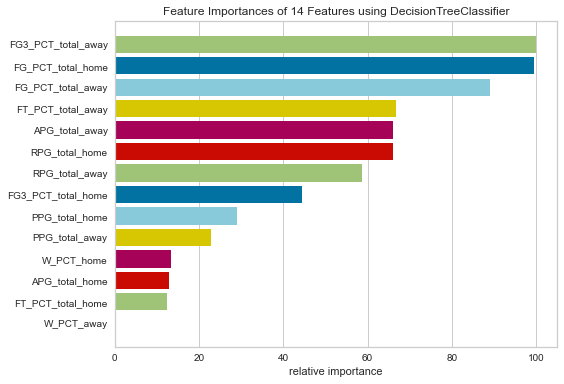

---------------------------------------------
i=16
FT:

Best decision tree accuracy ({'max_leaf_nodes': 56, 'criterion': 'entropy'}): 0.50
              precision    recall  f1-score   support

           0       0.51      0.68      0.58      1618
           1       0.50      0.33      0.40      1589

    accuracy                           0.50      3207
   macro avg       0.50      0.50      0.49      3207
weighted avg       0.50      0.50      0.49      3207



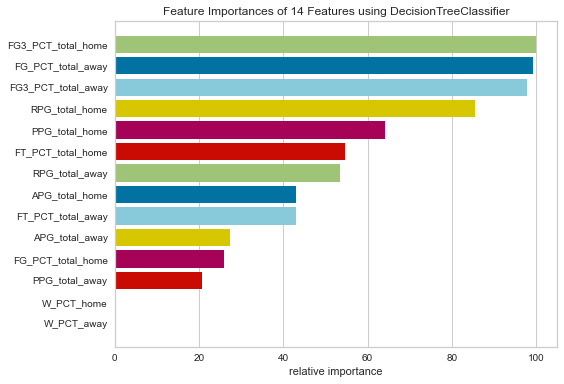

---------------------------------------------
i=17
FT:

Best decision tree accuracy ({'max_leaf_nodes': 55, 'criterion': 'gini'}): 0.51
              precision    recall  f1-score   support

           0       0.52      0.64      0.57      1629
           1       0.51      0.38      0.44      1578

    accuracy                           0.51      3207
   macro avg       0.51      0.51      0.50      3207
weighted avg       0.51      0.51      0.50      3207



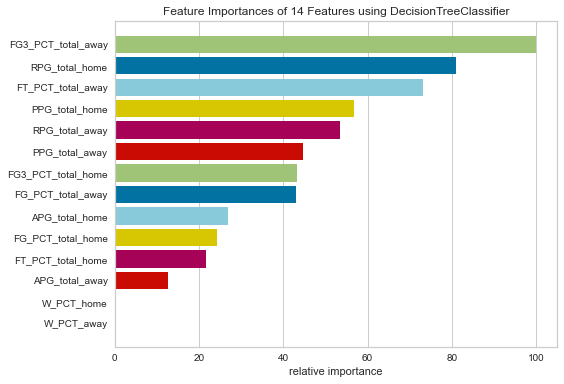

---------------------------------------------
i=18
FT:

Best decision tree accuracy ({'max_leaf_nodes': 40, 'criterion': 'gini'}): 0.51
              precision    recall  f1-score   support

           0       0.51      0.46      0.48      1614
           1       0.50      0.56      0.53      1593

    accuracy                           0.51      3207
   macro avg       0.51      0.51      0.51      3207
weighted avg       0.51      0.51      0.51      3207



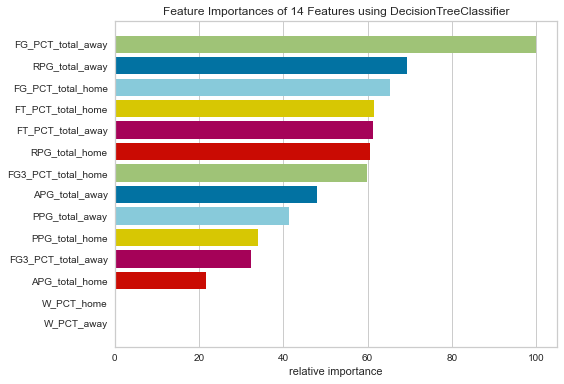

---------------------------------------------
i=19
FT:

Best decision tree accuracy ({'max_leaf_nodes': 43, 'criterion': 'gini'}): 0.50
              precision    recall  f1-score   support

           0       0.50      0.70      0.58      1588
           1       0.51      0.30      0.38      1618

    accuracy                           0.50      3206
   macro avg       0.50      0.50      0.48      3206
weighted avg       0.50      0.50      0.48      3206



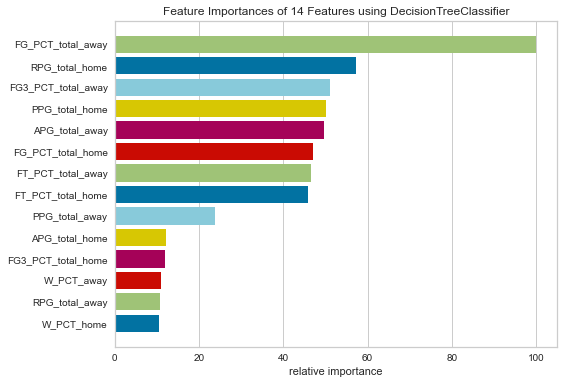

---------------------------------------------
Mean accuracy: 0.5066261303398816
Max accuracy: 0.513252260679763
Min accuracy: 0.5010913626442158
i=20
AST:

Best decision tree accuracy ({'max_leaf_nodes': 42, 'criterion': 'gini'}): 0.53
              precision    recall  f1-score   support

           0       0.50      0.30      0.37      1491
           1       0.55      0.74      0.63      1716

    accuracy                           0.53      3207
   macro avg       0.52      0.52      0.50      3207
weighted avg       0.52      0.53      0.51      3207



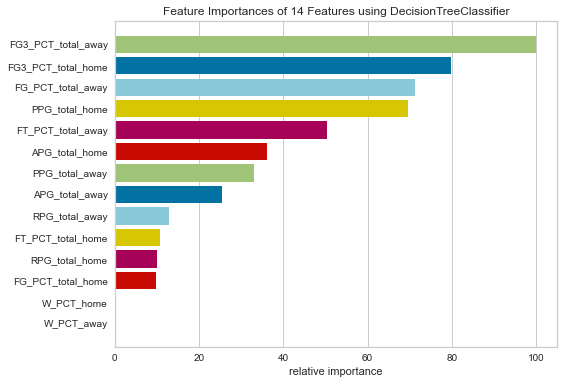

---------------------------------------------
i=21
AST:

Best decision tree accuracy ({'max_leaf_nodes': 10, 'criterion': 'entropy'}): 0.49
              precision    recall  f1-score   support

           0       0.46      0.64      0.53      1442
           1       0.56      0.37      0.45      1765

    accuracy                           0.49      3207
   macro avg       0.51      0.51      0.49      3207
weighted avg       0.51      0.49      0.49      3207



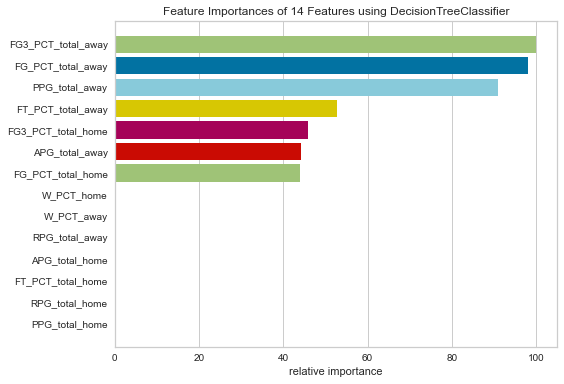

---------------------------------------------
i=22
AST:

Best decision tree accuracy ({'max_leaf_nodes': 5, 'criterion': 'gini'}): 0.52
              precision    recall  f1-score   support

           0       0.46      0.38      0.42      1459
           1       0.55      0.63      0.59      1748

    accuracy                           0.52      3207
   macro avg       0.51      0.51      0.50      3207
weighted avg       0.51      0.52      0.51      3207



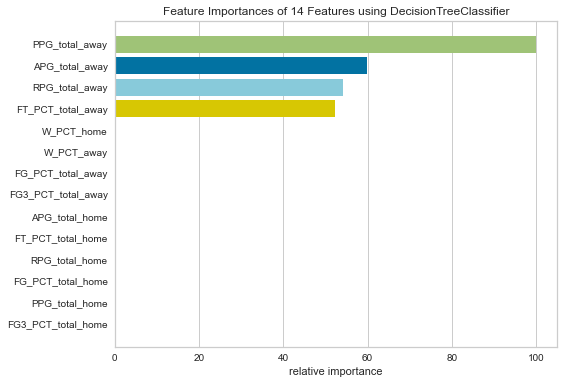

---------------------------------------------
i=23
AST:

Best decision tree accuracy ({'max_leaf_nodes': 8, 'criterion': 'gini'}): 0.50
              precision    recall  f1-score   support

           0       0.45      0.62      0.52      1429
           1       0.57      0.40      0.47      1778

    accuracy                           0.50      3207
   macro avg       0.51      0.51      0.50      3207
weighted avg       0.52      0.50      0.49      3207



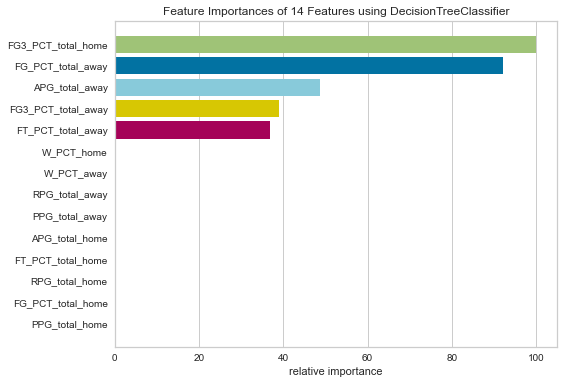

---------------------------------------------
i=24
AST:

Best decision tree accuracy ({'max_leaf_nodes': 18, 'criterion': 'gini'}): 0.48
              precision    recall  f1-score   support

           0       0.45      0.77      0.57      1425
           1       0.57      0.24      0.34      1781

    accuracy                           0.48      3206
   macro avg       0.51      0.51      0.46      3206
weighted avg       0.52      0.48      0.44      3206



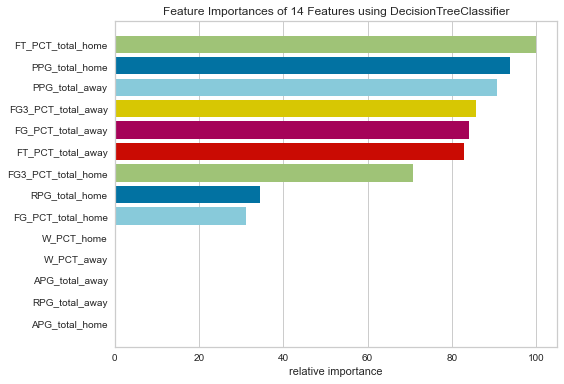

---------------------------------------------
Mean accuracy: 0.5101340816962894
Max accuracy: 0.5335204240723418
Min accuracy: 0.493607733083879
i=25
REB:

Best decision tree accuracy ({'max_leaf_nodes': 39, 'criterion': 'gini'}): 0.46
              precision    recall  f1-score   support

           0       0.46      0.96      0.62      1487
           1       0.41      0.02      0.05      1720

    accuracy                           0.46      3207
   macro avg       0.43      0.49      0.33      3207
weighted avg       0.43      0.46      0.31      3207



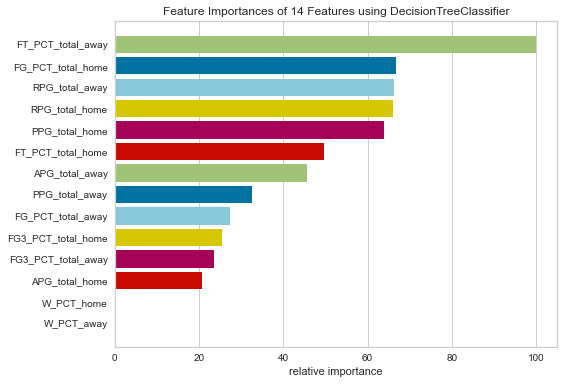

---------------------------------------------
i=26
REB:

Best decision tree accuracy ({'max_leaf_nodes': 14, 'criterion': 'entropy'}): 0.52
              precision    recall  f1-score   support

           0       0.45      0.01      0.02      1546
           1       0.52      0.99      0.68      1661

    accuracy                           0.52      3207
   macro avg       0.48      0.50      0.35      3207
weighted avg       0.49      0.52      0.36      3207



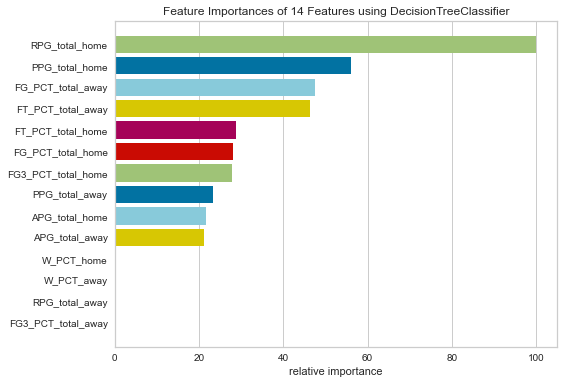

---------------------------------------------
i=27
REB:

Best decision tree accuracy ({'max_leaf_nodes': 7, 'criterion': 'entropy'}): 0.49
              precision    recall  f1-score   support

           0       0.46      0.48      0.47      1501
           1       0.52      0.51      0.52      1706

    accuracy                           0.49      3207
   macro avg       0.49      0.49      0.49      3207
weighted avg       0.49      0.49      0.49      3207



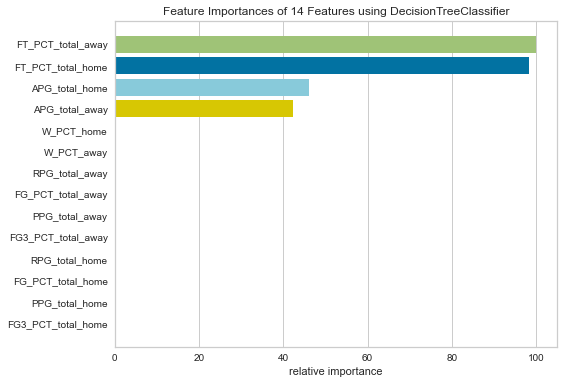

---------------------------------------------
i=28
REB:

Best decision tree accuracy ({'max_leaf_nodes': 17, 'criterion': 'entropy'}): 0.46
              precision    recall  f1-score   support

           0       0.45      0.89      0.60      1453
           1       0.55      0.11      0.18      1754

    accuracy                           0.46      3207
   macro avg       0.50      0.50      0.39      3207
weighted avg       0.50      0.46      0.37      3207



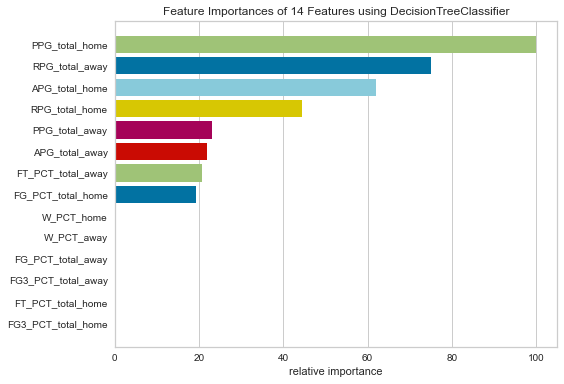

---------------------------------------------
i=29
REB:

Best decision tree accuracy ({'max_leaf_nodes': 47, 'criterion': 'gini'}): 0.53
              precision    recall  f1-score   support

           0       0.43      0.05      0.10      1495
           1       0.53      0.94      0.68      1711

    accuracy                           0.53      3206
   macro avg       0.48      0.50      0.39      3206
weighted avg       0.49      0.53      0.41      3206



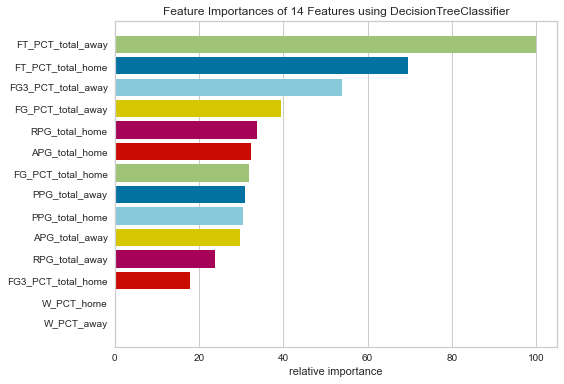

---------------------------------------------
Mean accuracy: 0.4828500155908949
Max accuracy: 0.5169940754599314
Min accuracy: 0.457748674773932


In [32]:
# print_all_metrics_and_plot(
#     DecisionTreeClassifier(random_state=0),
#     X_train_dict,
#     X_test_dict,
#     {
#         'max_leaf_nodes': [*range(4,60)],
#         'criterion': ['gini', 'entropy'],
#     },
# )
print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {
    'max_leaf_nodes': [*range(4,60)],
    'criterion': ['gini', 'entropy'],
})

## Try prune max features

i=0
WINNER:

Best decision tree accuracy ({'max_features': 1, 'criterion': 'entropy'}): 0.53
              precision    recall  f1-score   support

           0       0.41      0.40      0.41      1295
           1       0.60      0.62      0.61      1912

    accuracy                           0.53      3207
   macro avg       0.51      0.51      0.51      3207
weighted avg       0.53      0.53      0.53      3207



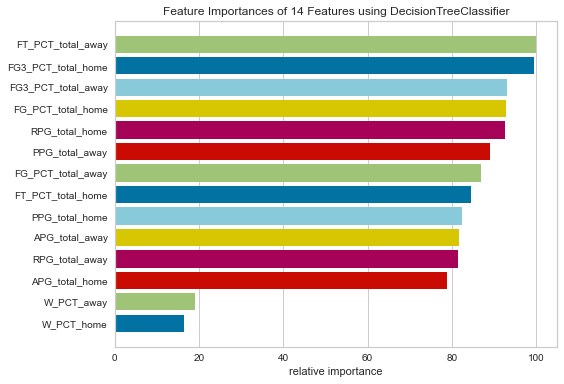

---------------------------------------------
i=1
WINNER:

Best decision tree accuracy ({'max_features': 10, 'criterion': 'gini'}): 0.52
              precision    recall  f1-score   support

           0       0.42      0.41      0.41      1336
           1       0.58      0.59      0.59      1871

    accuracy                           0.52      3207
   macro avg       0.50      0.50      0.50      3207
weighted avg       0.51      0.52      0.51      3207



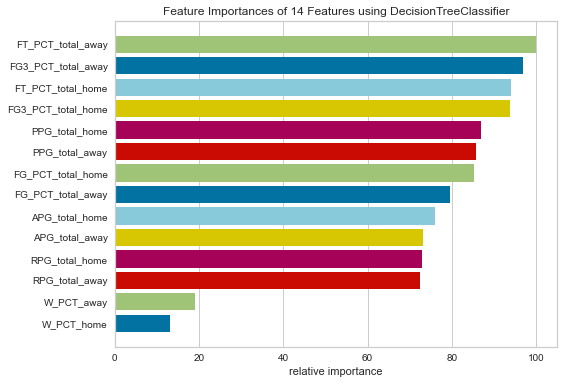

---------------------------------------------
i=2
WINNER:

Best decision tree accuracy ({'max_features': 6, 'criterion': 'gini'}): 0.51
              precision    recall  f1-score   support

           0       0.39      0.41      0.40      1284
           1       0.59      0.57      0.58      1923

    accuracy                           0.51      3207
   macro avg       0.49      0.49      0.49      3207
weighted avg       0.51      0.51      0.51      3207



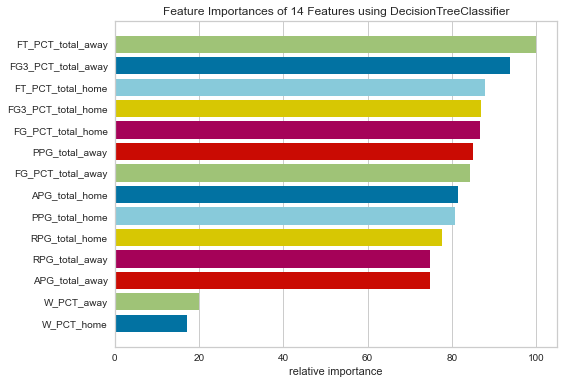

---------------------------------------------
i=3
WINNER:

Best decision tree accuracy ({'max_features': 2, 'criterion': 'entropy'}): 0.51
              precision    recall  f1-score   support

           0       0.40      0.42      0.41      1293
           1       0.59      0.58      0.58      1914

    accuracy                           0.51      3207
   macro avg       0.50      0.50      0.50      3207
weighted avg       0.51      0.51      0.51      3207



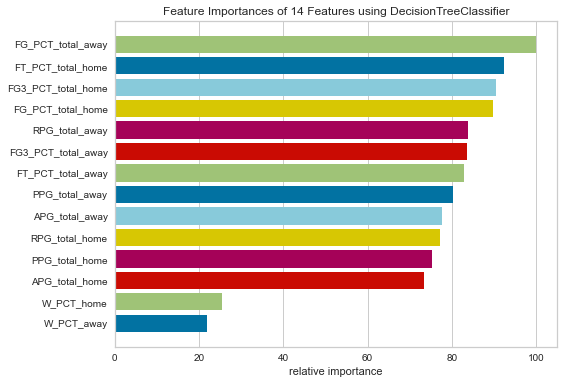

---------------------------------------------
i=4
WINNER:

Best decision tree accuracy ({'max_features': 11, 'criterion': 'gini'}): 0.49
              precision    recall  f1-score   support

           0       0.38      0.40      0.39      1302
           1       0.58      0.55      0.56      1904

    accuracy                           0.49      3206
   macro avg       0.48      0.48      0.48      3206
weighted avg       0.50      0.49      0.49      3206



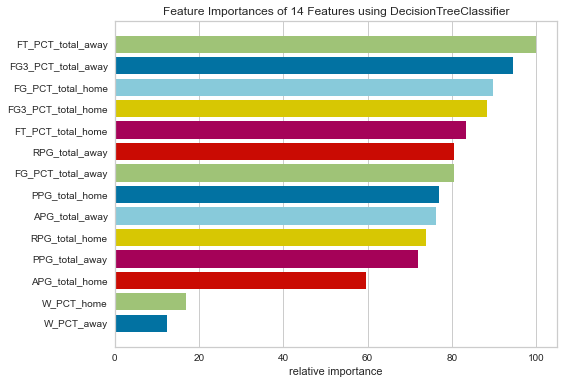

---------------------------------------------
Mean accuracy: 0.5154349859681946
Max accuracy: 0.5291549734954787
Min accuracy: 0.5057686311194263
i=5
FGP:

Best decision tree accuracy ({'max_features': 5, 'criterion': 'entropy'}): 0.50
              precision    recall  f1-score   support

           0       0.43      0.43      0.43      1418
           1       0.55      0.55      0.55      1789

    accuracy                           0.50      3207
   macro avg       0.49      0.49      0.49      3207
weighted avg       0.50      0.50      0.50      3207



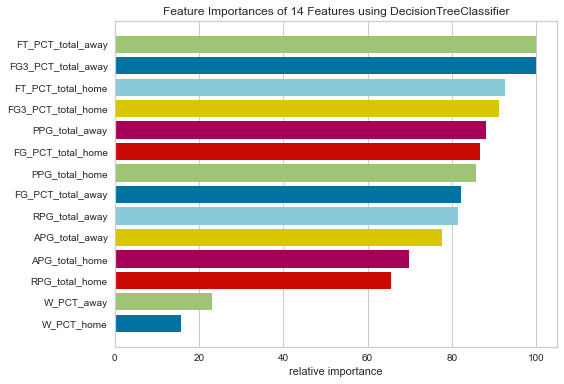

---------------------------------------------
i=6
FGP:

Best decision tree accuracy ({'max_features': 'log2', 'criterion': 'entropy'}): 0.50
              precision    recall  f1-score   support

           0       0.45      0.44      0.45      1461
           1       0.54      0.55      0.55      1746

    accuracy                           0.50      3207
   macro avg       0.50      0.50      0.50      3207
weighted avg       0.50      0.50      0.50      3207



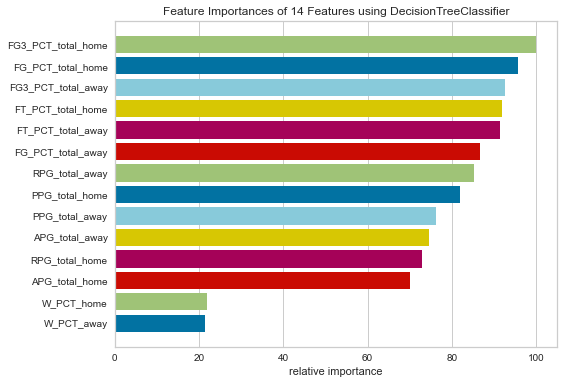

---------------------------------------------
i=7
FGP:

Best decision tree accuracy ({'max_features': 7, 'criterion': 'entropy'}): 0.51
              precision    recall  f1-score   support

           0       0.46      0.46      0.46      1461
           1       0.55      0.55      0.55      1746

    accuracy                           0.51      3207
   macro avg       0.51      0.51      0.51      3207
weighted avg       0.51      0.51      0.51      3207



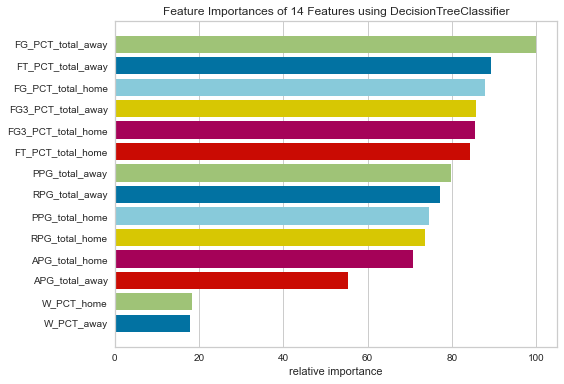

---------------------------------------------
i=8
FGP:

Best decision tree accuracy ({'max_features': 9, 'criterion': 'gini'}): 0.51
              precision    recall  f1-score   support

           0       0.44      0.44      0.44      1408
           1       0.56      0.56      0.56      1799

    accuracy                           0.51      3207
   macro avg       0.50      0.50      0.50      3207
weighted avg       0.51      0.51      0.51      3207



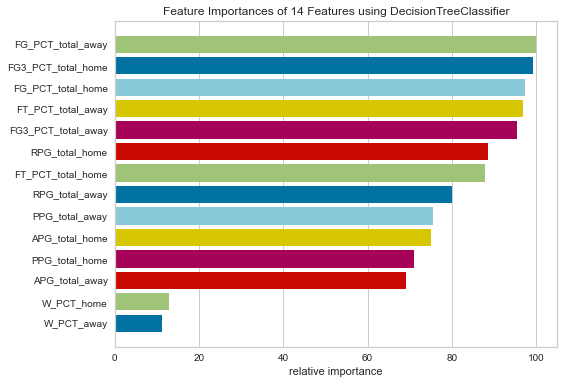

---------------------------------------------
i=9
FGP:

Best decision tree accuracy ({'max_features': 7, 'criterion': 'gini'}): 0.50
              precision    recall  f1-score   support

           0       0.43      0.43      0.43      1402
           1       0.56      0.56      0.56      1804

    accuracy                           0.50      3206
   macro avg       0.49      0.49      0.49      3206
weighted avg       0.50      0.50      0.50      3206



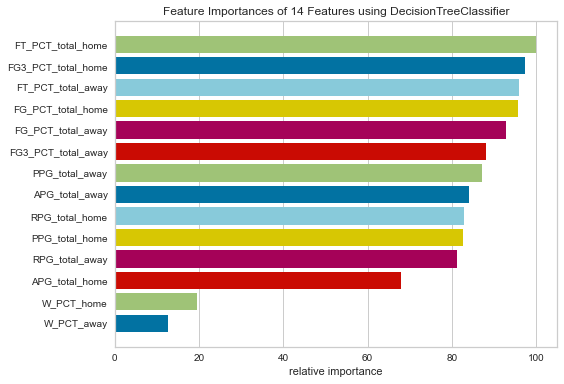

---------------------------------------------
Mean accuracy: 0.5039756782039289
Max accuracy: 0.509822263797942
Min accuracy: 0.4976613657623948
i=10
FG3:

Best decision tree accuracy ({'max_features': None, 'criterion': 'entropy'}): 0.48
              precision    recall  f1-score   support

           0       0.47      0.48      0.48      1563
           1       0.50      0.48      0.49      1644

    accuracy                           0.48      3207
   macro avg       0.48      0.48      0.48      3207
weighted avg       0.48      0.48      0.48      3207



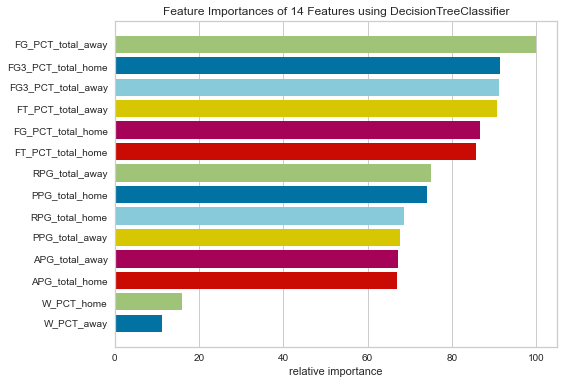

---------------------------------------------
i=11
FG3:

Best decision tree accuracy ({'max_features': 'log2', 'criterion': 'gini'}): 0.49
              precision    recall  f1-score   support

           0       0.48      0.48      0.48      1595
           1       0.49      0.50      0.50      1612

    accuracy                           0.49      3207
   macro avg       0.49      0.49      0.49      3207
weighted avg       0.49      0.49      0.49      3207



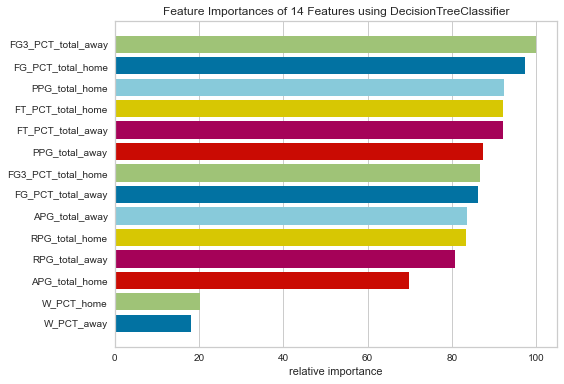

---------------------------------------------
i=12
FG3:

Best decision tree accuracy ({'max_features': 10, 'criterion': 'entropy'}): 0.50
              precision    recall  f1-score   support

           0       0.50      0.50      0.50      1616
           1       0.50      0.50      0.50      1591

    accuracy                           0.50      3207
   macro avg       0.50      0.50      0.50      3207
weighted avg       0.50      0.50      0.50      3207



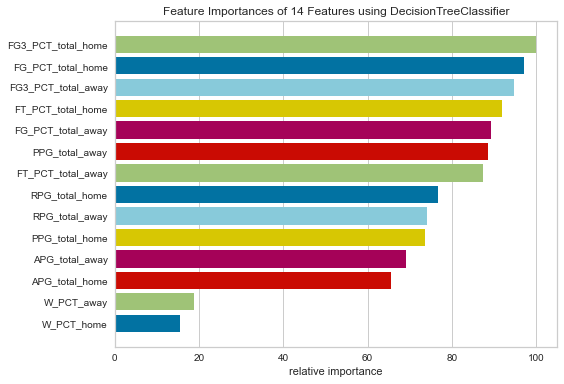

---------------------------------------------
i=13
FG3:

Best decision tree accuracy ({'max_features': 6, 'criterion': 'gini'}): 0.50
              precision    recall  f1-score   support

           0       0.48      0.50      0.49      1558
           1       0.51      0.50      0.50      1649

    accuracy                           0.50      3207
   macro avg       0.50      0.50      0.50      3207
weighted avg       0.50      0.50      0.50      3207



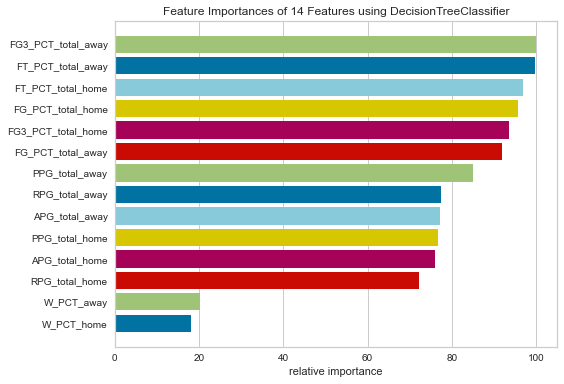

---------------------------------------------
i=14
FG3:

Best decision tree accuracy ({'max_features': 2, 'criterion': 'gini'}): 0.49
              precision    recall  f1-score   support

           0       0.47      0.49      0.48      1554
           1       0.50      0.49      0.50      1652

    accuracy                           0.49      3206
   macro avg       0.49      0.49      0.49      3206
weighted avg       0.49      0.49      0.49      3206



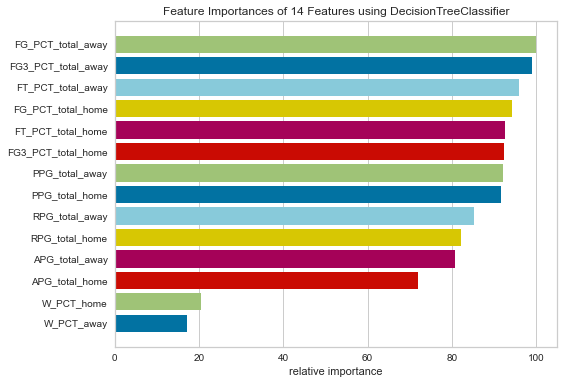

---------------------------------------------
Mean accuracy: 0.4922045525413159
Max accuracy: 0.4989086373557842
Min accuracy: 0.4839413782351107
i=15
FT:

Best decision tree accuracy ({'max_features': 8, 'criterion': 'entropy'}): 0.49
              precision    recall  f1-score   support

           0       0.50      0.49      0.50      1647
           1       0.48      0.49      0.48      1560

    accuracy                           0.49      3207
   macro avg       0.49      0.49      0.49      3207
weighted avg       0.49      0.49      0.49      3207



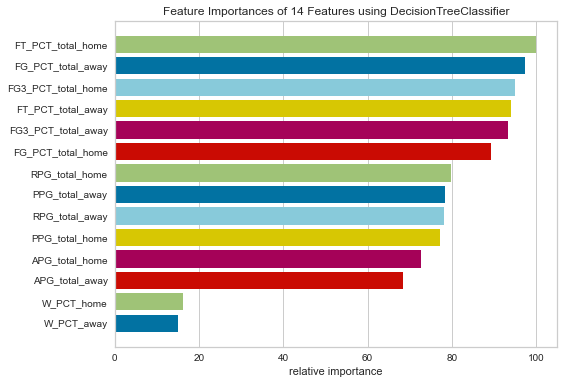

---------------------------------------------
i=16
FT:

Best decision tree accuracy ({'max_features': 1, 'criterion': 'entropy'}): 0.49
              precision    recall  f1-score   support

           0       0.50      0.49      0.49      1618
           1       0.49      0.50      0.49      1589

    accuracy                           0.49      3207
   macro avg       0.49      0.49      0.49      3207
weighted avg       0.49      0.49      0.49      3207



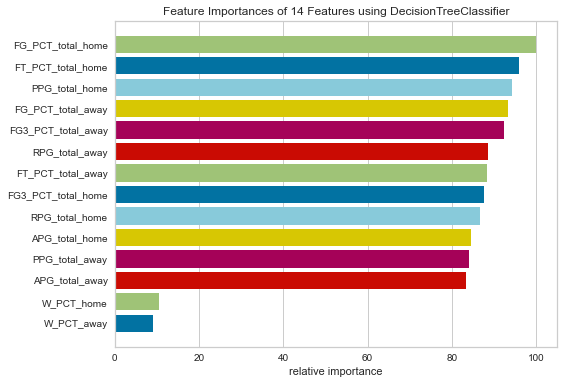

---------------------------------------------
i=17
FT:

Best decision tree accuracy ({'max_features': 10, 'criterion': 'entropy'}): 0.50
              precision    recall  f1-score   support

           0       0.51      0.51      0.51      1629
           1       0.50      0.50      0.50      1578

    accuracy                           0.50      3207
   macro avg       0.50      0.50      0.50      3207
weighted avg       0.50      0.50      0.50      3207



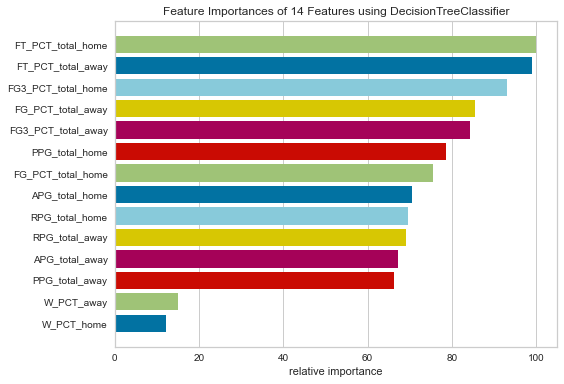

---------------------------------------------
i=18
FT:

Best decision tree accuracy ({'max_features': 3, 'criterion': 'gini'}): 0.50
              precision    recall  f1-score   support

           0       0.50      0.49      0.50      1614
           1       0.49      0.50      0.50      1593

    accuracy                           0.50      3207
   macro avg       0.50      0.50      0.50      3207
weighted avg       0.50      0.50      0.50      3207



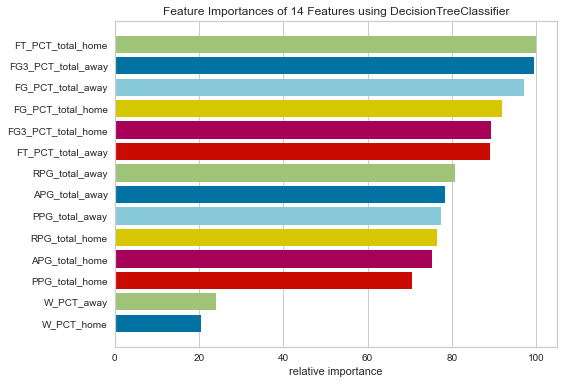

---------------------------------------------
i=19
FT:

Best decision tree accuracy ({'max_features': 6, 'criterion': 'gini'}): 0.51
              precision    recall  f1-score   support

           0       0.51      0.53      0.52      1588
           1       0.52      0.50      0.51      1618

    accuracy                           0.51      3206
   macro avg       0.51      0.51      0.51      3206
weighted avg       0.51      0.51      0.51      3206



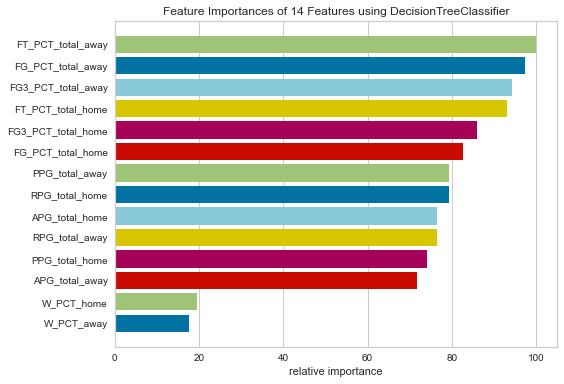

---------------------------------------------
Mean accuracy: 0.49602432179607114
Max accuracy: 0.5035859058309947
Min accuracy: 0.49111318989710007
i=20
AST:

Best decision tree accuracy ({'max_features': 3, 'criterion': 'gini'}): 0.50
              precision    recall  f1-score   support

           0       0.46      0.45      0.46      1491
           1       0.53      0.55      0.54      1716

    accuracy                           0.50      3207
   macro avg       0.50      0.50      0.50      3207
weighted avg       0.50      0.50      0.50      3207



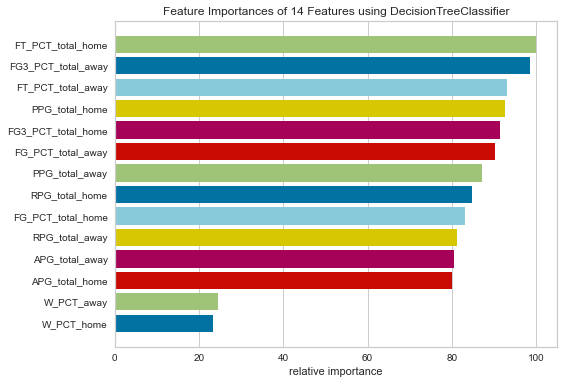

---------------------------------------------
i=21
AST:

Best decision tree accuracy ({'max_features': 2, 'criterion': 'entropy'}): 0.51
              precision    recall  f1-score   support

           0       0.45      0.45      0.45      1442
           1       0.55      0.56      0.56      1765

    accuracy                           0.51      3207
   macro avg       0.50      0.50      0.50      3207
weighted avg       0.51      0.51      0.51      3207



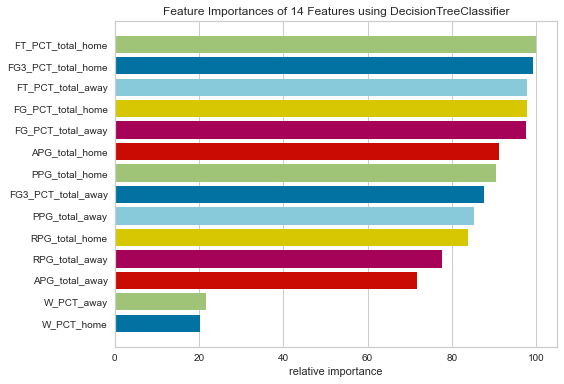

---------------------------------------------
i=22
AST:

Best decision tree accuracy ({'max_features': 10, 'criterion': 'gini'}): 0.50
              precision    recall  f1-score   support

           0       0.45      0.44      0.44      1459
           1       0.54      0.55      0.54      1748

    accuracy                           0.50      3207
   macro avg       0.49      0.49      0.49      3207
weighted avg       0.50      0.50      0.50      3207



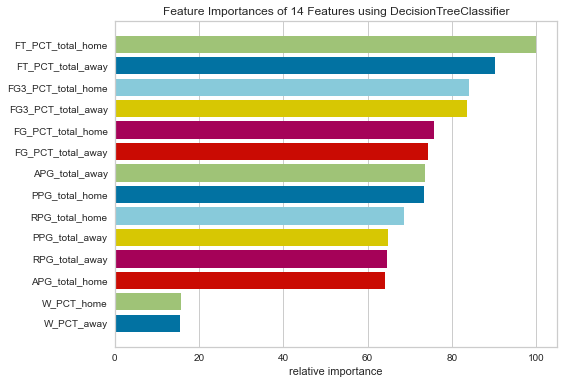

---------------------------------------------
i=23
AST:

Best decision tree accuracy ({'max_features': 1, 'criterion': 'gini'}): 0.50
              precision    recall  f1-score   support

           0       0.44      0.46      0.45      1429
           1       0.55      0.53      0.54      1778

    accuracy                           0.50      3207
   macro avg       0.50      0.50      0.50      3207
weighted avg       0.50      0.50      0.50      3207



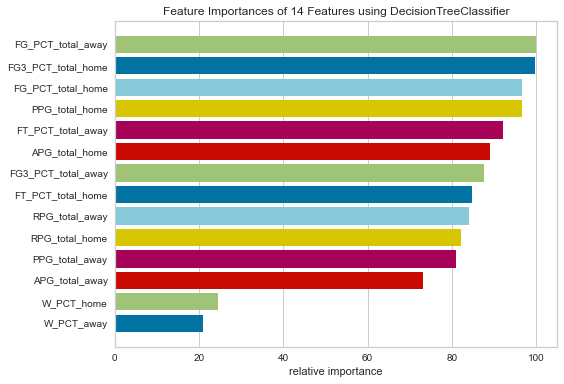

---------------------------------------------
i=24
AST:

Best decision tree accuracy ({'max_features': None, 'criterion': 'gini'}): 0.50
              precision    recall  f1-score   support

           0       0.44      0.46      0.45      1425
           1       0.55      0.53      0.54      1781

    accuracy                           0.50      3206
   macro avg       0.50      0.50      0.50      3206
weighted avg       0.50      0.50      0.50      3206



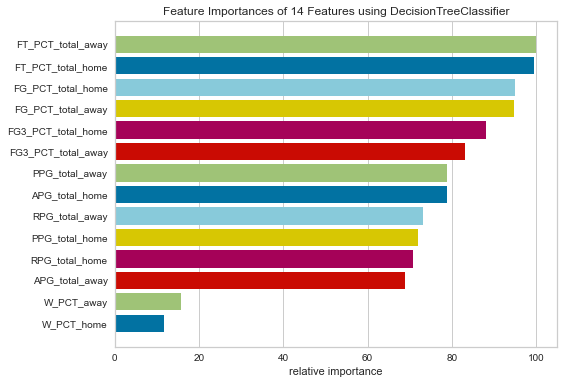

---------------------------------------------
Mean accuracy: 0.5024165887121921
Max accuracy: 0.5101340816962894
Min accuracy: 0.4970377299657
i=25
REB:

Best decision tree accuracy ({'max_features': 10, 'criterion': 'entropy'}): 0.52
              precision    recall  f1-score   support

           0       0.48      0.48      0.48      1487
           1       0.55      0.55      0.55      1720

    accuracy                           0.52      3207
   macro avg       0.52      0.52      0.52      3207
weighted avg       0.52      0.52      0.52      3207



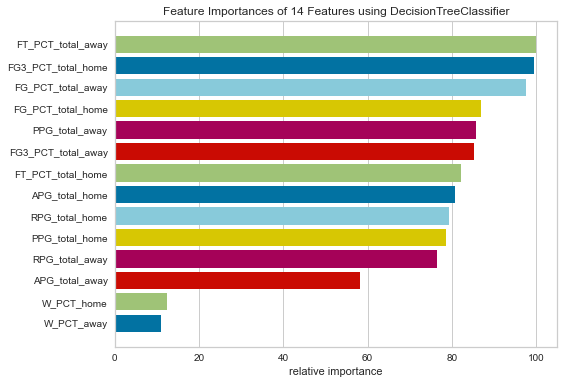

---------------------------------------------
i=26
REB:

Best decision tree accuracy ({'max_features': 10, 'criterion': 'gini'}): 0.50
              precision    recall  f1-score   support

           0       0.48      0.45      0.46      1546
           1       0.51      0.54      0.52      1661

    accuracy                           0.50      3207
   macro avg       0.49      0.49      0.49      3207
weighted avg       0.49      0.50      0.50      3207



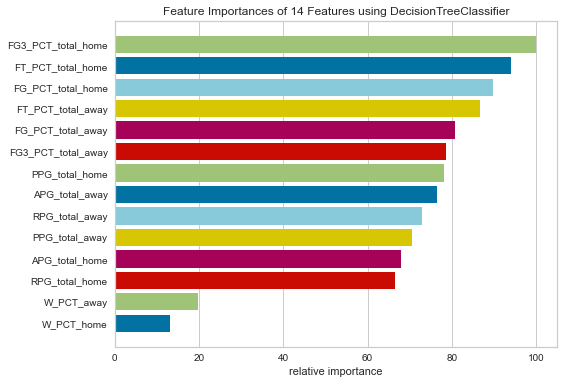

---------------------------------------------
i=27
REB:

Best decision tree accuracy ({'max_features': 11, 'criterion': 'gini'}): 0.51
              precision    recall  f1-score   support

           0       0.48      0.48      0.48      1501
           1       0.54      0.54      0.54      1706

    accuracy                           0.51      3207
   macro avg       0.51      0.51      0.51      3207
weighted avg       0.51      0.51      0.51      3207



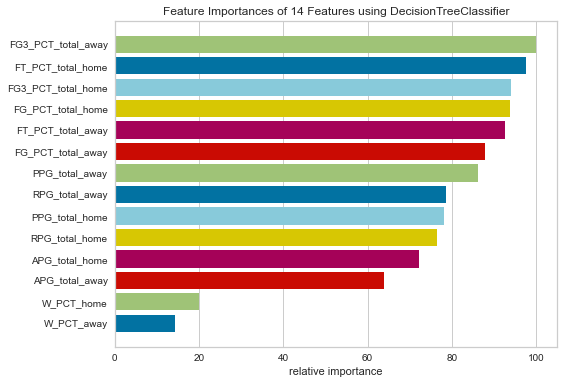

---------------------------------------------
i=28
REB:

Best decision tree accuracy ({'max_features': 3, 'criterion': 'entropy'}): 0.50
              precision    recall  f1-score   support

           0       0.45      0.48      0.47      1453
           1       0.55      0.52      0.53      1754

    accuracy                           0.50      3207
   macro avg       0.50      0.50      0.50      3207
weighted avg       0.50      0.50      0.50      3207



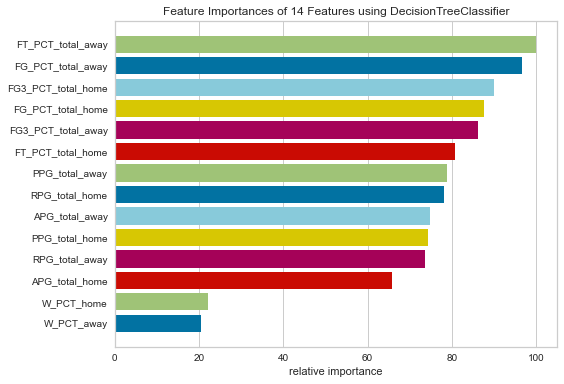

---------------------------------------------
i=29
REB:

Best decision tree accuracy ({'max_features': 10, 'criterion': 'gini'}): 0.51
              precision    recall  f1-score   support

           0       0.48      0.50      0.49      1495
           1       0.55      0.53      0.54      1711

    accuracy                           0.51      3206
   macro avg       0.51      0.51      0.51      3206
weighted avg       0.52      0.51      0.51      3206



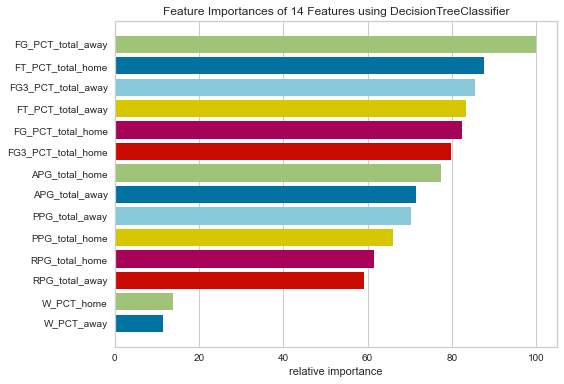

---------------------------------------------
Mean accuracy: 0.5062363579669473
Max accuracy: 0.5179295291549735
Min accuracy: 0.49579045837231056


In [33]:
# print_all_metrics_and_plot(
#     DecisionTreeClassifier(random_state=0),
#     X_train_dict,
#     X_test_dict,
#     {
#         'max_features': [*range(1,len(cumulative_stats_df.columns)//2+1), 'sqrt', 'log2', None],
#         'criterion': ['gini', 'entropy'],
#     },
# )
print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {
    'max_features': [*range(1,len(cumulative_stats_df.columns)//2+1), 'sqrt', 'log2', None],
    'criterion': ['gini', 'entropy'],
})

## Try class weight balance

i=0


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': None}): 0.53
              precision    recall  f1-score   support

           0       0.41      0.41      0.41      1295
           1       0.60      0.61      0.60      1912

    accuracy                           0.53      3207
   macro avg       0.51      0.51      0.51      3207
weighted avg       0.53      0.53      0.53      3207



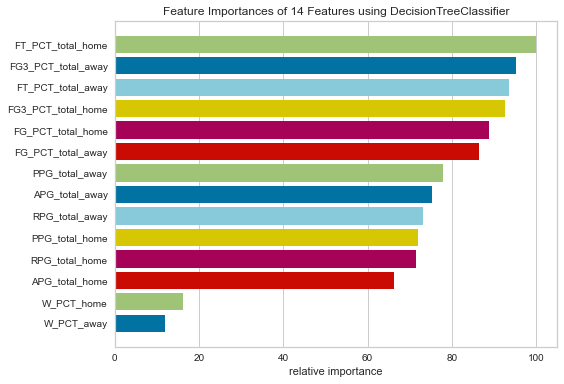

---------------------------------------------
i=1


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': None}): 0.52
              precision    recall  f1-score   support

           0       0.42      0.39      0.40      1336
           1       0.58      0.61      0.59      1871

    accuracy                           0.52      3207
   macro avg       0.50      0.50      0.50      3207
weighted avg       0.51      0.52      0.52      3207



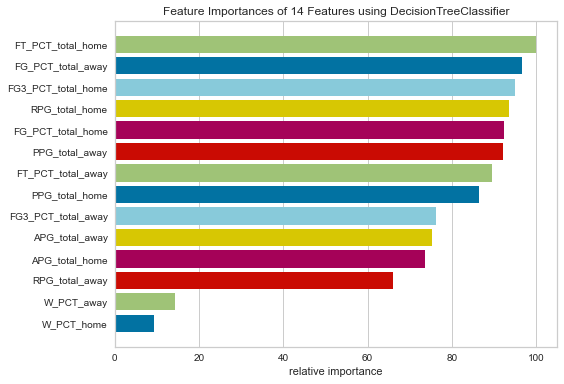

---------------------------------------------
i=2


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.52
              precision    recall  f1-score   support

           0       0.41      0.43      0.42      1284
           1       0.61      0.58      0.60      1923

    accuracy                           0.52      3207
   macro avg       0.51      0.51      0.51      3207
weighted avg       0.53      0.52      0.53      3207



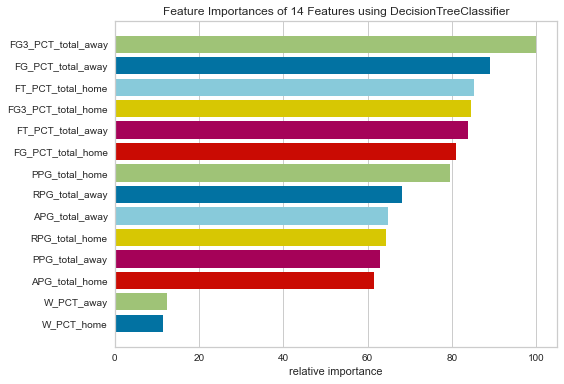

---------------------------------------------
i=3


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.51
              precision    recall  f1-score   support

           0       0.40      0.39      0.40      1293
           1       0.59      0.59      0.59      1914

    accuracy                           0.51      3207
   macro avg       0.49      0.49      0.49      3207
weighted avg       0.51      0.51      0.51      3207



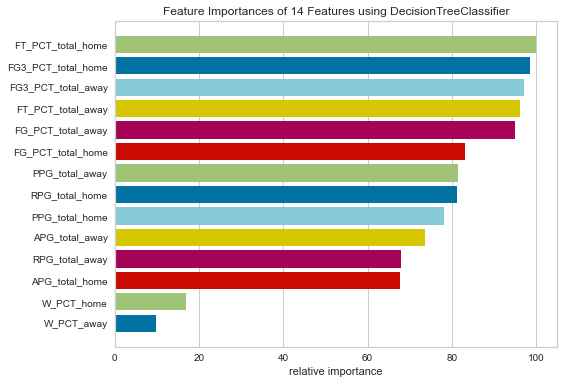

---------------------------------------------
i=4


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': None}): 0.51
              precision    recall  f1-score   support

           0       0.40      0.41      0.40      1302
           1       0.59      0.57      0.58      1904

    accuracy                           0.51      3206
   macro avg       0.49      0.49      0.49      3206
weighted avg       0.51      0.51      0.51      3206



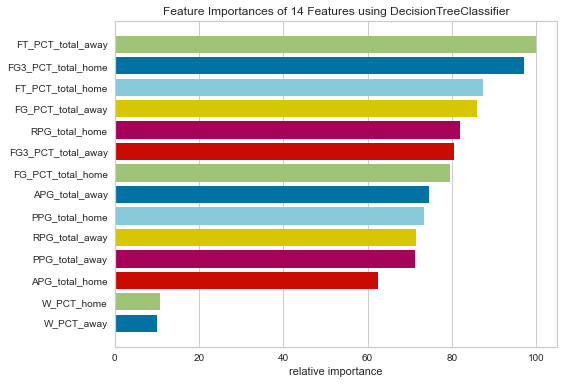

---------------------------------------------
Mean accuracy: 0.5205020268163393
Max accuracy: 0.5272840661053945
Min accuracy: 0.5129404427814157
i=5


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.52
              precision    recall  f1-score   support

           0       0.45      0.45      0.45      1418
           1       0.57      0.57      0.57      1789

    accuracy                           0.52      3207
   macro avg       0.51      0.51      0.51      3207
weighted avg       0.52      0.52      0.52      3207



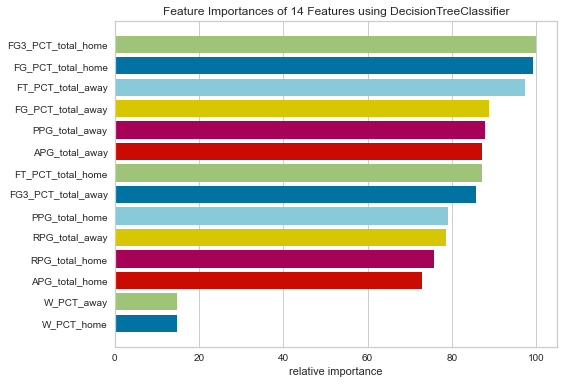

---------------------------------------------
i=6


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': None}): 0.51
              precision    recall  f1-score   support

           0       0.47      0.47      0.47      1461
           1       0.55      0.55      0.55      1746

    accuracy                           0.51      3207
   macro avg       0.51      0.51      0.51      3207
weighted avg       0.51      0.51      0.51      3207



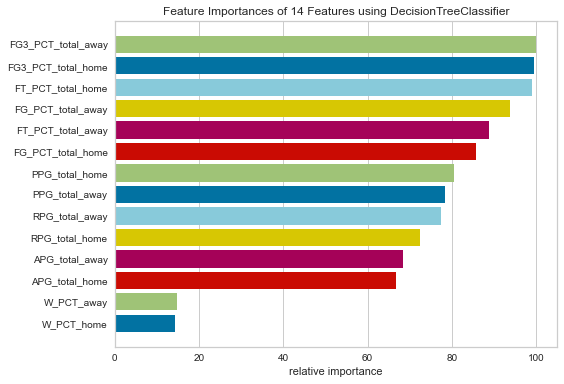

---------------------------------------------
i=7


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.50
              precision    recall  f1-score   support

           0       0.45      0.43      0.44      1461
           1       0.54      0.56      0.55      1746

    accuracy                           0.50      3207
   macro avg       0.50      0.50      0.50      3207
weighted avg       0.50      0.50      0.50      3207



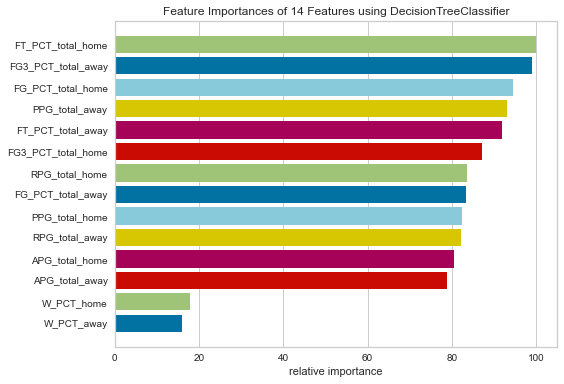

---------------------------------------------
i=8


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.52
              precision    recall  f1-score   support

           0       0.46      0.47      0.46      1408
           1       0.58      0.57      0.57      1799

    accuracy                           0.52      3207
   macro avg       0.52      0.52      0.52      3207
weighted avg       0.53      0.52      0.53      3207



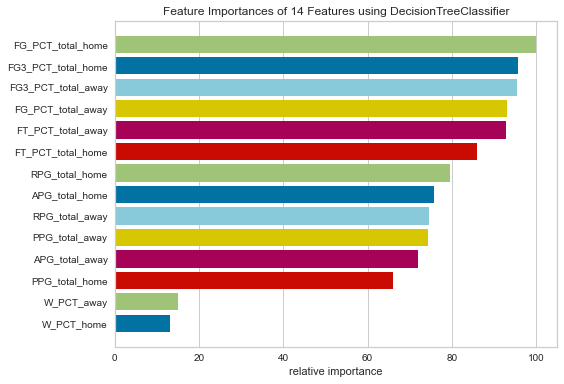

---------------------------------------------
i=9


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.49
              precision    recall  f1-score   support

           0       0.42      0.45      0.44      1402
           1       0.55      0.52      0.54      1804

    accuracy                           0.49      3206
   macro avg       0.49      0.49      0.49      3206
weighted avg       0.50      0.49      0.49      3206



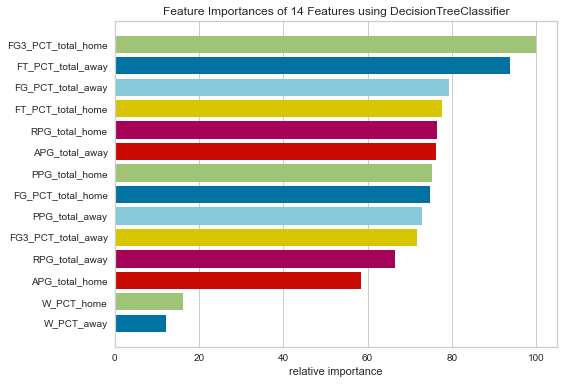

---------------------------------------------
Mean accuracy: 0.5137199875272841
Max accuracy: 0.5247895229186156
Min accuracy: 0.5010913626442158
i=10


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.49
              precision    recall  f1-score   support

           0       0.48      0.49      0.48      1563
           1       0.51      0.50      0.50      1644

    accuracy                           0.49      3207
   macro avg       0.49      0.49      0.49      3207
weighted avg       0.49      0.49      0.49      3207



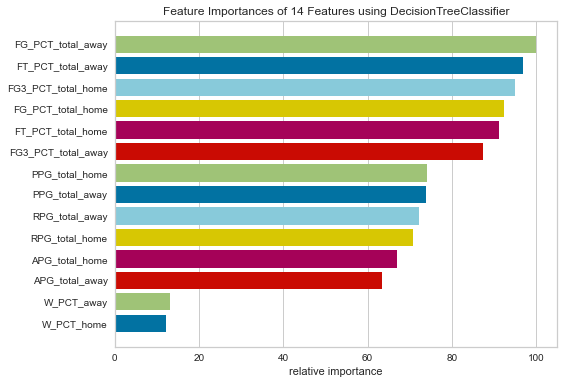

---------------------------------------------
i=11


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': None}): 0.51
              precision    recall  f1-score   support

           0       0.51      0.48      0.49      1595
           1       0.51      0.54      0.52      1612

    accuracy                           0.51      3207
   macro avg       0.51      0.51      0.51      3207
weighted avg       0.51      0.51      0.51      3207



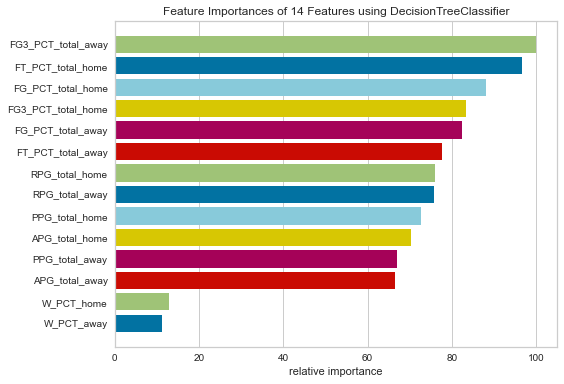

---------------------------------------------
i=12


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': None}): 0.51
              precision    recall  f1-score   support

           0       0.51      0.50      0.51      1616
           1       0.51      0.52      0.51      1591

    accuracy                           0.51      3207
   macro avg       0.51      0.51      0.51      3207
weighted avg       0.51      0.51      0.51      3207



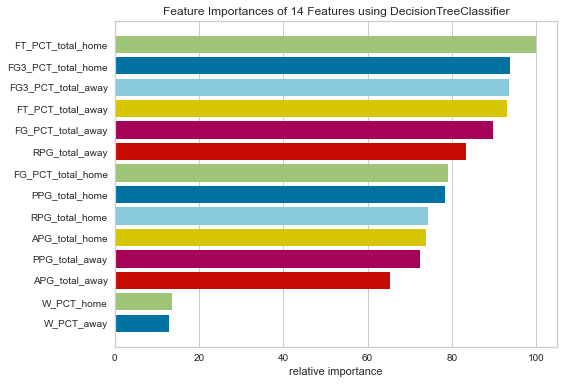

---------------------------------------------
i=13


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': None}): 0.49
              precision    recall  f1-score   support

           0       0.48      0.49      0.48      1558
           1       0.51      0.50      0.50      1649

    accuracy                           0.49      3207
   macro avg       0.49      0.49      0.49      3207
weighted avg       0.49      0.49      0.49      3207



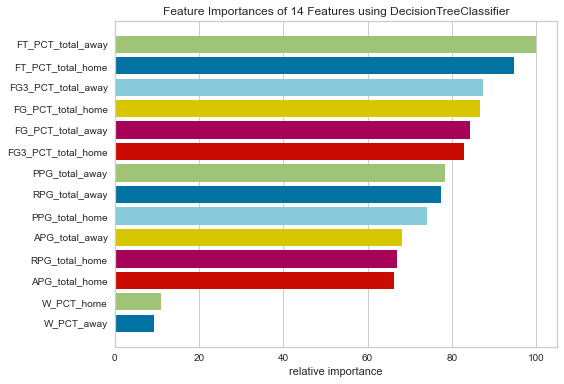

---------------------------------------------
i=14


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.49
              precision    recall  f1-score   support

           0       0.48      0.50      0.49      1554
           1       0.51      0.48      0.50      1652

    accuracy                           0.49      3206
   macro avg       0.49      0.49      0.49      3206
weighted avg       0.49      0.49      0.49      3206



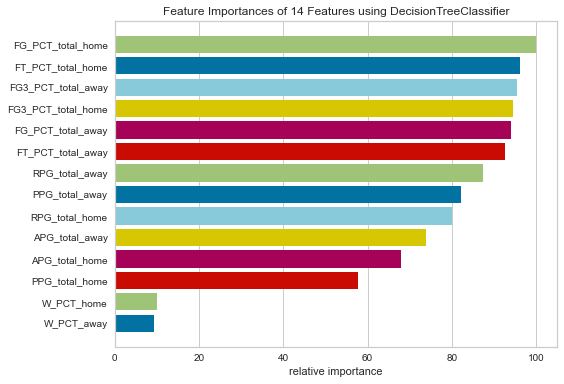

---------------------------------------------
Mean accuracy: 0.5009354536950421
Max accuracy: 0.5091986280012473
Min accuracy: 0.4929840972871843
i=15


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.50
              precision    recall  f1-score   support

           0       0.51      0.51      0.51      1647
           1       0.49      0.49      0.49      1560

    accuracy                           0.50      3207
   macro avg       0.50      0.50      0.50      3207
weighted avg       0.50      0.50      0.50      3207



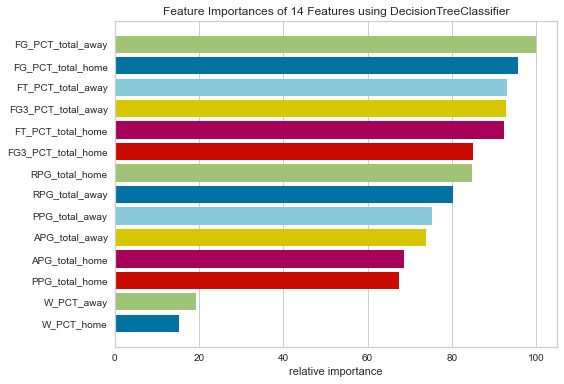

---------------------------------------------
i=16


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': None}): 0.50
              precision    recall  f1-score   support

           0       0.51      0.50      0.51      1618
           1       0.50      0.50      0.50      1589

    accuracy                           0.50      3207
   macro avg       0.50      0.50      0.50      3207
weighted avg       0.50      0.50      0.50      3207



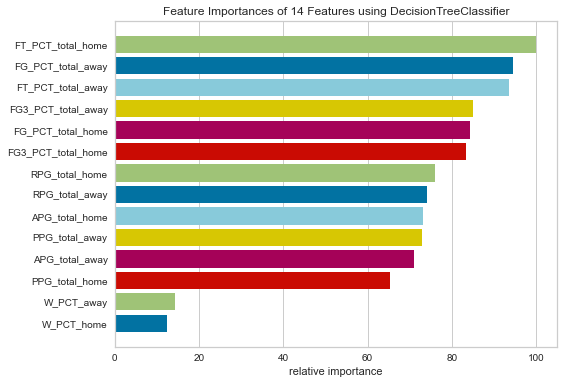

---------------------------------------------
i=17


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': None}): 0.52
              precision    recall  f1-score   support

           0       0.52      0.52      0.52      1629
           1       0.51      0.52      0.51      1578

    accuracy                           0.52      3207
   macro avg       0.52      0.52      0.52      3207
weighted avg       0.52      0.52      0.52      3207



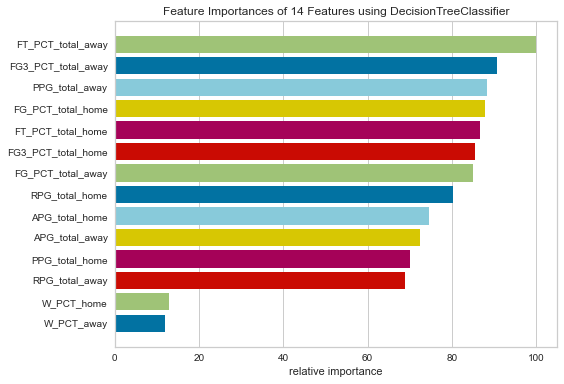

---------------------------------------------
i=18


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.50
              precision    recall  f1-score   support

           0       0.51      0.51      0.51      1614
           1       0.50      0.50      0.50      1593

    accuracy                           0.50      3207
   macro avg       0.50      0.50      0.50      3207
weighted avg       0.50      0.50      0.50      3207



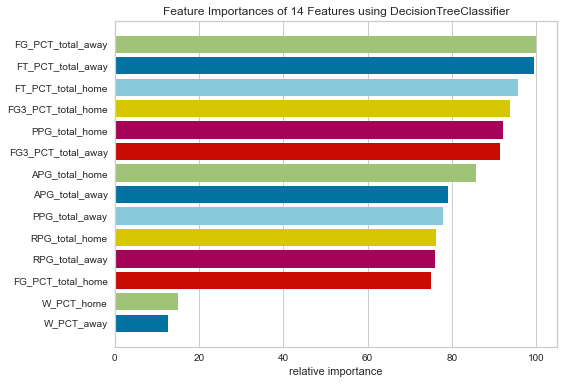

---------------------------------------------
i=19


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.50
              precision    recall  f1-score   support

           0       0.49      0.50      0.50      1588
           1       0.50      0.49      0.49      1618

    accuracy                           0.50      3206
   macro avg       0.50      0.50      0.50      3206
weighted avg       0.50      0.50      0.50      3206



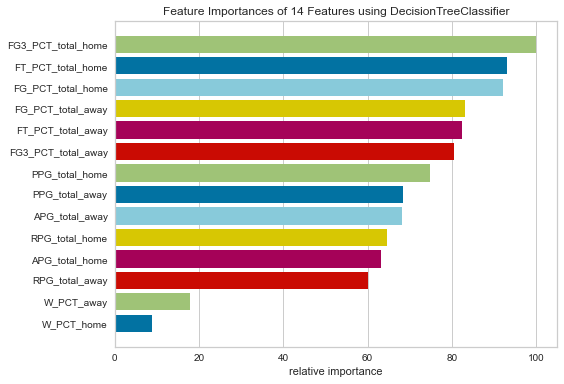

---------------------------------------------
Mean accuracy: 0.5056906766448395
Max accuracy: 0.5169940754599314
Min accuracy: 0.49984409105082633
i=20


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': None}): 0.50
              precision    recall  f1-score   support

           0       0.46      0.45      0.45      1491
           1       0.53      0.55      0.54      1716

    accuracy                           0.50      3207
   macro avg       0.50      0.50      0.50      3207
weighted avg       0.50      0.50      0.50      3207



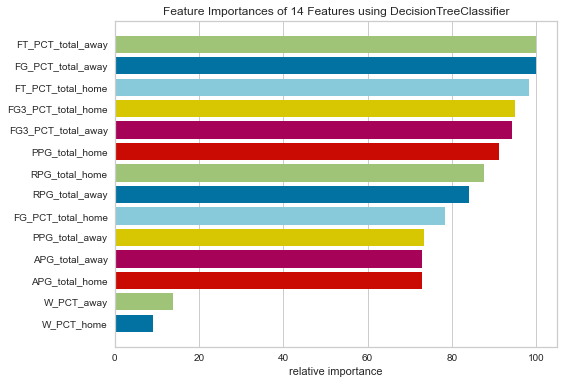

---------------------------------------------
i=21


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.50
              precision    recall  f1-score   support

           0       0.44      0.43      0.44      1442
           1       0.54      0.55      0.55      1765

    accuracy                           0.50      3207
   macro avg       0.49      0.49      0.49      3207
weighted avg       0.50      0.50      0.50      3207



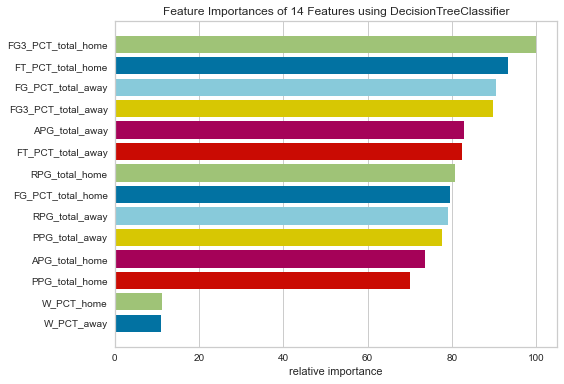

---------------------------------------------
i=22


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.50
              precision    recall  f1-score   support

           0       0.45      0.42      0.44      1459
           1       0.54      0.56      0.55      1748

    accuracy                           0.50      3207
   macro avg       0.49      0.49      0.49      3207
weighted avg       0.50      0.50      0.50      3207



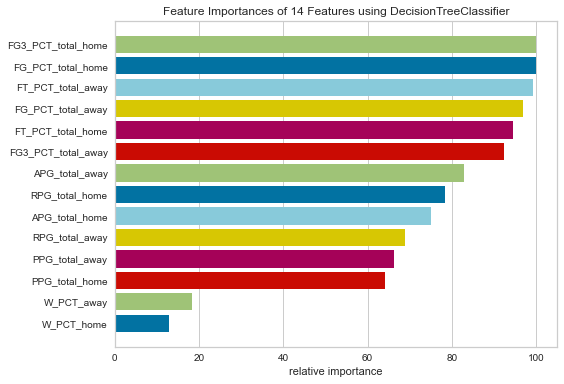

---------------------------------------------
i=23


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.51
              precision    recall  f1-score   support

           0       0.45      0.47      0.46      1429
           1       0.56      0.54      0.55      1778

    accuracy                           0.51      3207
   macro avg       0.50      0.50      0.50      3207
weighted avg       0.51      0.51      0.51      3207



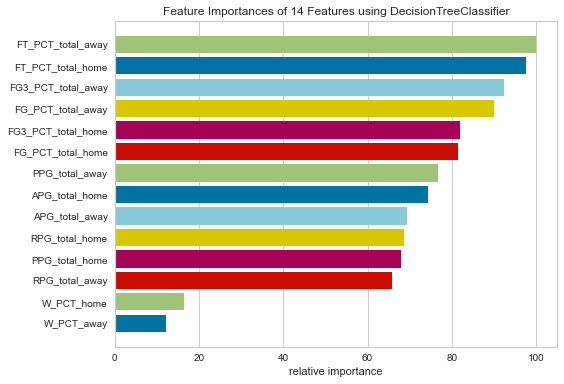

---------------------------------------------
i=24


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': None}): 0.50
              precision    recall  f1-score   support

           0       0.44      0.46      0.45      1425
           1       0.55      0.53      0.54      1781

    accuracy                           0.50      3206
   macro avg       0.50      0.50      0.50      3206
weighted avg       0.50      0.50      0.50      3206



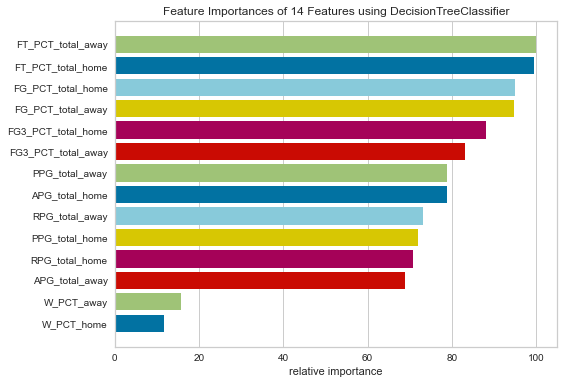

---------------------------------------------
Mean accuracy: 0.5011693171188026
Max accuracy: 0.5057686311194263
Min accuracy: 0.4979731836607421
i=25


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': None}): 0.50
              precision    recall  f1-score   support

           0       0.46      0.48      0.47      1487
           1       0.53      0.51      0.52      1720

    accuracy                           0.50      3207
   macro avg       0.50      0.50      0.50      3207
weighted avg       0.50      0.50      0.50      3207



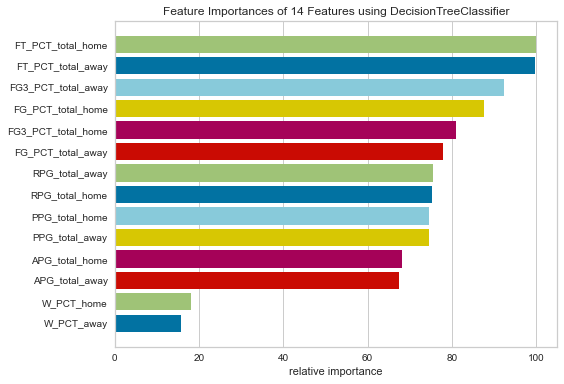

---------------------------------------------
i=26


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.50
              precision    recall  f1-score   support

           0       0.48      0.46      0.47      1546
           1       0.52      0.54      0.53      1661

    accuracy                           0.50      3207
   macro avg       0.50      0.50      0.50      3207
weighted avg       0.50      0.50      0.50      3207



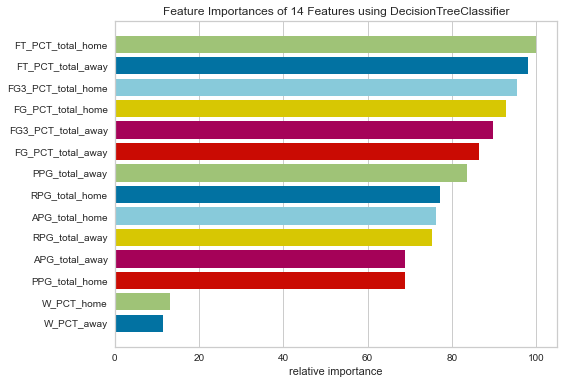

---------------------------------------------
i=27


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.51
              precision    recall  f1-score   support

           0       0.48      0.47      0.47      1501
           1       0.54      0.55      0.55      1706

    accuracy                           0.51      3207
   macro avg       0.51      0.51      0.51      3207
weighted avg       0.51      0.51      0.51      3207



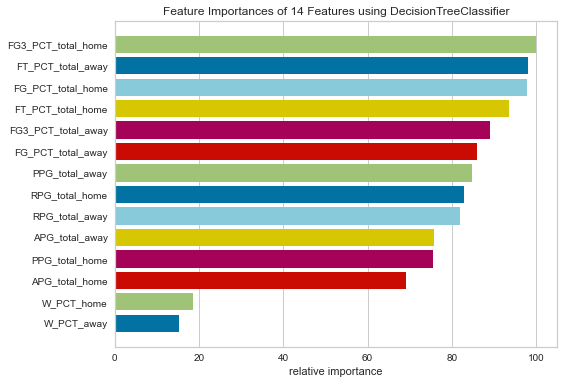

---------------------------------------------
i=28


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': None}): 0.50
              precision    recall  f1-score   support

           0       0.45      0.47      0.46      1453
           1       0.54      0.52      0.53      1754

    accuracy                           0.50      3207
   macro avg       0.49      0.49      0.49      3207
weighted avg       0.50      0.50      0.50      3207



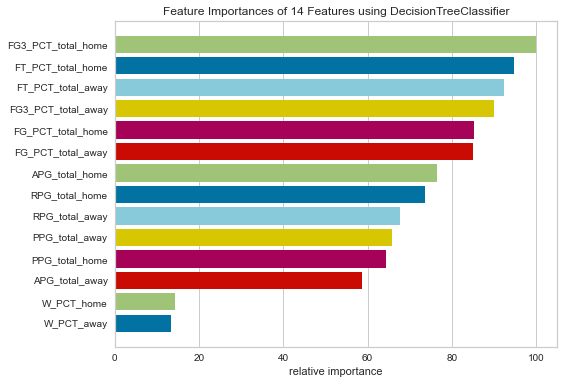

---------------------------------------------
i=29


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.50
              precision    recall  f1-score   support

           0       0.47      0.48      0.47      1495
           1       0.54      0.53      0.53      1711

    accuracy                           0.50      3206
   macro avg       0.50      0.50      0.50      3206
weighted avg       0.50      0.50      0.50      3206



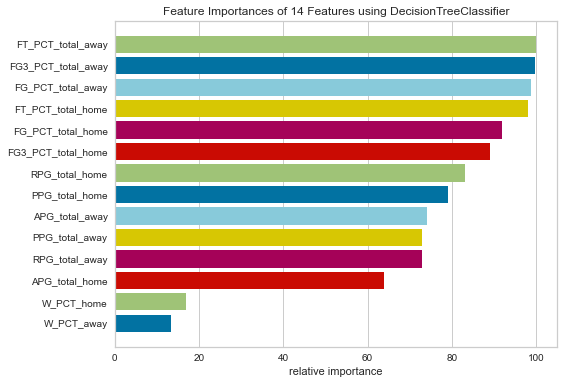

---------------------------------------------
Mean accuracy: 0.5028063610851263
Max accuracy: 0.5129404427814157
Min accuracy: 0.4970377299657


In [34]:
# print_all_metrics_and_plot(
#     DecisionTreeClassifier(random_state=0),
#     X_train_dict,
#     X_test_dict,
#     {
#         'class_weight': ['balanced', None],
#         'criterion': ['gini', 'entropy'],
#     },
# )
print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {
    'class_weight': ['balanced', None],
    'criterion': ['gini', 'entropy'],
})